# **Introduction**
<font color ='green'>This is the team 3 phase 3 project notebook.Our group members include : </br>
<font color= 'purple'>   
* Anthony Ngatia
* Jessyca Aperi
*  Joy Chepchumba    
*   Naomi Rotich
</br></font>
In this notebook we shall be anaylsing the **H1n1 and Seasonal Flue Vaccines dataset.**</font>



# **Overview**

<font color ='green'>In these project we shall seek to do the following :</font>


* <font color='purple'>  Load the dataset
*   Understand the dataset
*   Choose our target variable.
*   Prepare the dataset (Example : Cleaning the dataset , checking for multicollinearity)
*  Encode our categorical variables
* Make several models
* Evaluate our models
* Use our models for prediction
* Come up with relevant findings.</font>



# **1) BUSINESS UNDERSTANDING**

<font color='green'>As the world struggles to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns can provide guidance for future public health efforts. We aim to predict whether people got H1N1 and seasonal flu vaccines using data collected in the National 2009 H1N1 Flu Survey.</br>
This is a binary classification problem, but there are two potential targets: whether the survey respondent received the seasonal flu vaccine, or whether the respondent received the H1N1 flu vaccine.</br> 
We chose to work with one target i.e. whether the respondent received the H1N1 flu vaccine, and hence this is a single classification problem.


# **2) Data Understanding**

<font color='green'> Our dataset is the **H1n1 and seasonal flue vaccine dataset**.This dataset was sourced from  **Driven data**.In order to understand how our dataset looks like lets get a preview of this data by loading it</font>

# 2.1) Loading the relevant libraries and datasets.

<font color='green'>In this notebook we shall use very many relevant libaries to perform our analysis examples include the :
<font color='purple'>
1.   numpy
2.   pandas
3.   sklearn .etc 
</font></br>
lets go ahead and load them.</font>

In [ ]:
#importing data libraries
import numpy as numpy
import pandas as pd

#importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.xticks(rotation=90)

#importing modeling libraries
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#importing statistics
import scipy.stats as stats

<font color='green'>First lets import our lables this are our target variables which include : </font>     

<font color='purple'>
1.  h1n1 vaccine</br>
2.  seasonal vaccine

</font>


In [ ]:
# import the labels
label = pd.read_csv('/content/training_set_labels.csv', index_col=0)
label.head()

h1n1_vaccine  seasonal_vaccine
respondent_id                                
0                         0                 0
1                         0                 1
2                         0                 0
3                         0                 1
4                         0                 0

<font color='green'>Second, lets load our second dataset which is the training dataset</font>

In [ ]:
#displaying the first 5 rows of the dataset
df = pd.read_csv('training_set_features.csv', index_col=0)
df.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  ...             income_poverty  \
respondent_id                    ...                              
0                           0.0  ...              Below Poverty   
1                           0.0  ...              Below Poverty   
2                           NaN  ...  <= $75,000, Above Poverty   
3                           0.0  ...              Below Poverty   
4                           0.0  ...  <= $75,000, Above Poverty   

               marital_status  rent_or_own   employment_status  \
respondent_id                                                    
0                 Not Married          Own  Not in Labor Force   
1                 Not Married         Rent            Employed   
2                 Not Married          Own            Employed   
3                 Not Married         Rent  Not in Labor Force   
4                     Married          Own            Employed   

               hhs_geo_region                census_msa  household_adults  \
respondent_id                                                               
0                    oxchjgsf                   Non-MSA               0.0   
1                    bhuqouqj  MSA, Not Principle  City               0.0   
2                    qufhixun  MSA, Not Principle  City               2.0   
3                    lrircsnp       MSA, Principle City               0.0   
4                    qufhixun  MSA, Not Principle  City               1.0   

               household_children  employment_industry  employment_occupation  
respondent_id                                                                  
0                             0.0                  NaN                    NaN  
1                             0.0             pxcmvdjn               xgwztkwe  
2                             0.0             rucpziij               xtkaffoo  
3                             0.0                  NaN                    NaN  
4                             0.0             wxleyezf               emcorrxb  

[5 rows x 35 columns]

<font color='green'>Third, lets load our third dataset which is the testing dataset.</font>

In [ ]:
test_df=pd.read_csv('/content/test_set_features.csv',index_col=0)
test_df

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
26707                   2.0             2.0                        0.0   
26708                   1.0             1.0                        0.0   
26709                   2.0             2.0                        0.0   
26710                   1.0             1.0                        0.0   
26711                   3.0             1.0                        1.0   
...                     ...             ...                        ...   
53410                   1.0             1.0                        0.0   
53411                   3.0             1.0                        0.0   
53412                   0.0             1.0                        0.0   
53413                   3.0             1.0                        0.0   
53414                   2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
26707                           1.0                   0.0   
26708                           0.0                   0.0   
26709                           0.0                   1.0   
26710                           0.0                   0.0   
26711                           1.0                   0.0   
...                             ...                   ...   
53410                           1.0                   0.0   
53411                           1.0                   0.0   
53412                           0.0                   0.0   
53413                           1.0                   0.0   
53414                           0.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
26707                            1.0                          1.0   
26708                            0.0                          0.0   
26709                            1.0                          1.0   
26710                            0.0                          0.0   
26711                            1.0                          1.0   
...                              ...                          ...   
53410                            1.0                          0.0   
53411                            1.0                          1.0   
53412                            0.0                          0.0   
53413                            1.0                          0.0   
53414                            1.0                          0.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
26707                              0.0                    1.0   
26708                              0.0                    0.0   
26709                              1.0                    1.0   
26710                              0.0                    0.0   
26711                              1.0                    1.0   
...                                ...                    ...   
53410                              0.0                    1.0   
53411                              1.0                    1.0   
53412                              0.0                    0.0   
53413                              1.0                    0.0   
53414                              0.0                    1.0   

               doctor_recc_h1n1  ...             income_poverty  \
respondent_id                    ...                              
26707                       0.0  ...                  > $75,000   
26708                       0.0  ...              Below Poverty   
26709                       0.0  ...                  > $75,000   
26710                       1.0  ...  <= $75,000, Above Poverty   
26711                       0.0  ...  <= $75,000, Above Poverty   
...                         ...  ...         

# 2.2) Perfoming basic discovery on each of the dataset.

## 2.2.1) Basic Discovery on the label's dataset.

<font color='green'>Lets see the shape of this dataset, this means find out the number of  rows and columns in this dataset, to do this we shall create a basic function so that we don't have to keep on repeating ourselves.</font>

In [ ]:
def shape( dataframe):
  
  print(" dataframe shape:",dataframe.shape)
  print(" ")
  print(" columns in the dataframe include :")
  print(dataframe.columns)
  print(" ")
  print("Lets find out the datatypes and if there are missing values in each column")
  print(" ")
  print(dataframe.info())
  print("")
  description = dataframe.describe(include='all')
  print ("Dataframe Description")

  return description
  
shape(label)

 dataframe shape: (26707, 2)
 
 columns in the dataframe include :
Index(['h1n1_vaccine', 'seasonal_vaccine'], dtype='object')
 
Lets find out the datatypes and if there are missing values in each column
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB
None

Dataframe Description


h1n1_vaccine  seasonal_vaccine
count  26707.000000      26707.000000
mean       0.212454          0.465608
std        0.409052          0.498825
min        0.000000          0.000000
25%        0.000000          0.000000
50%        0.000000          0.000000
75%        0.000000          1.000000
max        1.000000          1.000000

<Font color='green'>From the above basic analysis, we can see that the labels dataset has :  

<font color='purple'>
1.  26707 number of rows<br>
2.  2 columns</br>
</font>
Our group decided to choose to work with the h1n1 vaccine instead of the seasonal flue vaccines , since we have to target varriables. Lets go ahead and drop the seasonal flue variable. </font>  


In [ ]:
# we'll use the H1N1 as the target variable
label= label.drop('seasonal_vaccine', axis=1)
label.head()

h1n1_vaccine
respondent_id              
0                         0
1                         0
2                         0
3                         0
4                         0

## 2.2.2) Basic Discovery on the training set dataset.

<font color='green'>Since we had already defined our function to help us understand the dataframes,lets go ahead and call this function</font>

In [ ]:
shape(df)

 dataframe shape: (26707, 35)
 
 columns in the dataframe include :
Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')
 
Lets find out the datatypes and if there are missing values in each colum

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26615.000000    26591.000000               26636.000000   
unique           NaN             NaN                        NaN   
top              NaN             NaN                        NaN   
freq             NaN             NaN                        NaN   
mean        1.618486        1.262532                   0.048844   
std         0.910311        0.618149                   0.215545   
min         0.000000        0.000000                   0.000000   
25%         1.000000        1.000000                   0.000000   
50%         2.000000        1.000000                   0.000000   
75%         2.000000        2.000000                   0.000000   
max         3.000000        2.000000                   1.000000   

        behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count           26499.000000          26688.000000           26665.000000   
unique                   NaN                   NaN                    NaN   
top                      NaN                   NaN                    NaN   
freq                     NaN                   NaN                    NaN   
mean                0.725612              0.068982               0.825614   
std                 0.446214              0.253429               0.379448   
min                 0.000000              0.000000               0.000000   
25%                 0.000000              0.000000               1.000000   
50%                 1.000000              0.000000               1.000000   
75%                 1.000000              0.000000               1.000000   
max                 1.000000              1.000000               1.000000   

        behavioral_large_gatherings  behavioral_outside_home  \
count                   26620.00000             26625.000000   
unique                          NaN                      NaN   
top                             NaN                      NaN   
freq                            NaN                      NaN   
mean                        0.35864                 0.337315   
std                         0.47961                 0.472802   
min                         0.00000                 0.000000   
25%                         0.00000                 0.000000   
50%                         0.00000                 0.000000   
75%                         1.00000                 1.000000   
max                         1.00000                 1.000000   

        behavioral_touch_face  doctor_recc_h1n1  ...  \
count            26579.000000      24547.000000  ...   
unique                    NaN               NaN  ...   
top                       NaN               NaN  ...   
freq                      NaN               NaN  ...   
mean                 0.677264          0.220312  ...   
std                  0.467531          0.414466  ...   
min                  0.000000          0.000000  ...   
25%                  0.000000          0.000000  ...   
50%                  1.000000          0.000000  ...   
75%                  1.000000          0.000000  ...   
max                  1.000000          1.000000  ...   

                   income_poverty  marital_status  rent_or_own  \
count                       22284           25299        24665   
unique                          3               2            2   
top     <= $75,000, Above Poverty         Married          Own   
freq                        12777           13555        18736   
mean                          NaN             NaN          NaN   
std                           NaN             NaN          NaN   
min                           NaN             NaN          NaN   
25%                           NaN             NaN          NaN   
50%                           NaN             NaN          NaN   
75%                           NaN             NaN          NaN   
max                           NaN             NaN          NaN   

        employment_status  hhs_geo_region  

<font color='green'> From the above, we can see that :   

<font color='purple'>
*   Our training dataset has 26707 rows.</br>
*   Our training dataset has 35 columns.</br>
</font>
Since we picked the h1n1 vaccine as our target cariable , lets go ahead and drop the variables related with the seasonal flue from our training dataset.</font>



In [ ]:
df =df.drop(['doctor_recc_seasonal','opinion_seas_vacc_effective',
            'opinion_seas_risk', 'opinion_seas_sick_from_vacc'], axis = 1)
# lets confirm if they were actually droped by checking the dataframes shape.
df.shape

(26707, 31)

<font color='green'> From this, you can see that our dataframe now has 31 columns instead of the initial 35.</font>

## 2.2.3) Basic Discovery on the testing set dataset.

<font color='green'>Since we had already defined our function to help us understand the dataframes,lets go ahead and call this function</font>

In [ ]:
shape(test_df)

 dataframe shape: (26708, 35)
 
 columns in the dataframe include :
Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')
 
Lets find out the datatypes and if there are missing values in each colum

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26623.000000    26586.000000               26629.000000   
unique           NaN             NaN                        NaN   
top              NaN             NaN                        NaN   
freq             NaN             NaN                        NaN   
mean        1.623145        1.266042                   0.049645   
std         0.902755        0.615617                   0.217215   
min         0.000000        0.000000                   0.000000   
25%         1.000000        1.000000                   0.000000   
50%         2.000000        1.000000                   0.000000   
75%         2.000000        2.000000                   0.000000   
max         3.000000        2.000000                   1.000000   

        behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count           26495.000000          26689.000000           26668.000000   
unique                   NaN                   NaN                    NaN   
top                      NaN                   NaN                    NaN   
freq                     NaN                   NaN                    NaN   
mean                0.729798              0.069279               0.826084   
std                 0.444072              0.253934               0.379045   
min                 0.000000              0.000000               0.000000   
25%                 0.000000              0.000000               1.000000   
50%                 1.000000              0.000000               1.000000   
75%                 1.000000              0.000000               1.000000   
max                 1.000000              1.000000               1.000000   

        behavioral_large_gatherings  behavioral_outside_home  \
count                  26636.000000             26626.000000   
unique                          NaN                      NaN   
top                             NaN                      NaN   
freq                            NaN                      NaN   
mean                       0.351517                 0.337227   
std                        0.477453                 0.472772   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        1.000000                 1.000000   
max                        1.000000                 1.000000   

        behavioral_touch_face  doctor_recc_h1n1  ...  \
count            26580.000000      24548.000000  ...   
unique                    NaN               NaN  ...   
top                       NaN               NaN  ...   
freq                      NaN               NaN  ...   
mean                 0.683747          0.222666  ...   
std                  0.465022          0.416044  ...   
min                  0.000000          0.000000  ...   
25%                  0.000000          0.000000  ...   
50%                  1.000000          0.000000  ...   
75%                  1.000000          0.000000  ...   
max                  1.000000          1.000000  ...   

                   income_poverty  marital_status  rent_or_own  \
count                       22211           25266        24672   
unique                          3               2            2   
top     <= $75,000, Above Poverty         Married          Own   
freq                        12775           13548        18721   
mean                          NaN             NaN          NaN   
std                           NaN             NaN          NaN   
min                           NaN             NaN          NaN   
25%                           NaN             NaN          NaN   
50%                           NaN             NaN          NaN   
75%                           NaN             NaN          NaN   
max                           NaN             NaN          NaN   

        employment_status  hhs_geo_region  

<font color ='green'> From the above, we can see that our dataset :
<font color ='purple'>

*   Our testing dataset has 26708 rows
*   Our testing dataset has 35 columns</font>

Since our target variable is the h1n1 vaccine , lets go ahead and drop the columns related with seasonal flue vaccine just like we did with the training dataset.
</font>



In [ ]:
test_df =test_df.drop(['doctor_recc_seasonal','opinion_seas_vacc_effective',
            'opinion_seas_risk', 'opinion_seas_sick_from_vacc'], axis = 1)
test_df.shape

(26708, 31)

<font color='green'> You can see that our number of columns now droped from 35 to 31.</font>

# 2.3) Understanding the distribution of our dataset.

<font color='green'>In order to work with our datasets, we should seek to understand their various distributions, to do this, we shall plot various histograms.</font>

## 2.3.1) Understanding the distribution of our target variable

<font color='green'> To do this will be simpler since we dropped the seasonal flue and remain with only one target variable hence we shall plot a histogram as shown below.

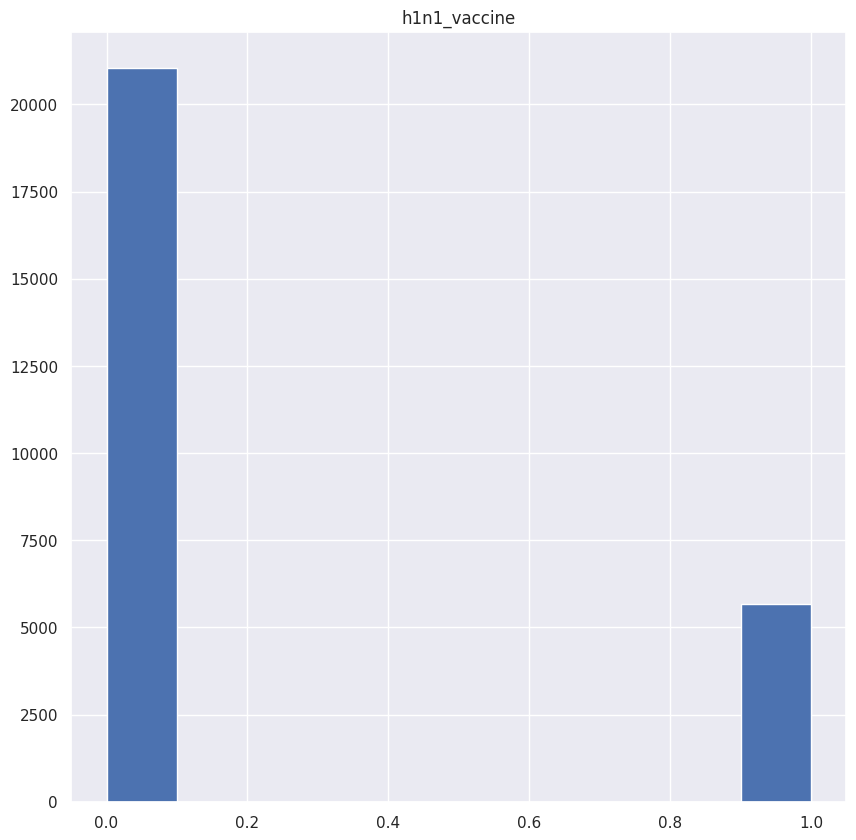

In [ ]:
# Distribution for the target variable
label.hist(figsize=(10,10));

<font color ='green'> From the above , we can see that our target variable is a categorical variable, this would be suitable for a classification model because since there only two categories we shall only predict between either of the two.</font>

## 2.3.2) Checking for the distribution of variables in the training dataset.

<font color = 'green'> To understand our training dataset, lets go ahead and check the distribution of the dataset.</font>

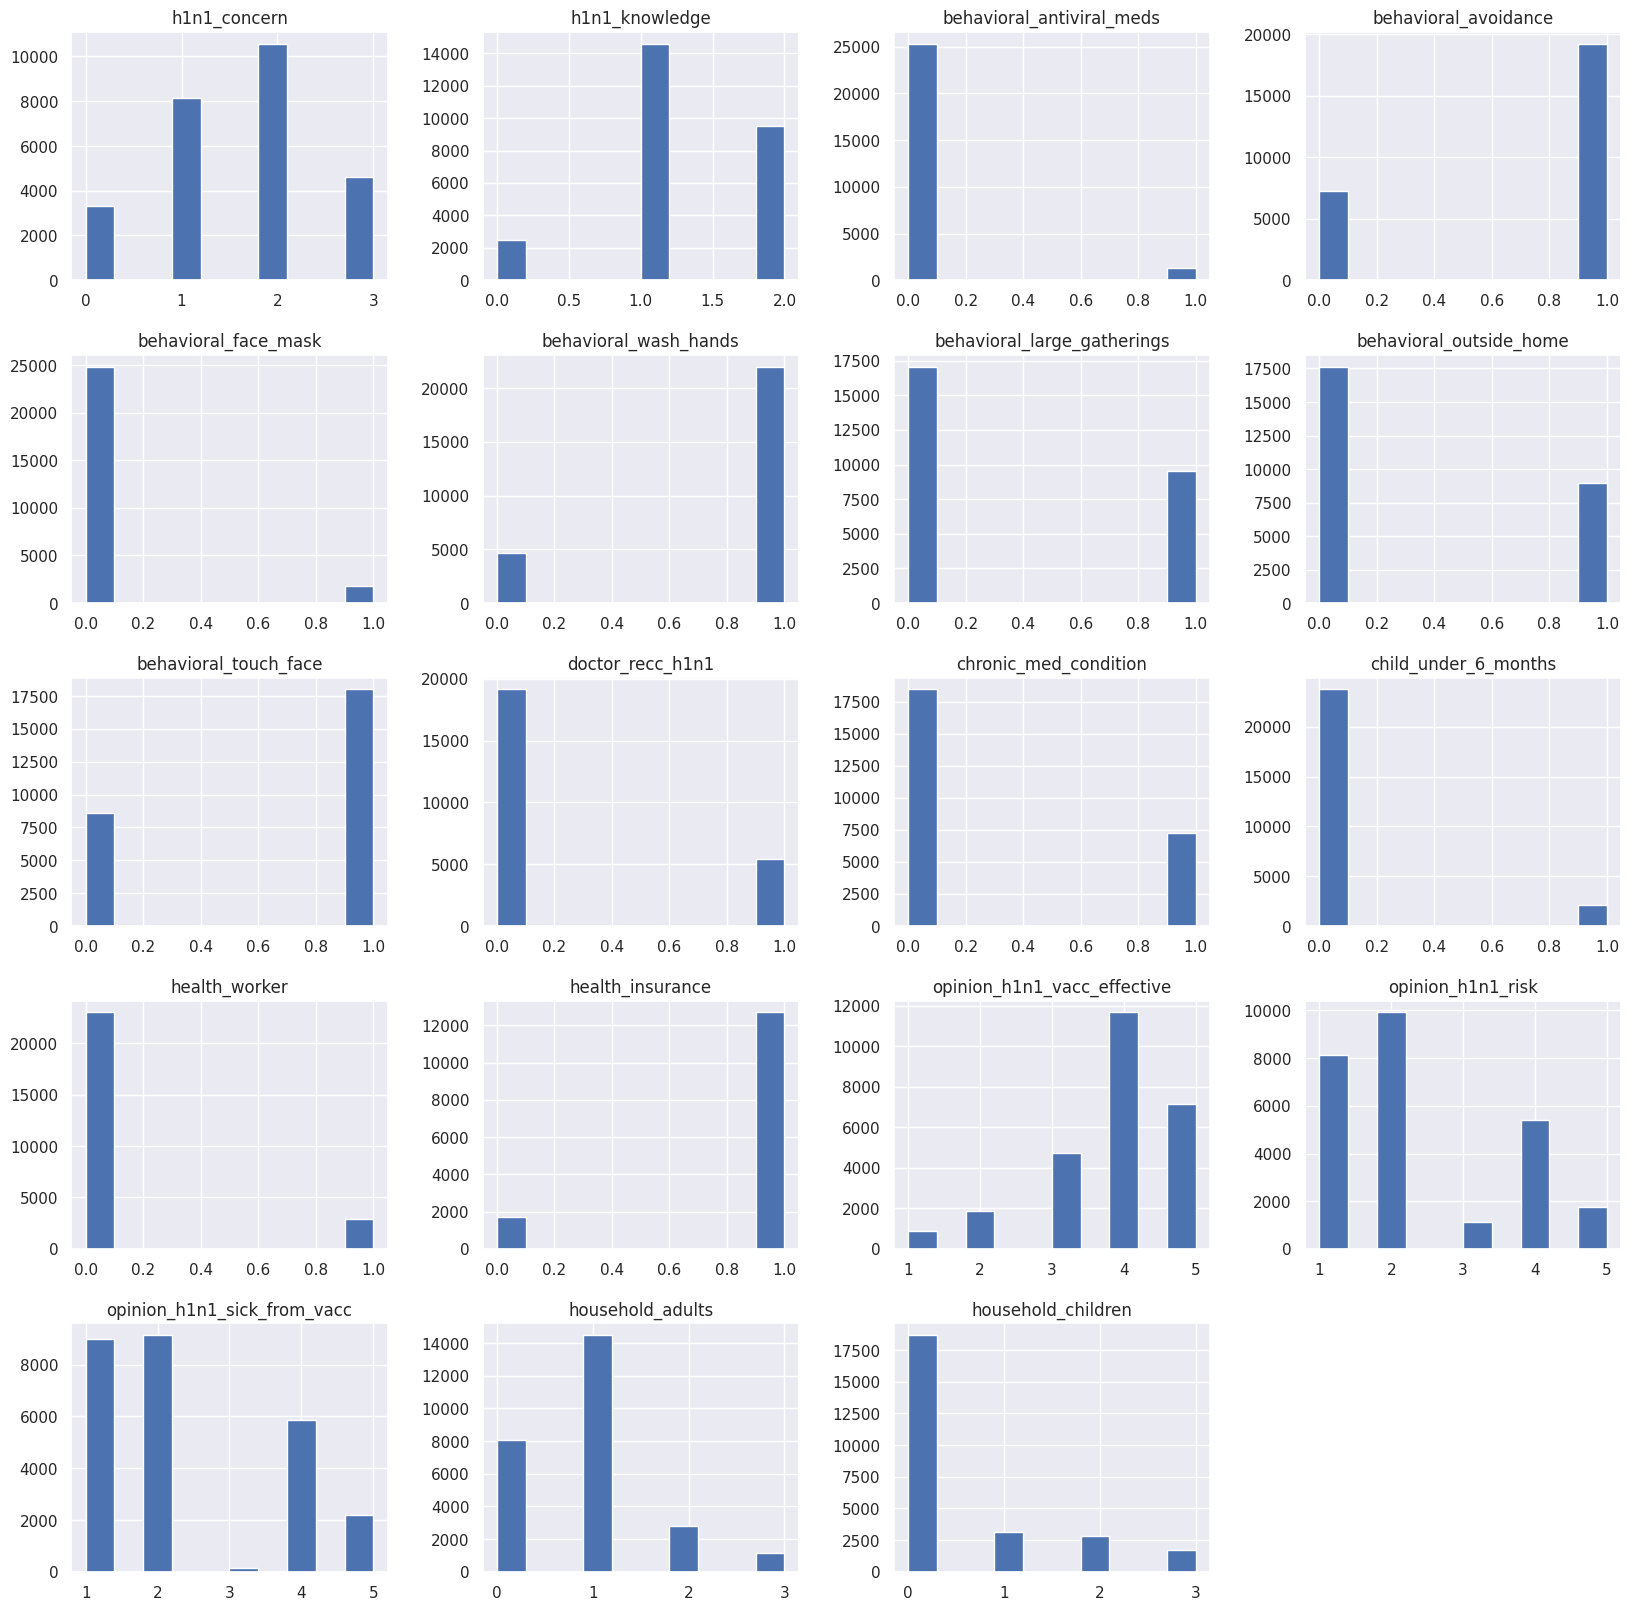

In [ ]:
# visualizing the numerical variable
df.hist(figsize= (20,20));

<font color ='green'> From the above, it is evident that all of our variables are categorical .This are not all of our variables, since some variables are not numeric they can't be visualised like this hence, lets find the non-numeric columns and try to find their distributions.</font>

In [ ]:
# Getting the categorical and the numerical columns
num_columns = df.select_dtypes(include = ['float64']).columns
cat_columns = df.select_dtypes(exclude=['float64']).columns
print('Categorical columns:', cat_columns)
print('Numerical columns:', num_columns)

Categorical columns: Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')
Numerical columns: Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')


<font color ='green'> Now that we have our numeric and  non-numeric columns, lets go ahead and visualize the non-numeric columns.</br>
To do this , lets create a function that visualizes our columns for us then create a loop that passes every column in the categorical columns to avoid repeating ourselves.

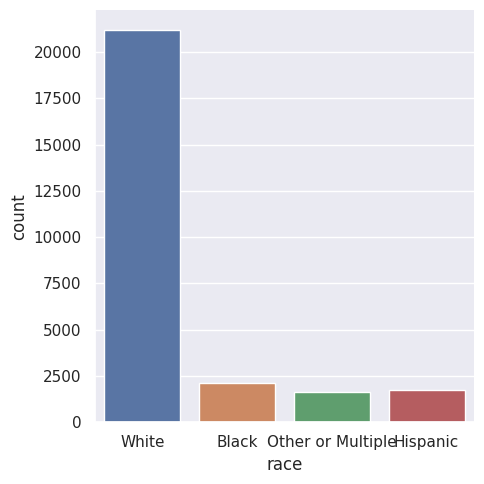

In [ ]:
# Visualizing the categorial variables
def factor_plot(data, column, kind):
    return sns.catplot(x=column, kind=kind, data=data)

factor_plot(df, 'race', kind='count');

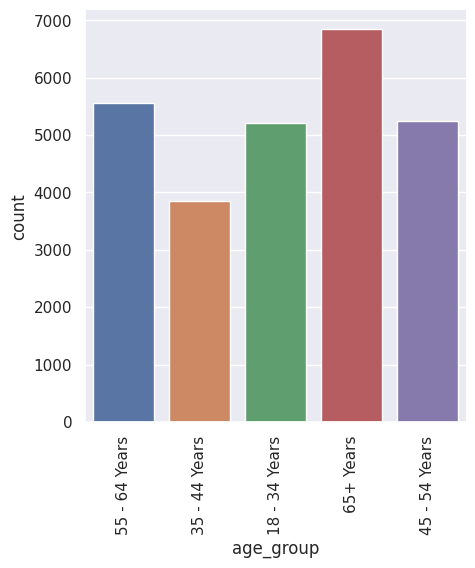

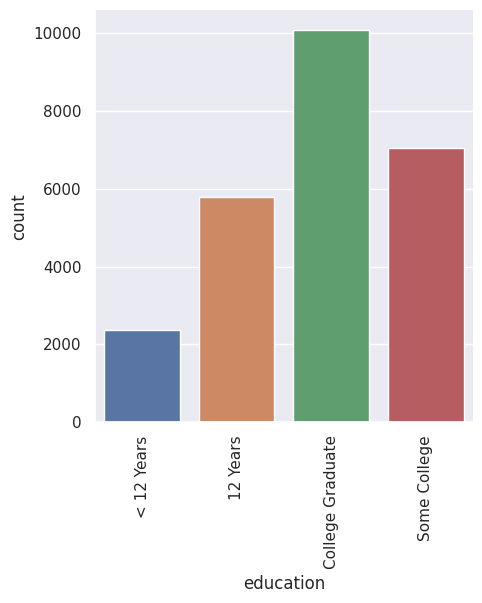

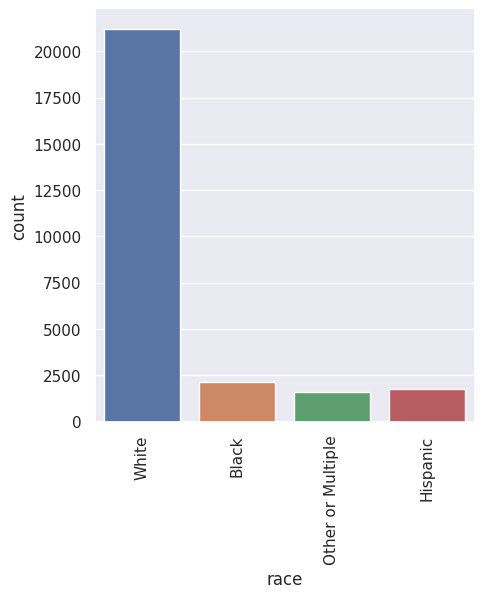

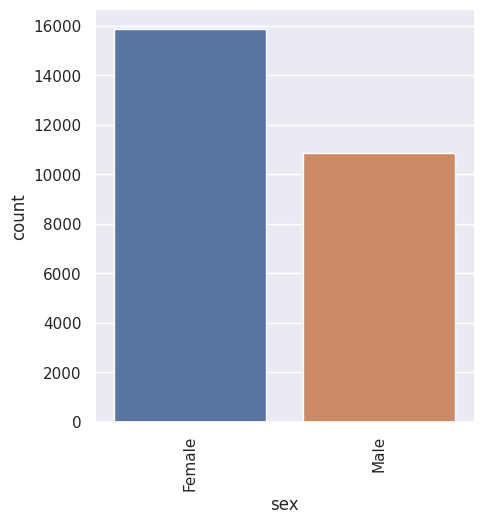

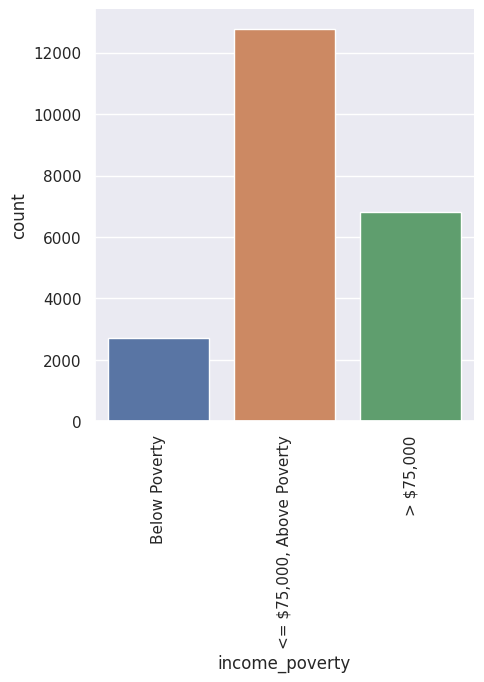

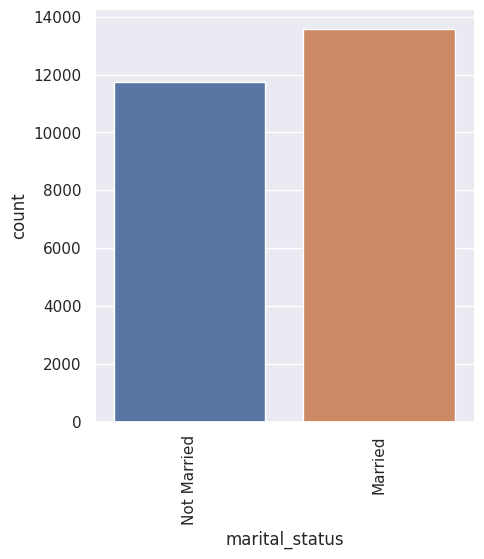

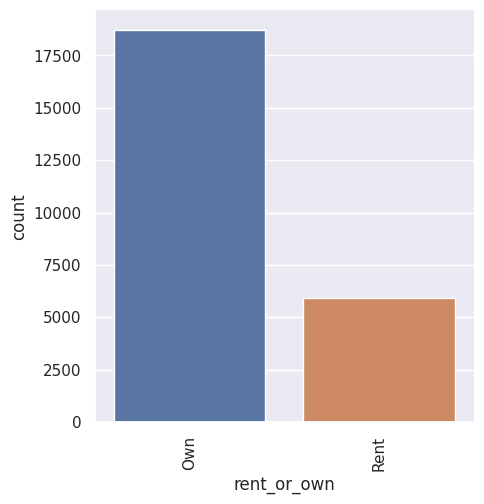

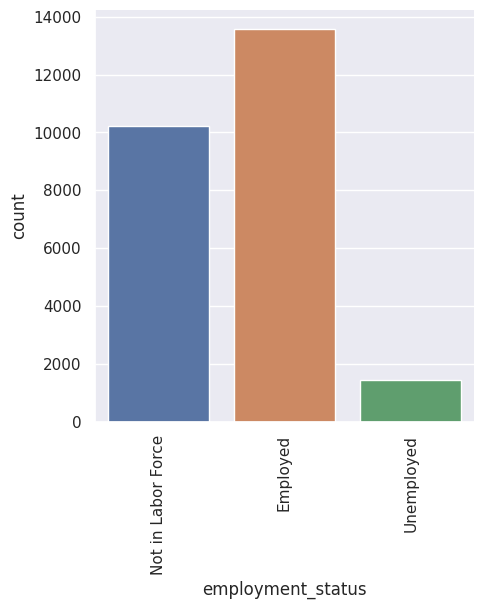

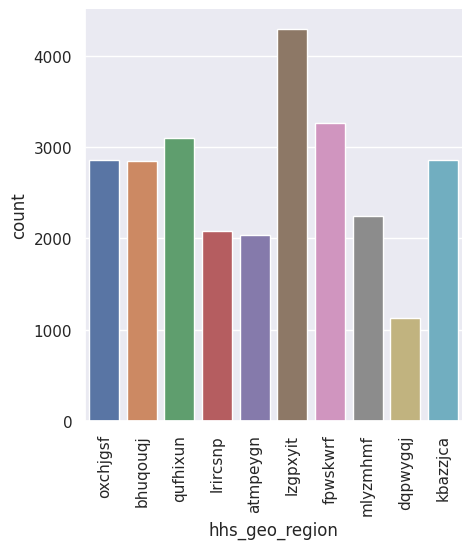

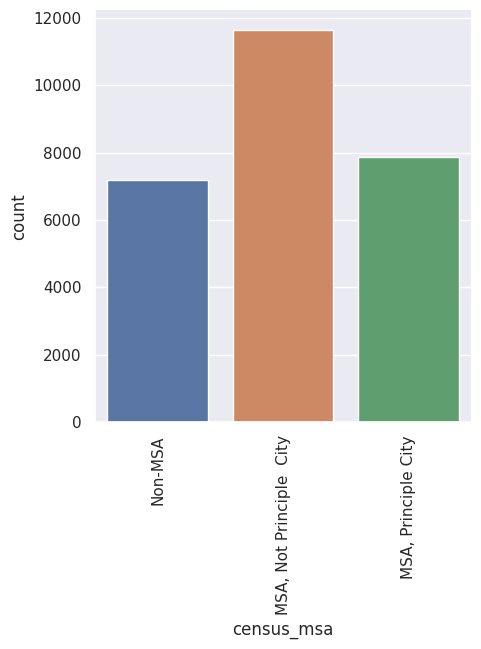

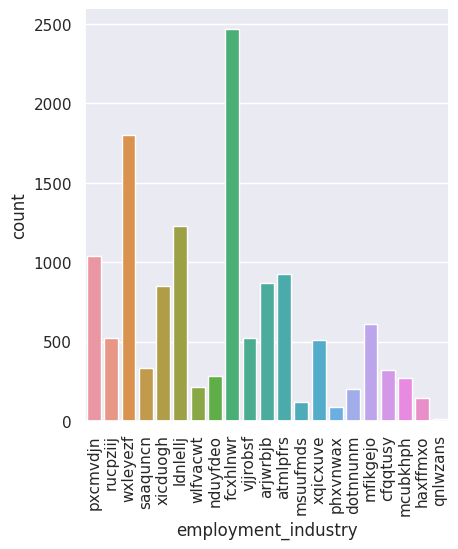

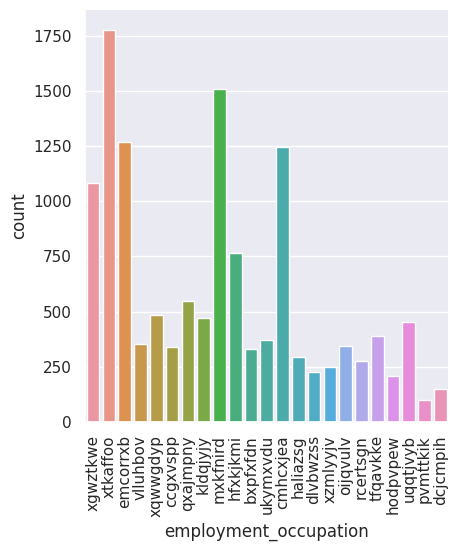

In [ ]:
for col in cat_columns:
  factor_plot(df,col,kind='count')
  plt.xticks(rotation=90)

<font color ='green'> From the above you can see that even the non-numeric columns are also categorical.</font>

## 2.3.3 ) Checking for the distribution of variables in the testing dataset.

<font color ='green'> To understand the testing data , lets go ahead and plot histograms showing the distributions of each variable.</font>

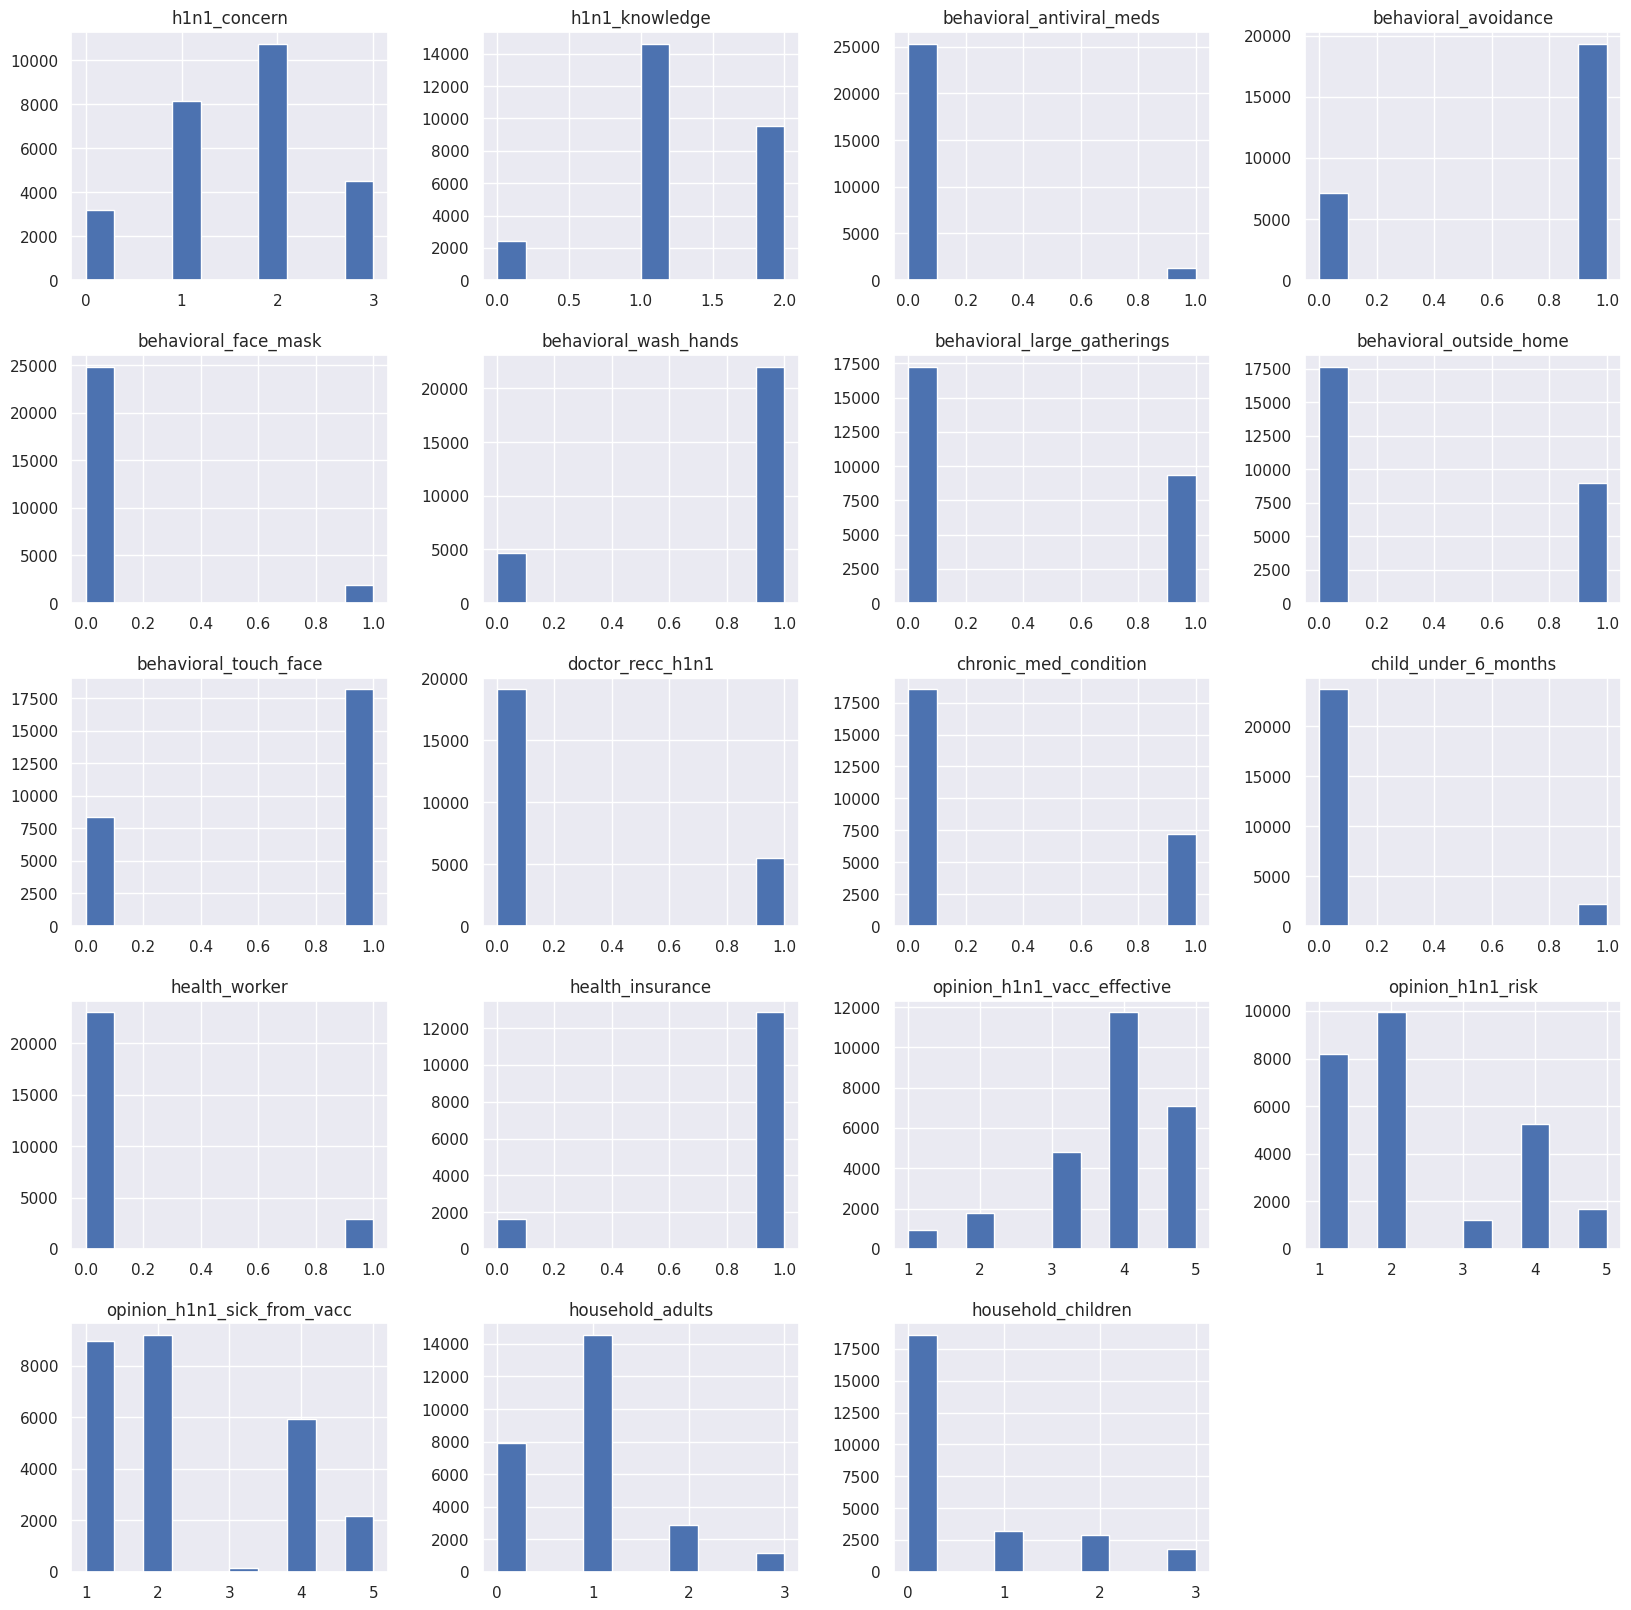

In [ ]:
# visualizing the numerical variable
test_df.hist(figsize= (20,20));

<font color ='green'> From the above, we can also see that all of our variables are categorical just like in the training set.We should also visualise the non-categorical columns in the testing dataset .

---



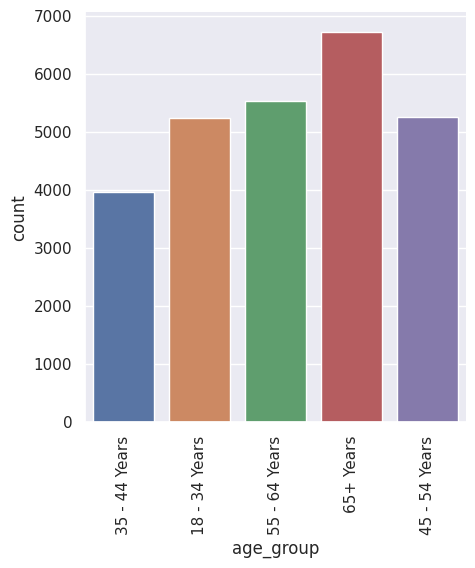

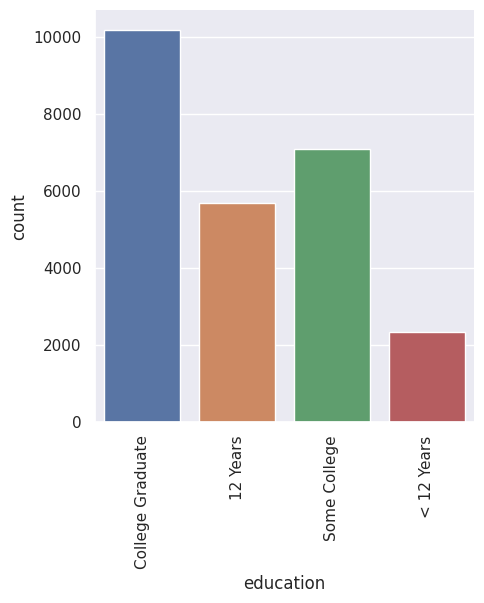

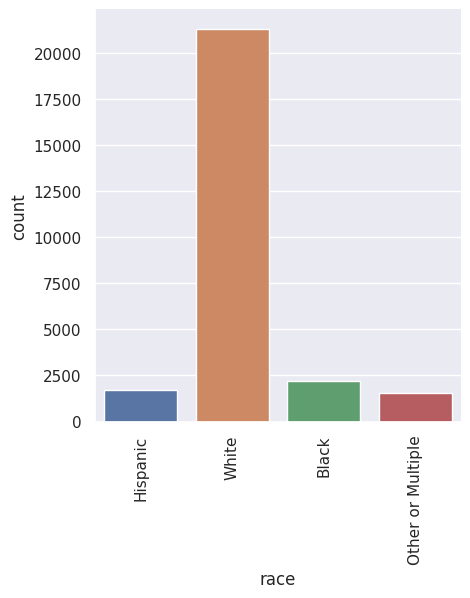

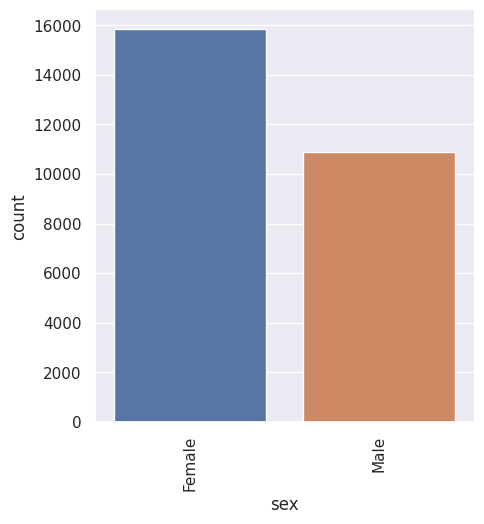

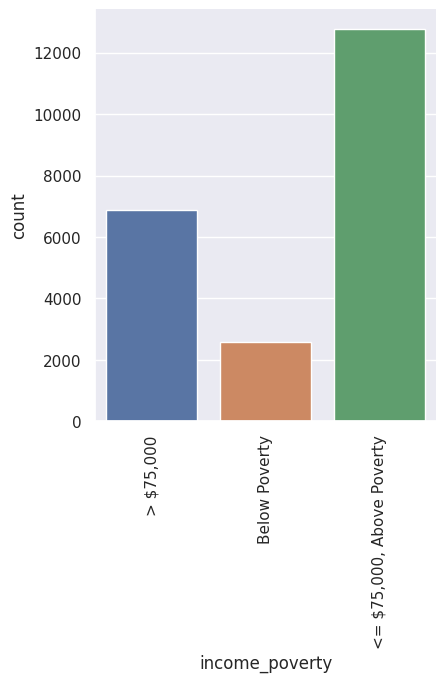

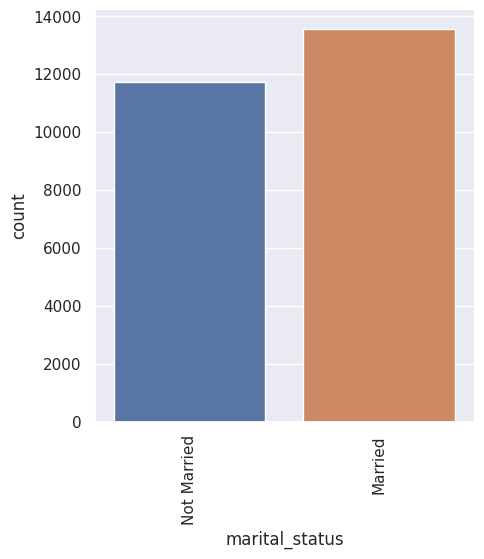

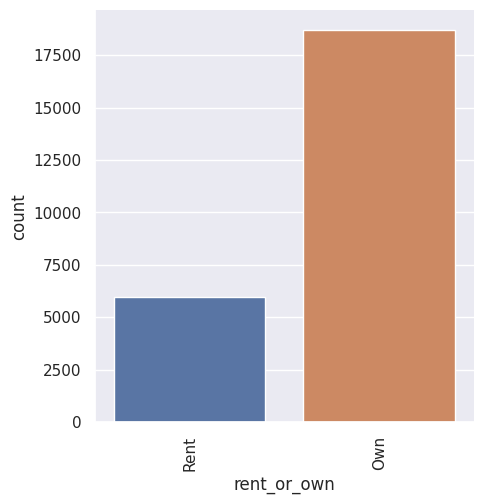

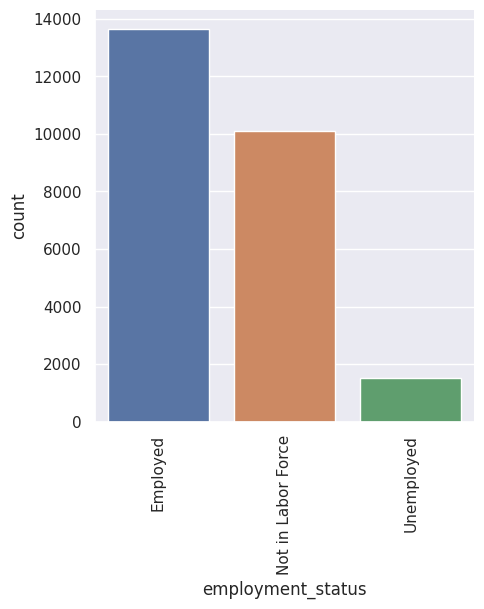

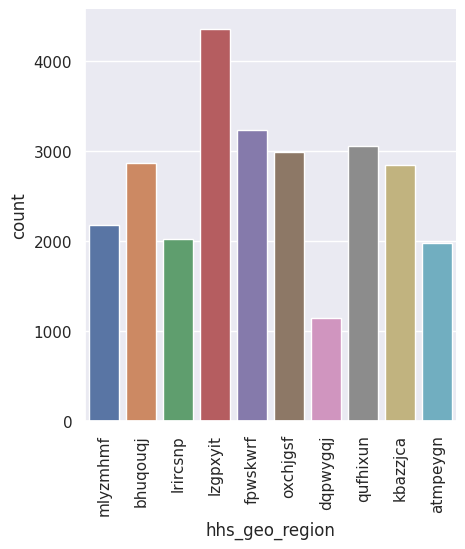

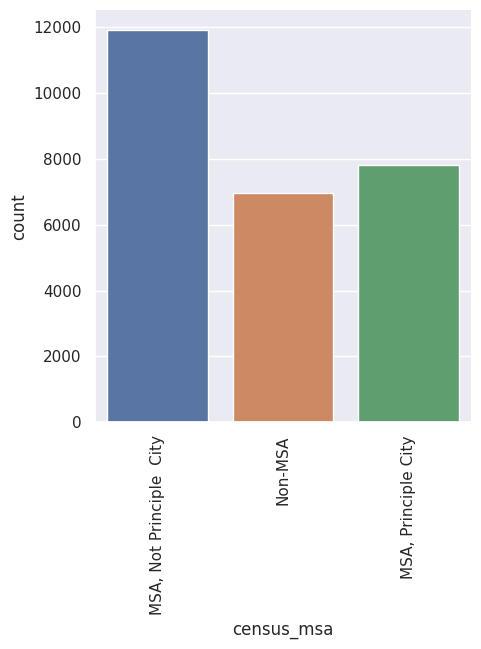

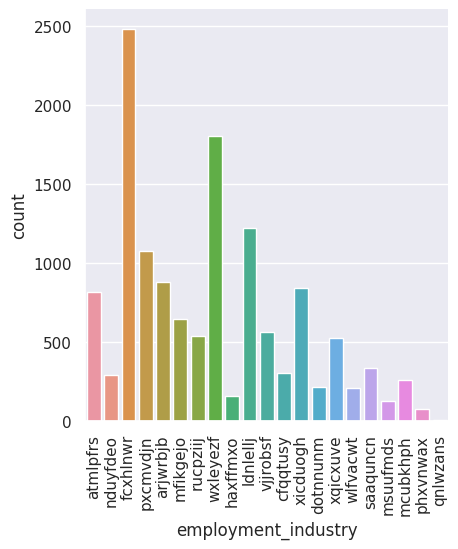

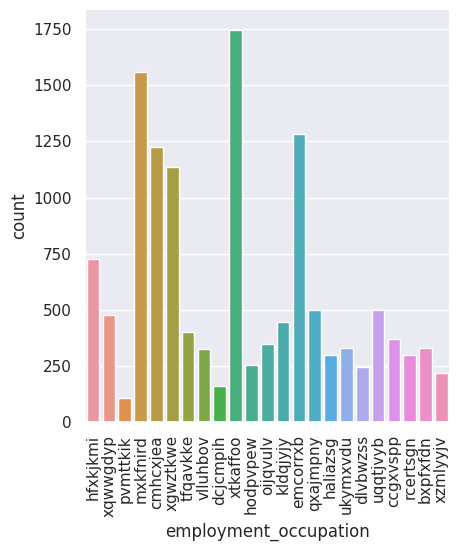

In [ ]:
for col in cat_columns:
  
  factor_plot(test_df,col,kind='count')
  plt.xticks(rotation=90)

<font color ='green'> From the above you can see that even the non-numeric columns are also categorical.</font>

# 2.4 ) Performing EDA (Explanatory Data Analysis)

<font color ='green'> EDA is basically trying to investigate and analyze the data in order to  give a brief summary on the main characteristics of the data.</br>
Since we have already checked the distribution of the data by ploting histograms, that counts as our *univariate analysis* ,we shall there fore go straight ahead to bivariate analysis.



</font>

## 2.4.1) Bivariate Analysis.

<font color ='green'> In this type of analysis, we shall try to investigate the relationship between our target variable **H1n1 vaccine** and all other variables.</br>
**Note :   we shall do this only for the training dataset and assume that since the varaibles are behaving in the same manner ('All categorical') then we can assume that the EDA results are most likely to be the same.**

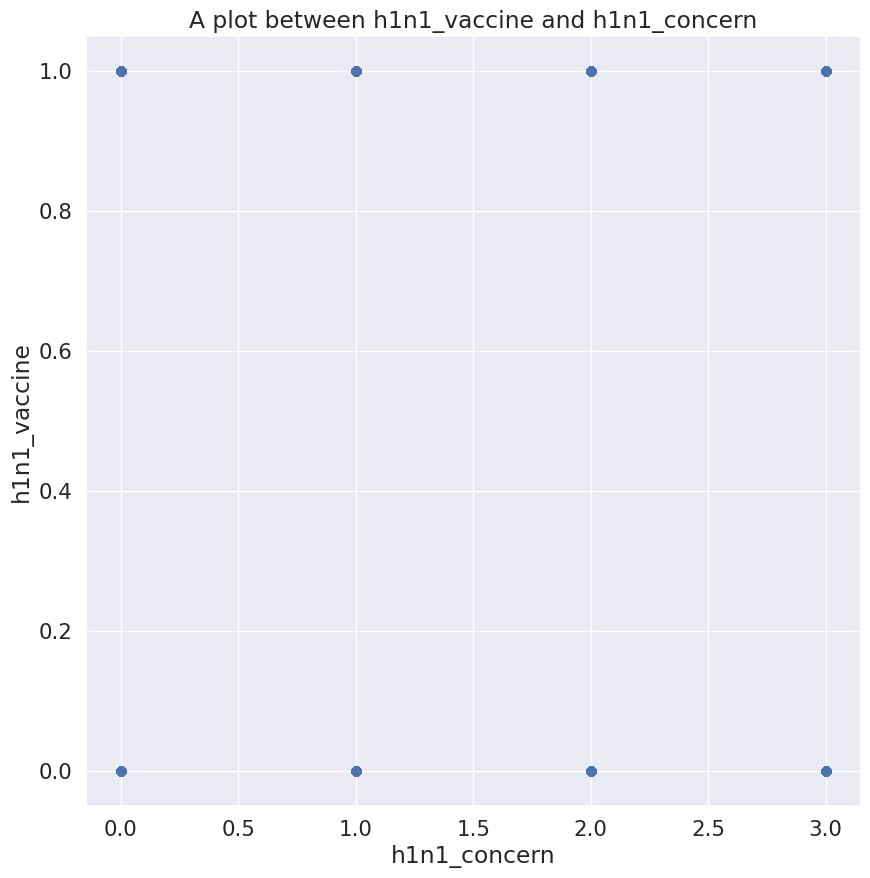

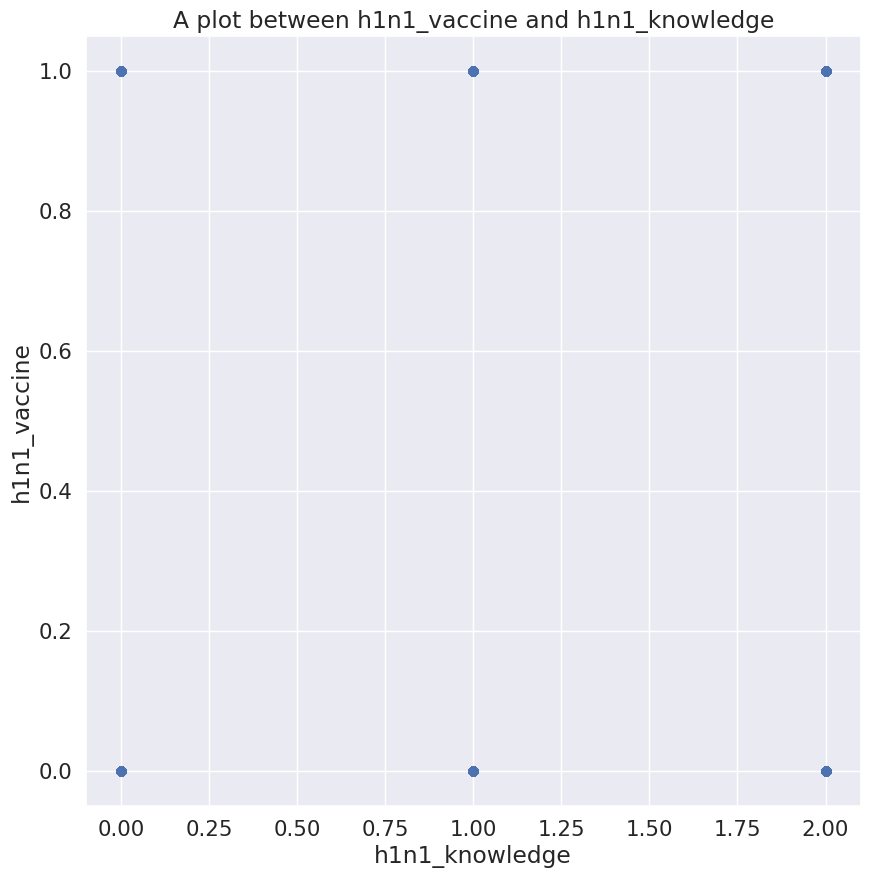

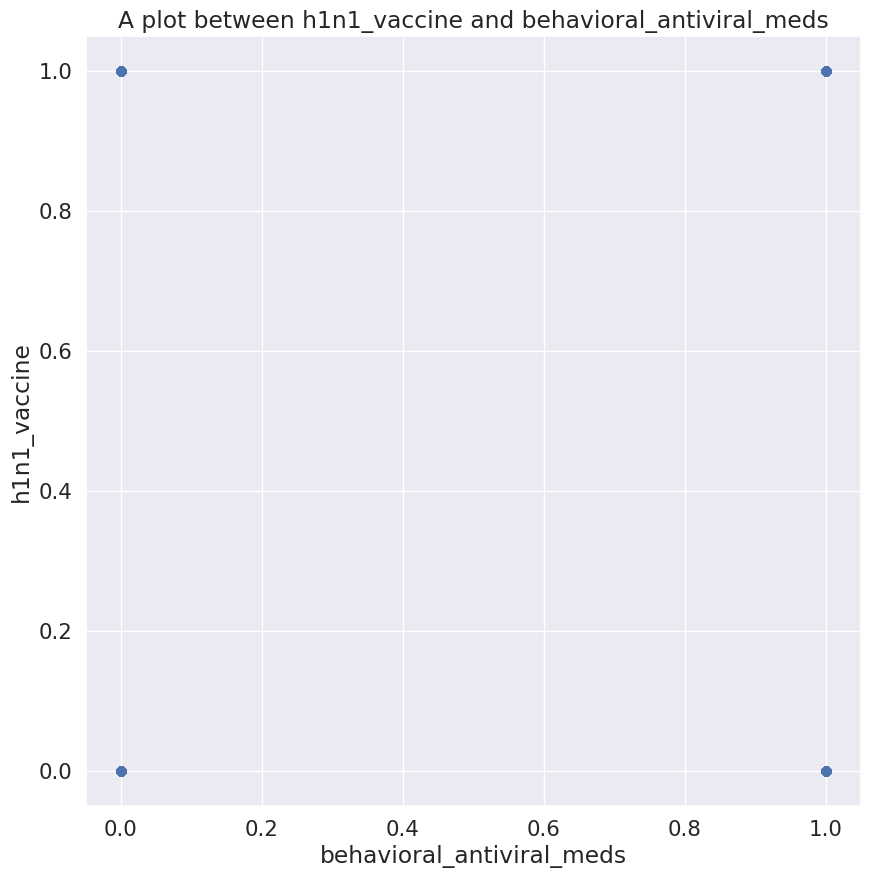

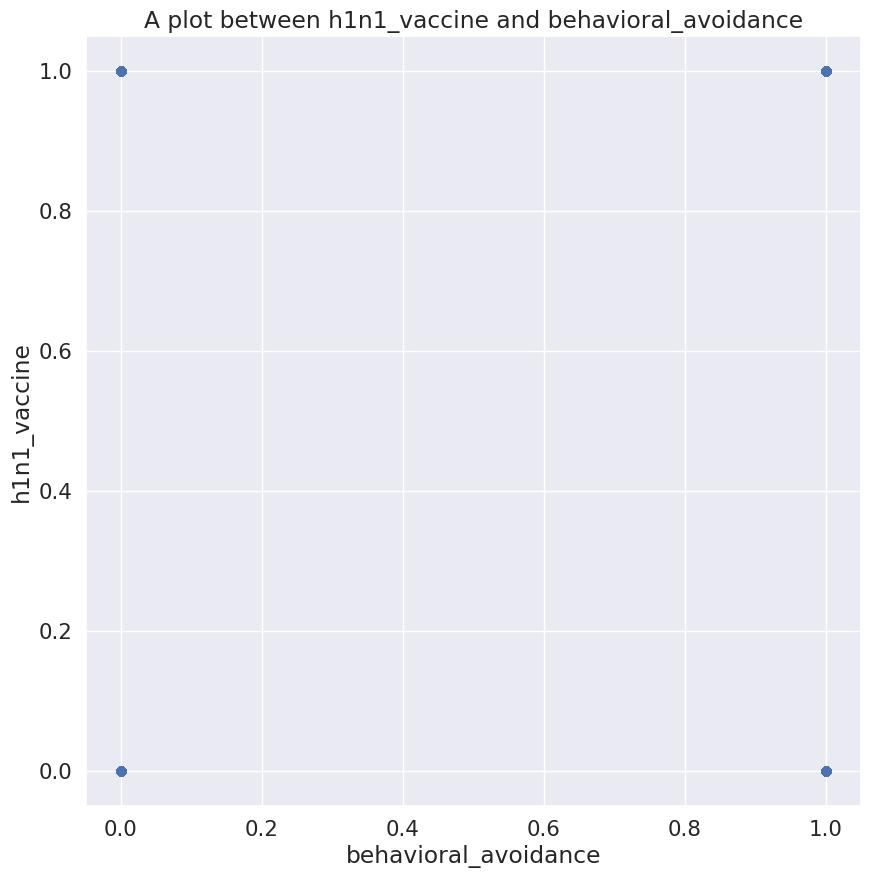

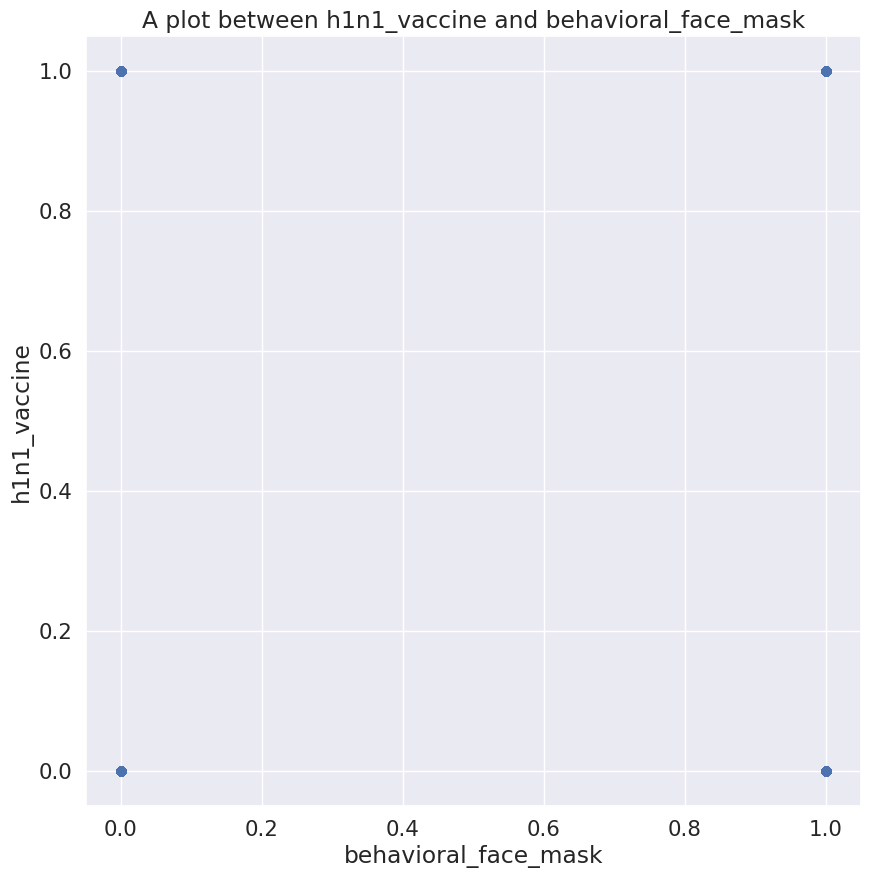

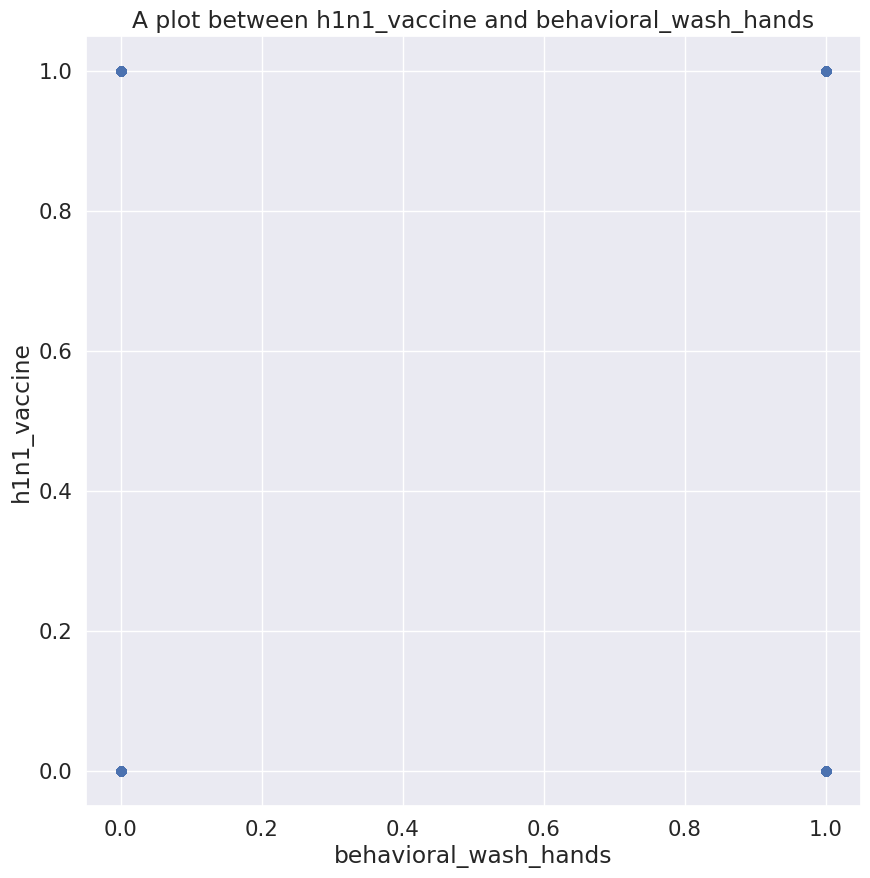

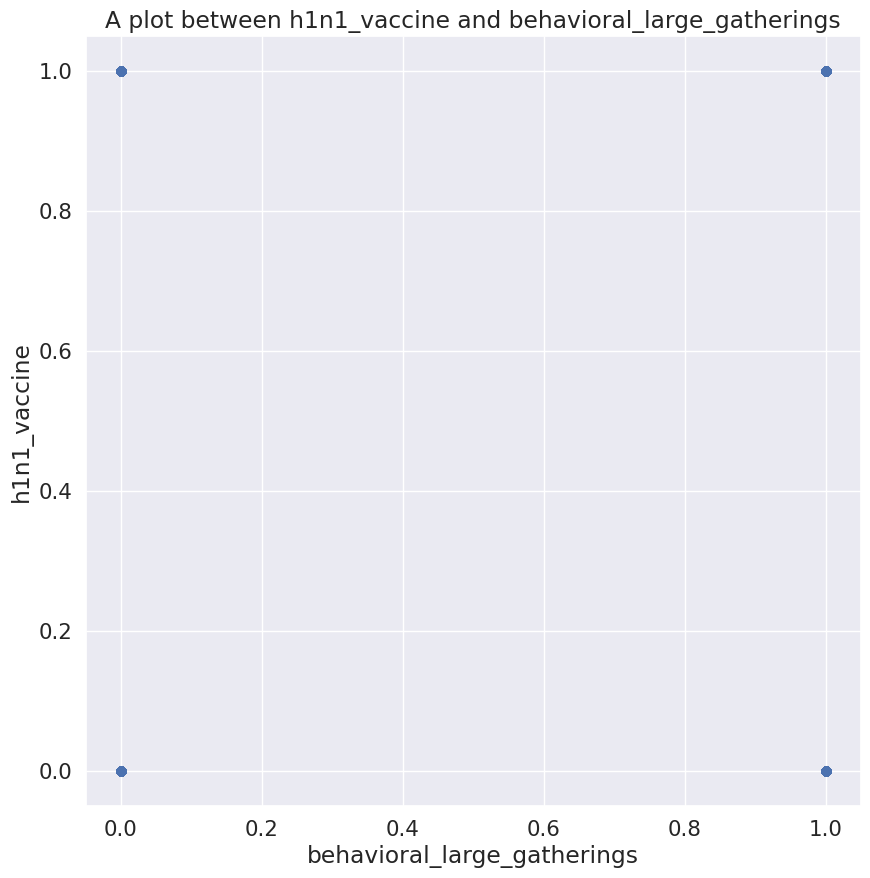

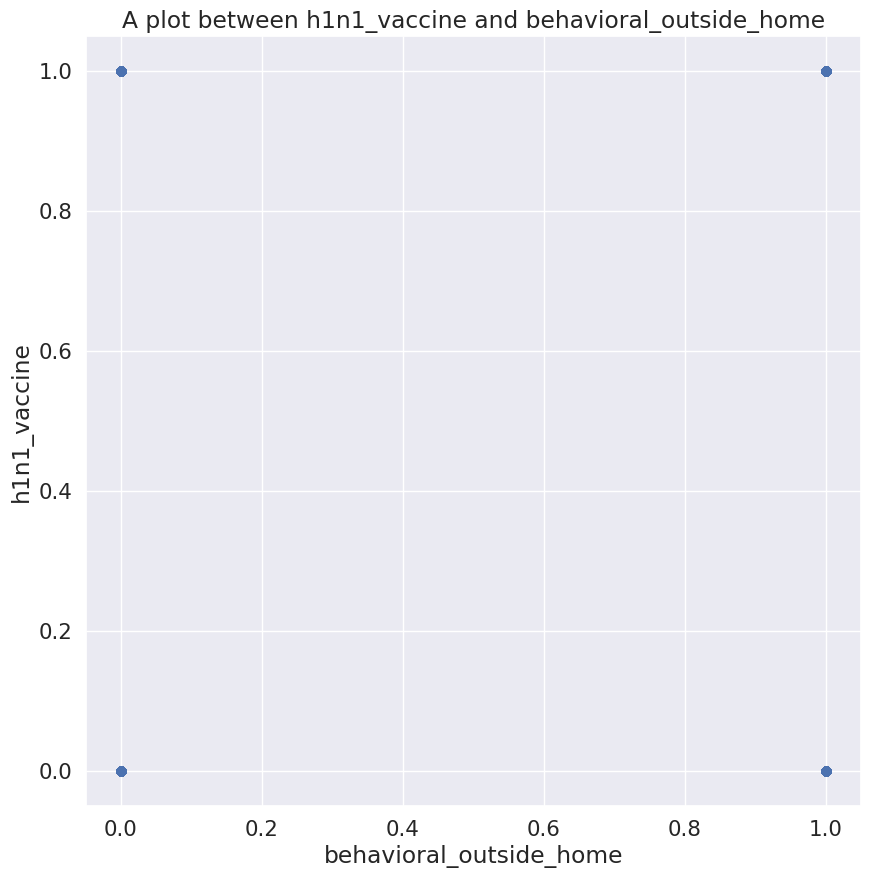

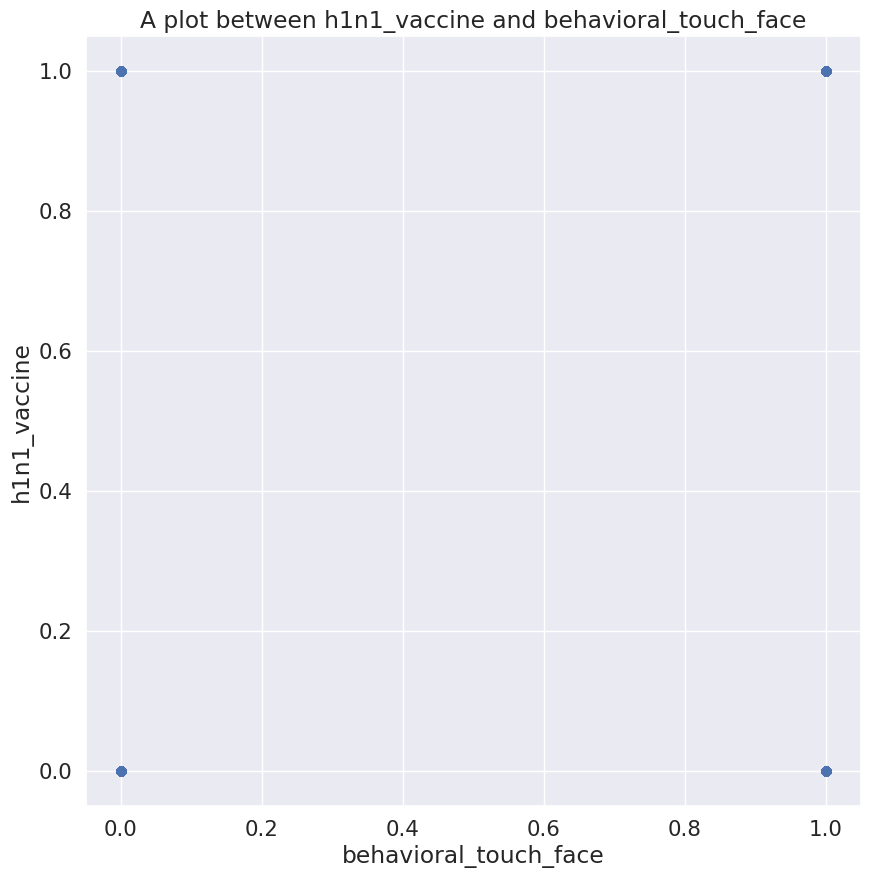

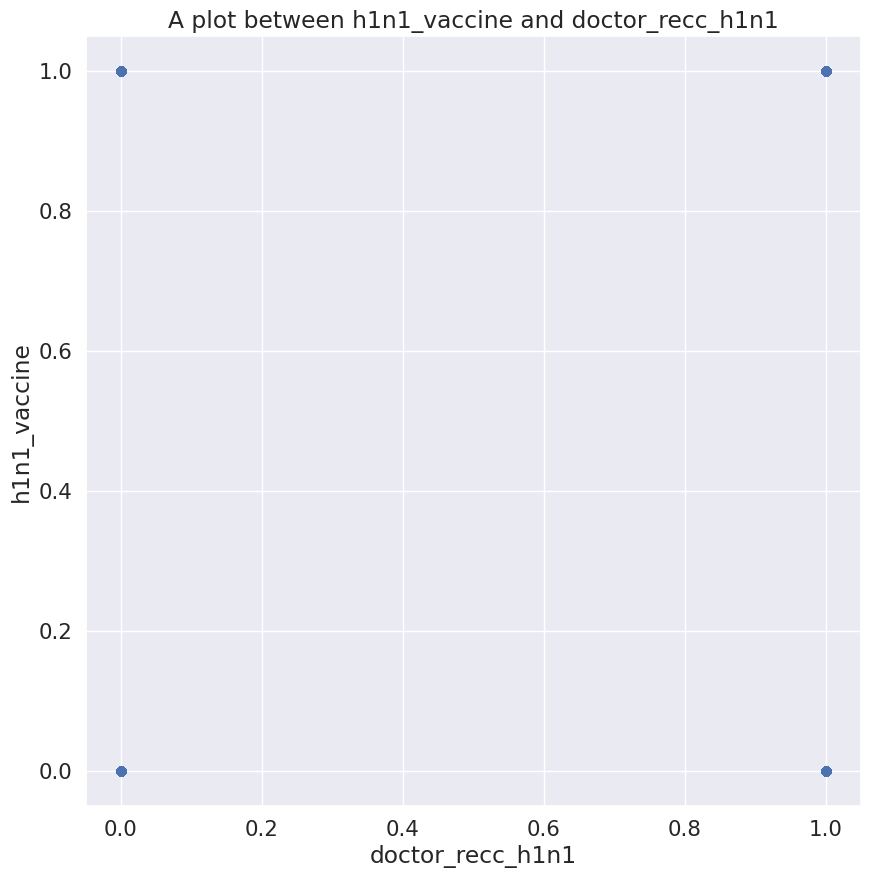

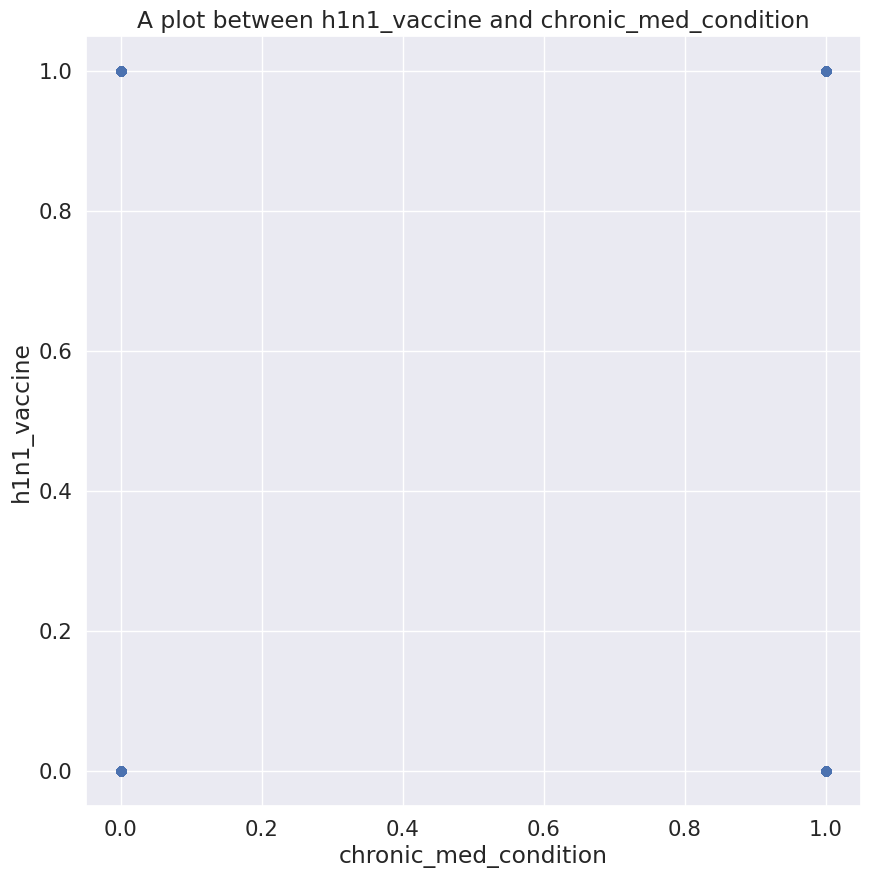

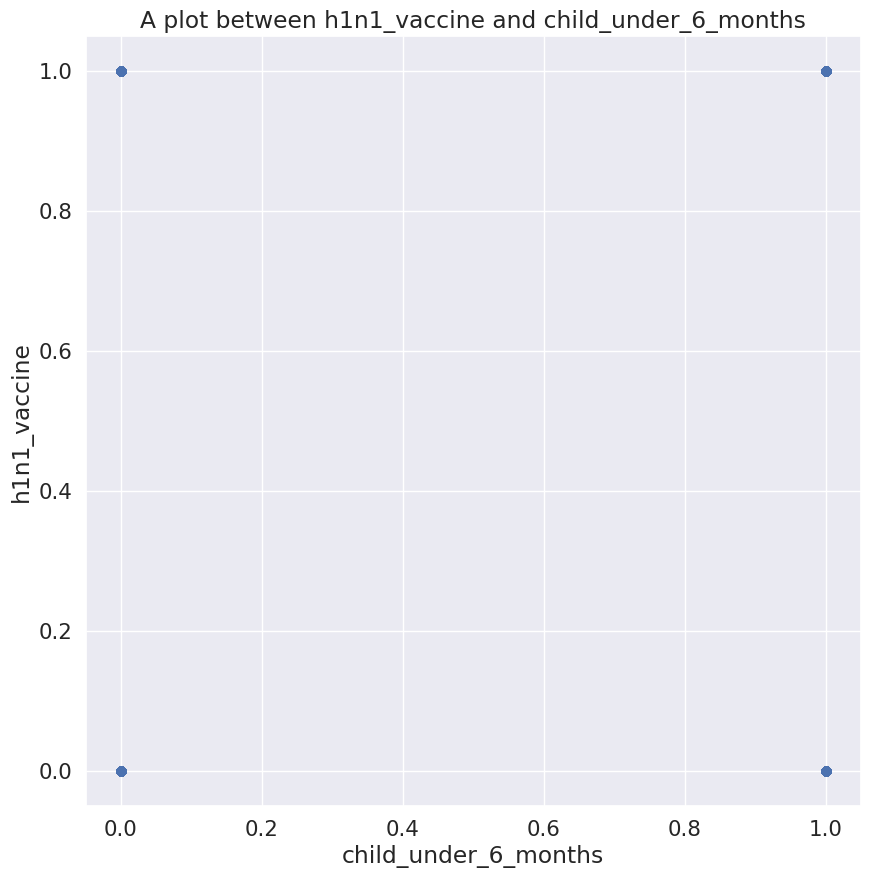

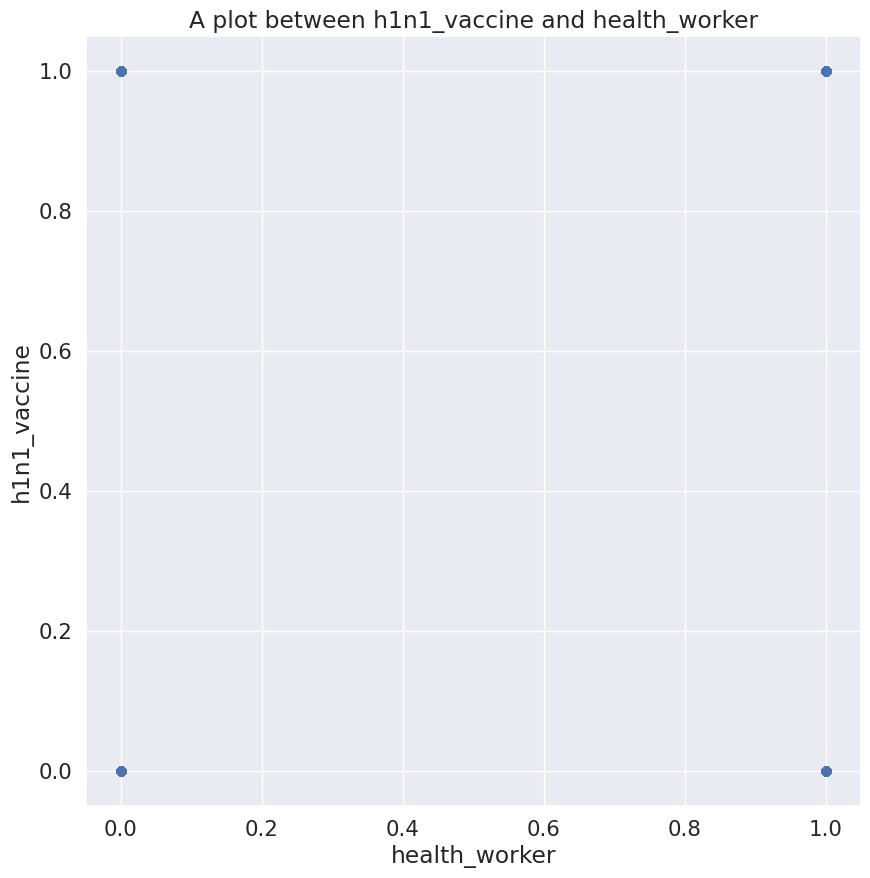

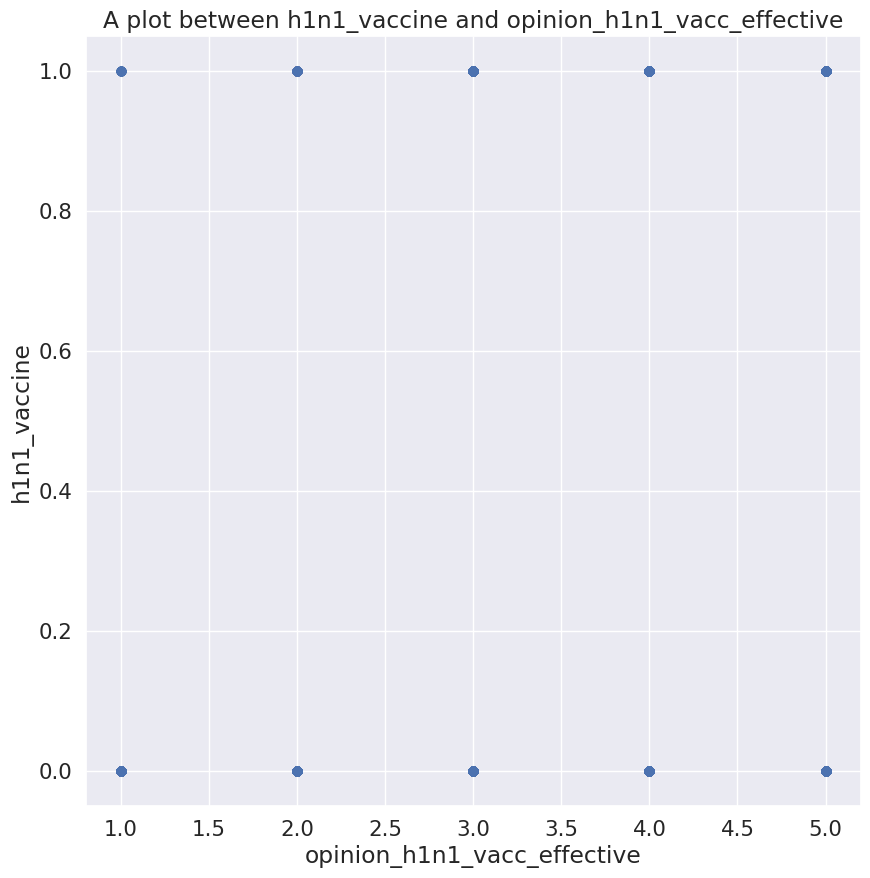

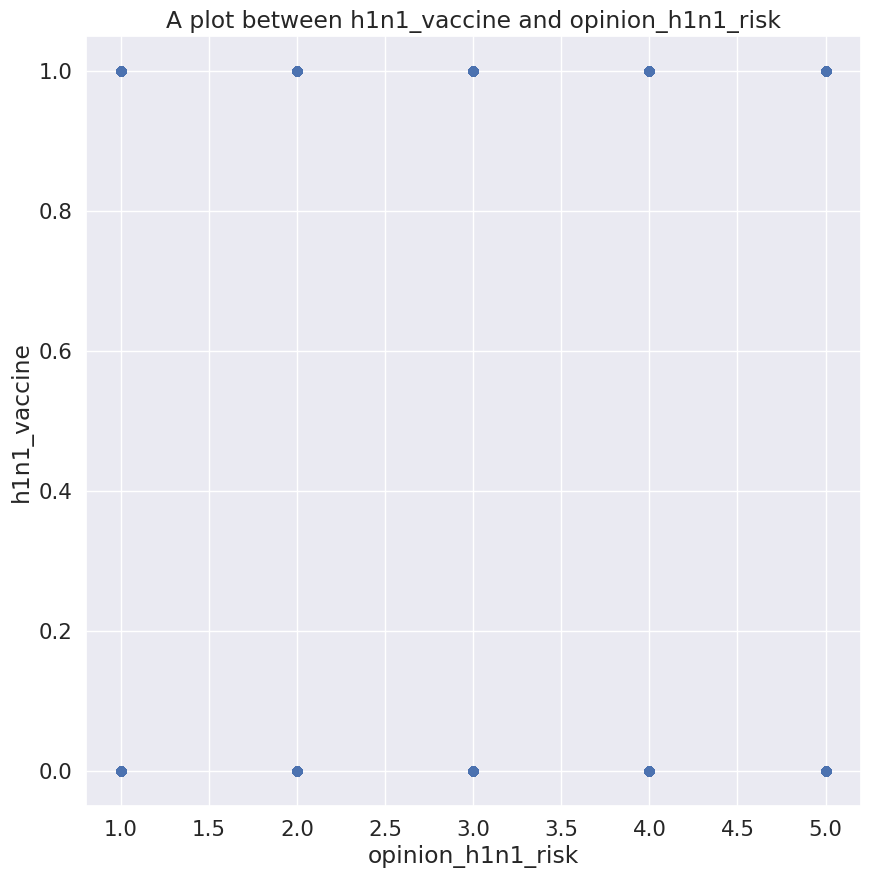

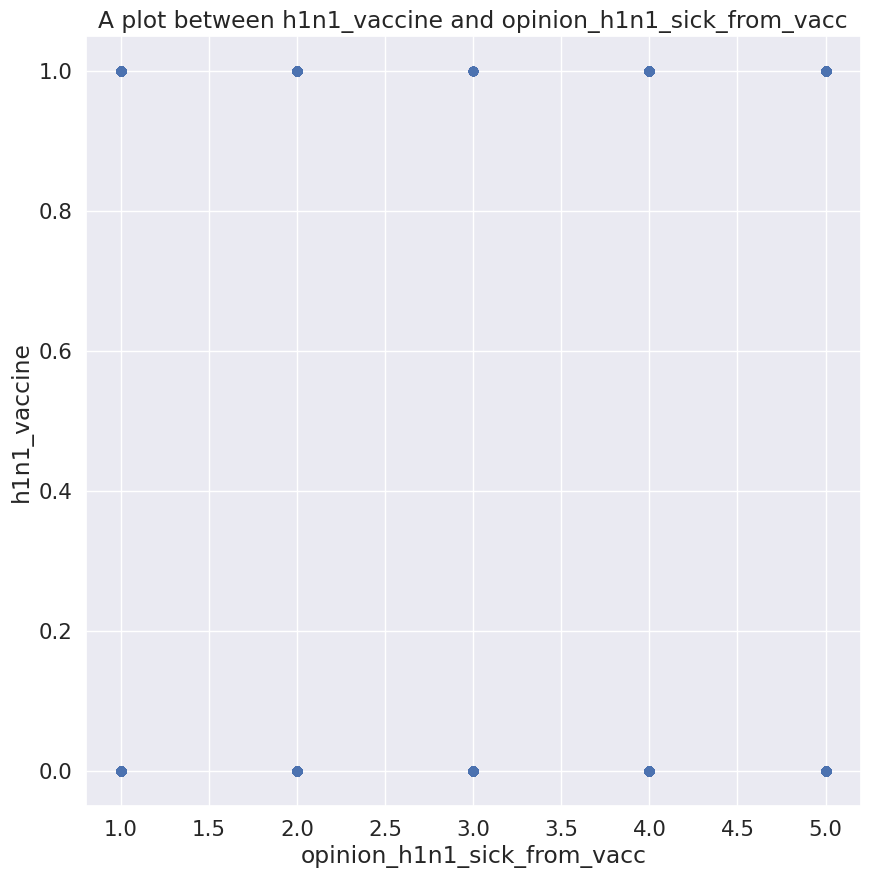

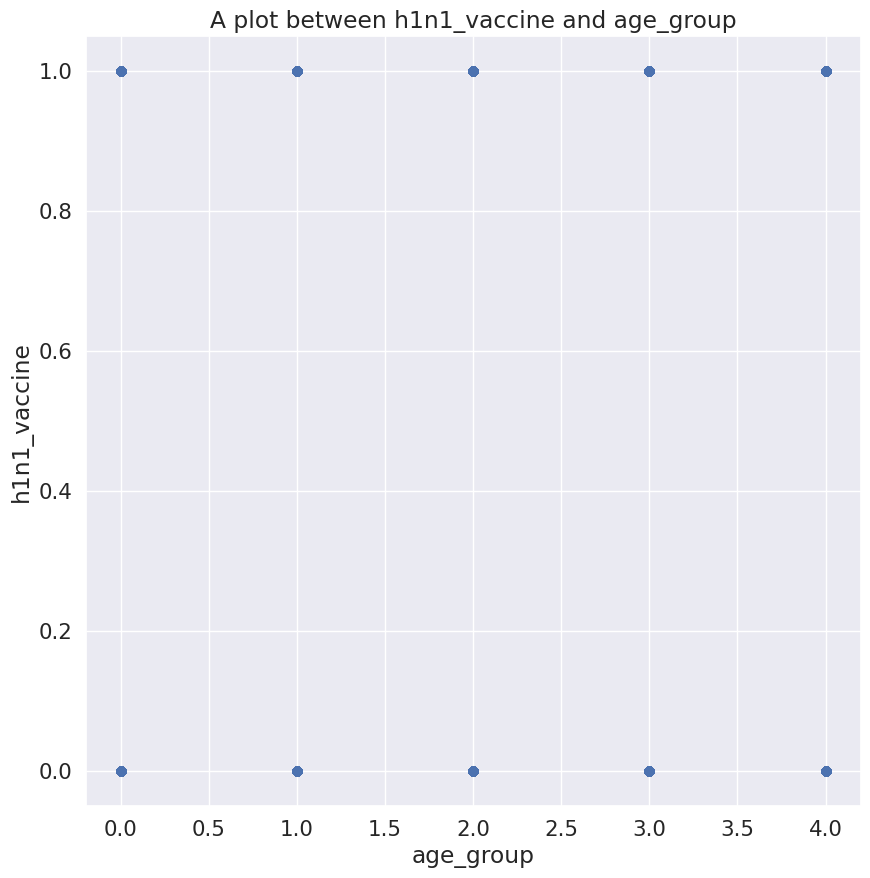

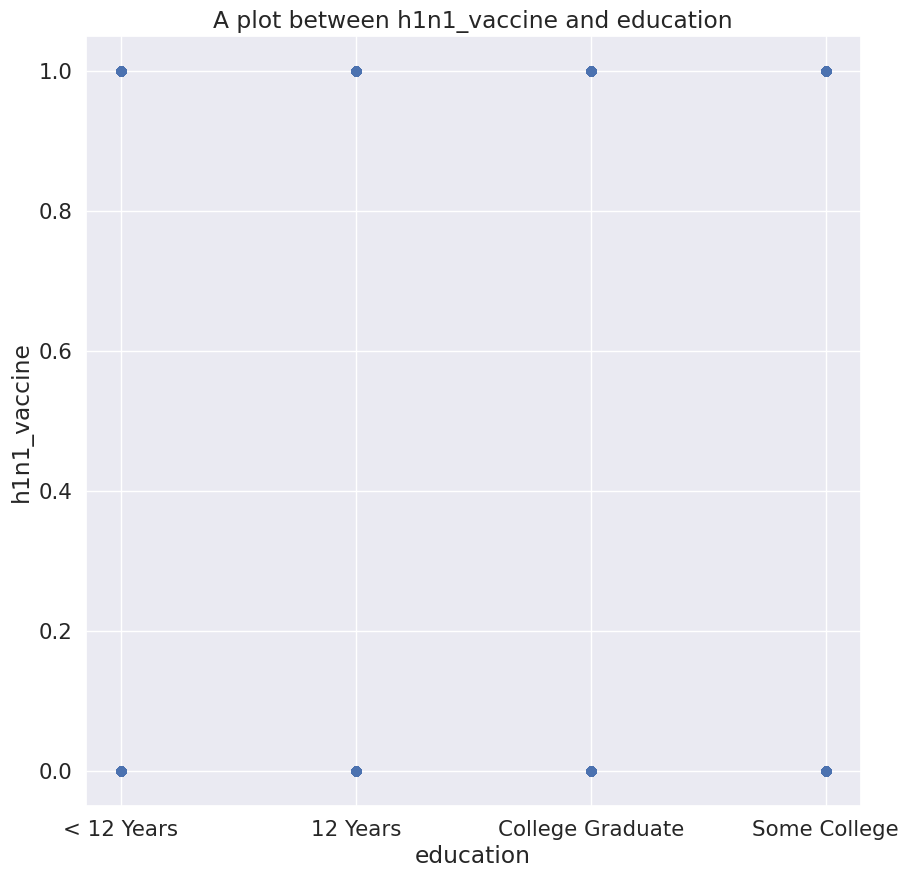

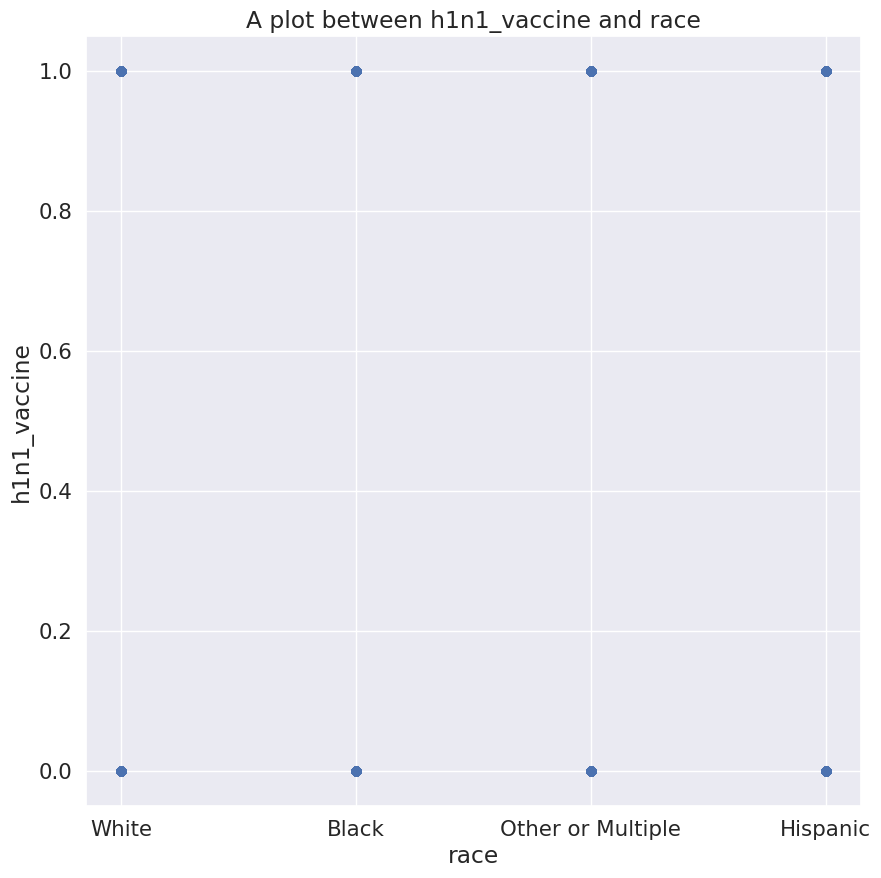

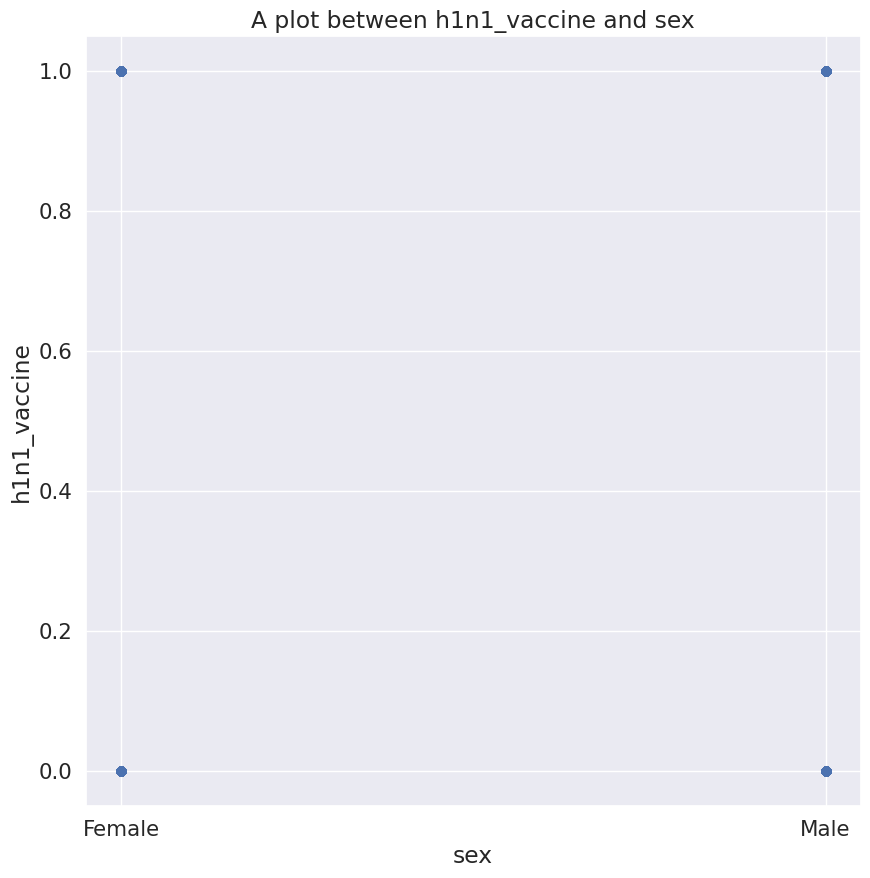

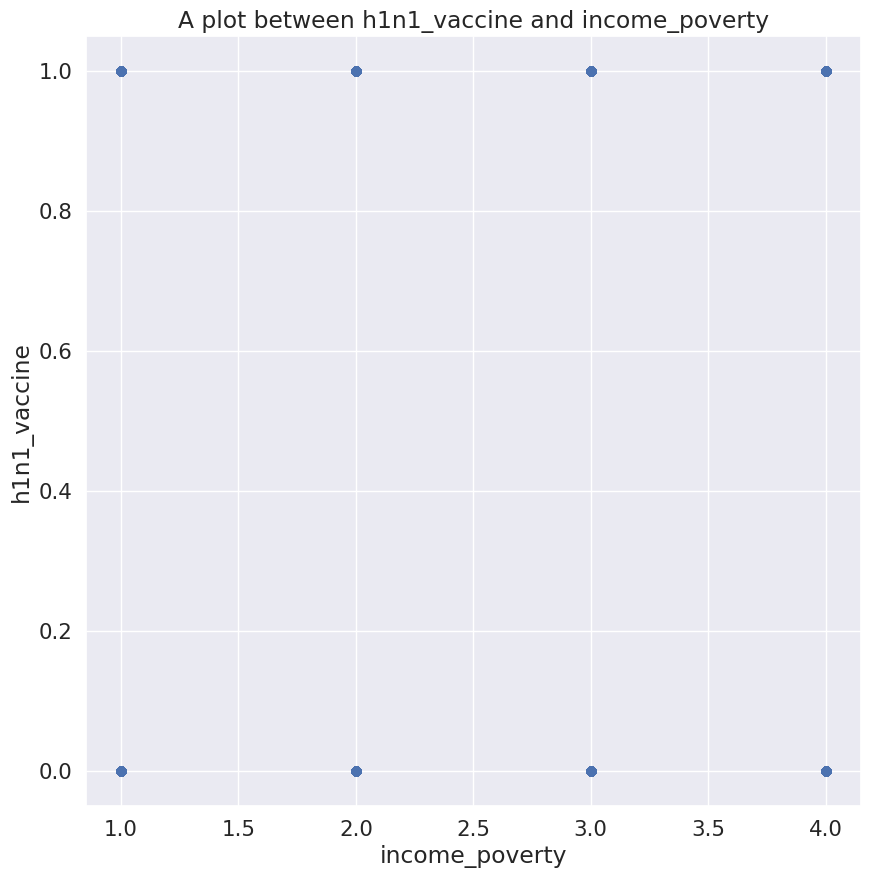

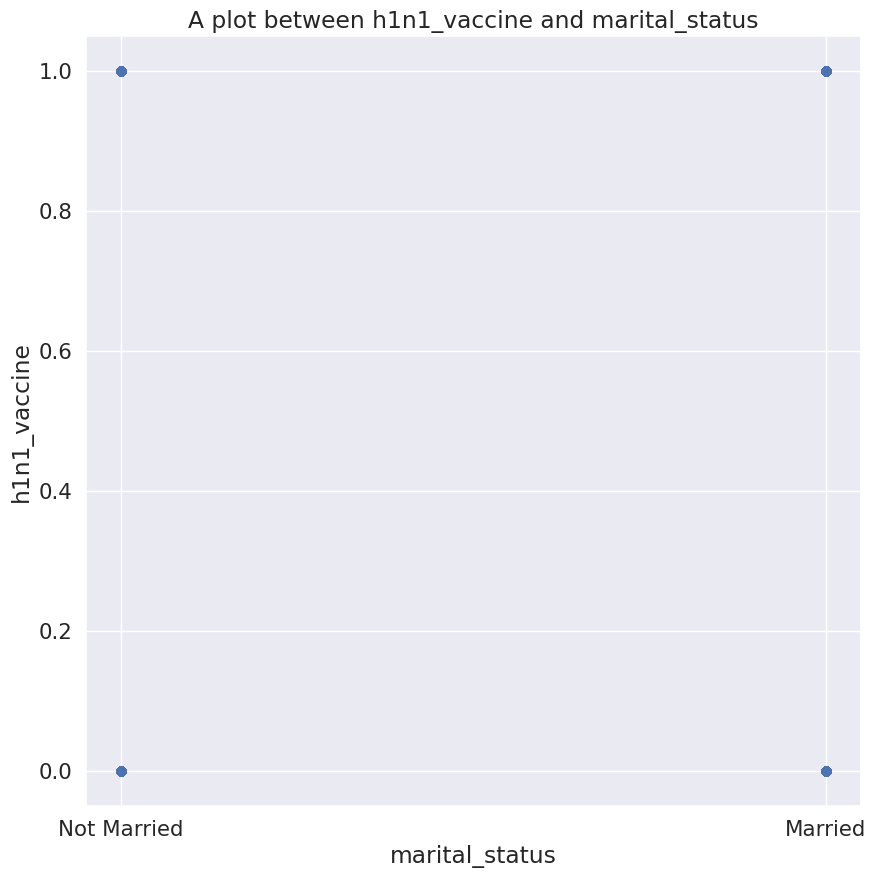

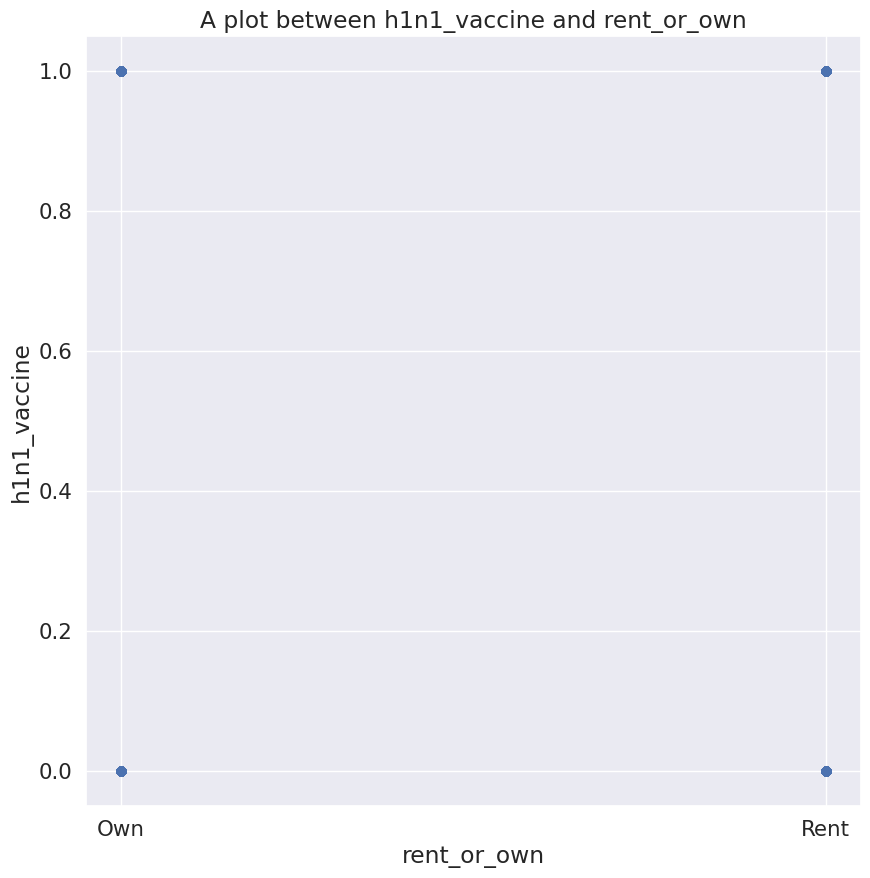

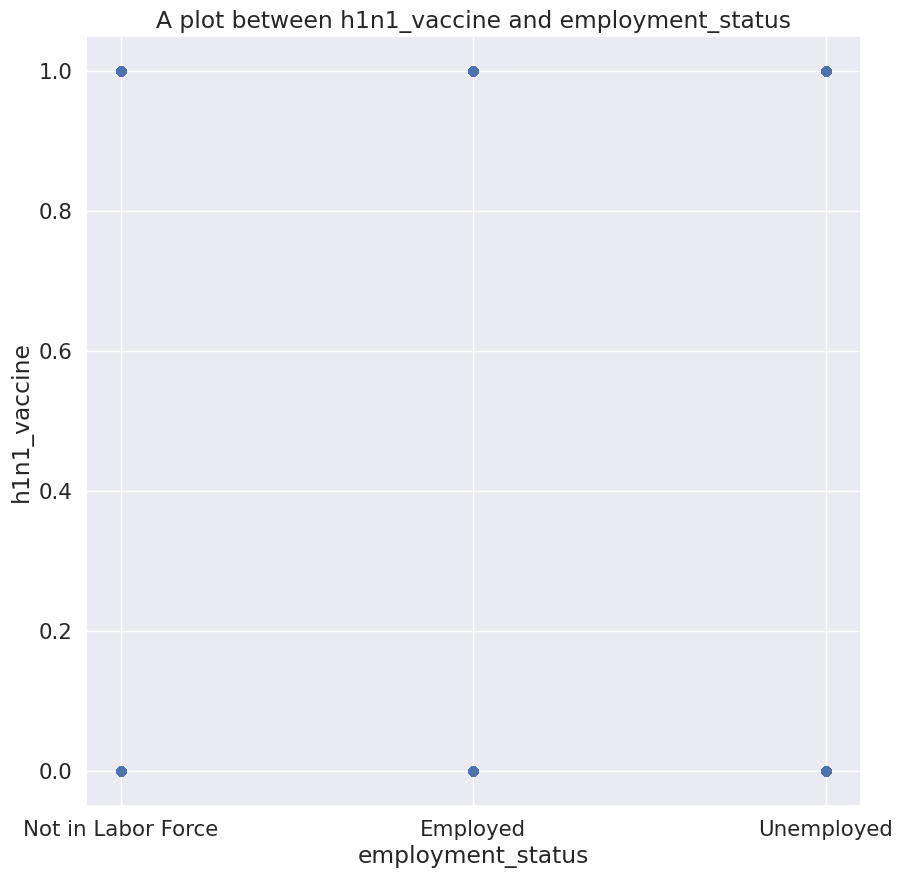

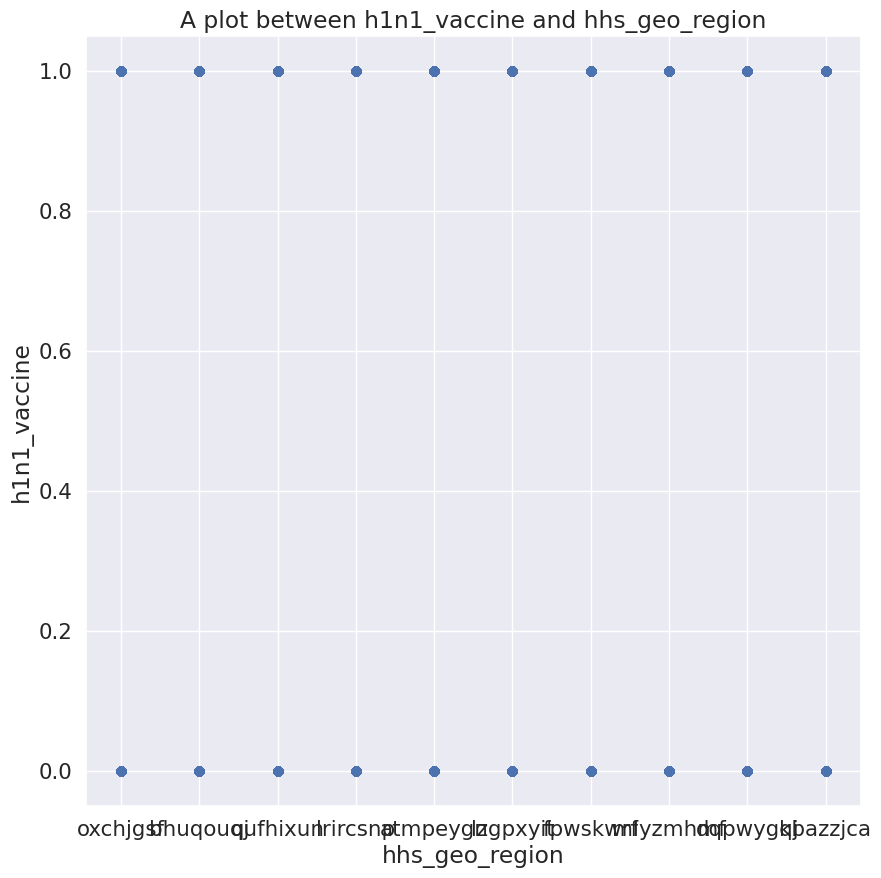

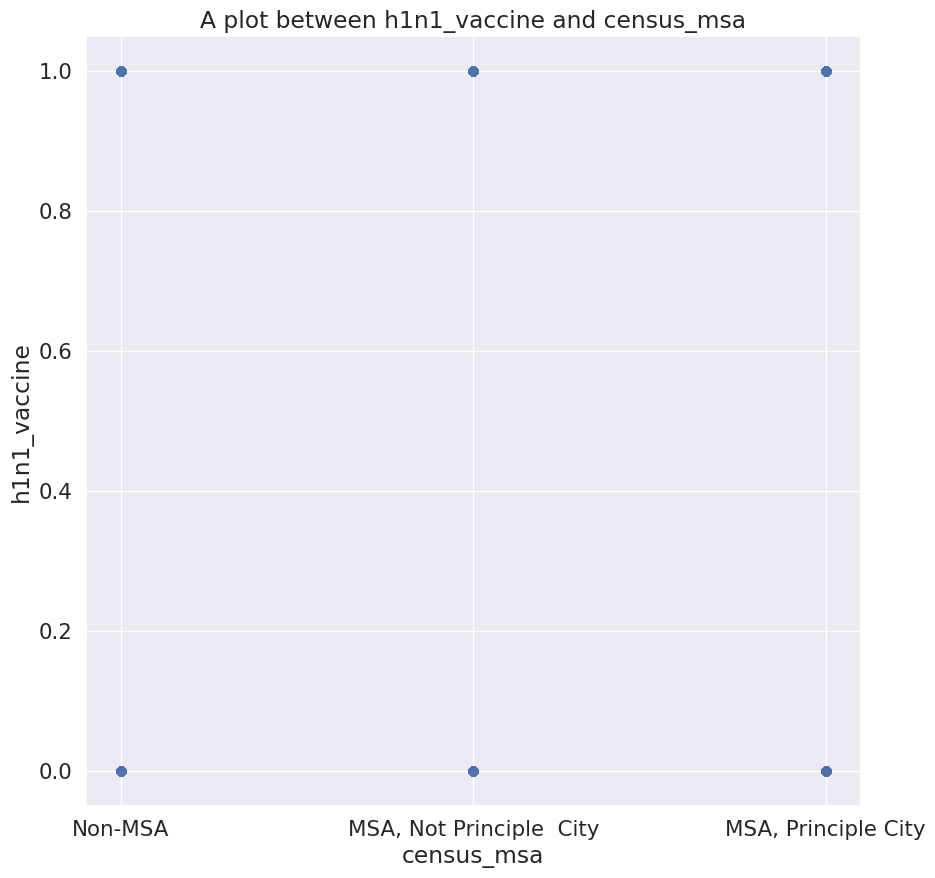

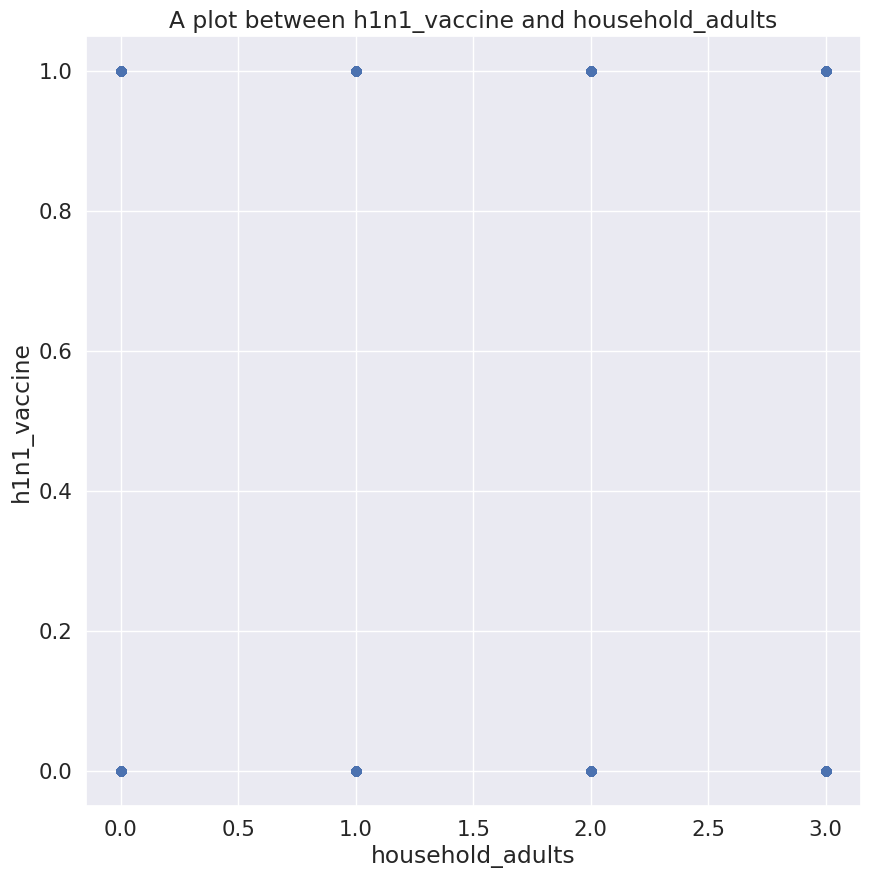

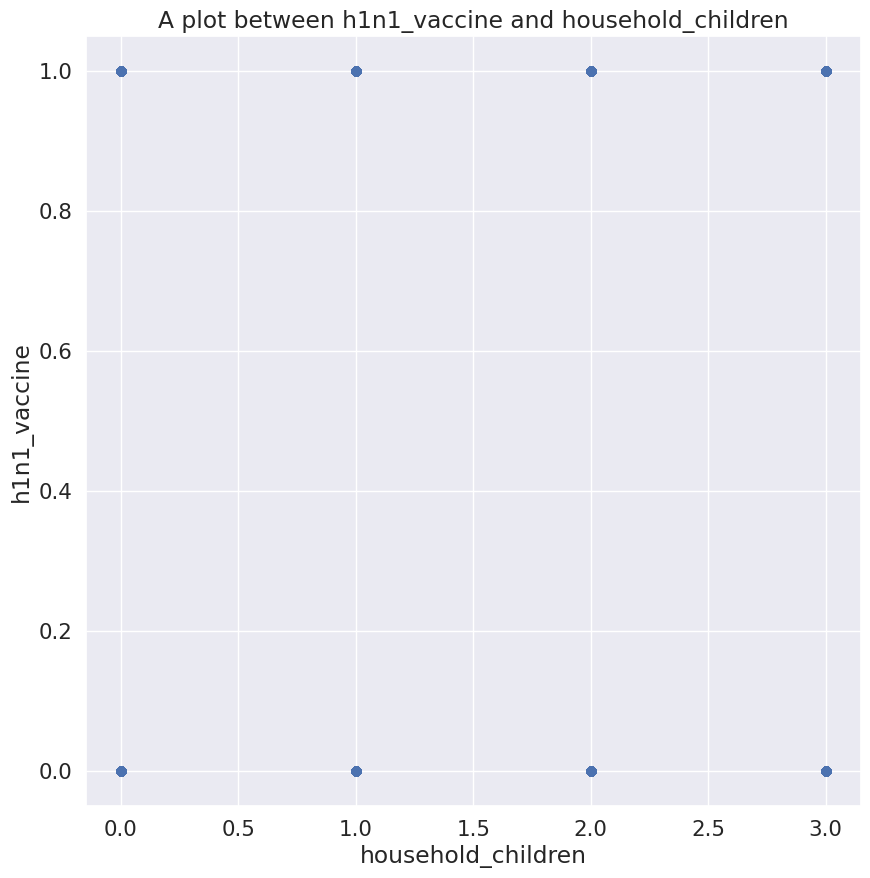

In [ ]:
for column in df.columns:
  plt.figure(figsize=(10,10))
  plt.scatter(x=df[column],y=label['h1n1_vaccine'])
  plt.xlabel(column)
  plt.ylabel("h1n1_vaccine")
  plt.title("A plot between h1n1_vaccine and " + column)
  plt.show()

<font color ='green'> From the above, we can see that our target variable and our various variables are both categorical hence it would use classification models.</font>

# **3 ) Data Preparation.**

<font color ='green'> In this stage of data analysis process, we are trying to prepare the data in order to make it suitable for modelling.</font>

# 3.1) Checking for and dealing with missing values .

## 3.1.1) Checking for missing values in the training dataset.

<font color ='green'> To check for missing values in the training dataset, we shall xcreate a function that check for the msiing values as shown below.

In [ ]:
def missing_values(the_dataframe):
  missing_values = the_dataframe.isna().sum().sort_values(ascending = False)
  return missing_values
missing_values(df)

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_adults                 249
household_children               249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_antiviral_meds         71
behavioral_wash_hands             42
behavioral_face_mask              19
age_group                          0
r

<font color ='green'> From this it is evident that our training dataset has some missing values , so in order to know how deal with this missing values. we can visualise the percentages of the missing values just to show the intensity of this .</font>

In [ ]:
def miss_in_percent(the_data):
  missing_values_2=missing_values(the_data)
  miss_in_percent = (missing_values_2/len(the_data))*100
  return miss_in_percent
miss_in_percent(df)

employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_h1n1                8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_h1n1_sick_from_vacc     1.479013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
household_adults                0.932340
household_children              0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
h1n1_knowledge                  0.434343
h1n1_concern                    0.344479
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_antiviral_meds       0.265848
behavioral_wash_

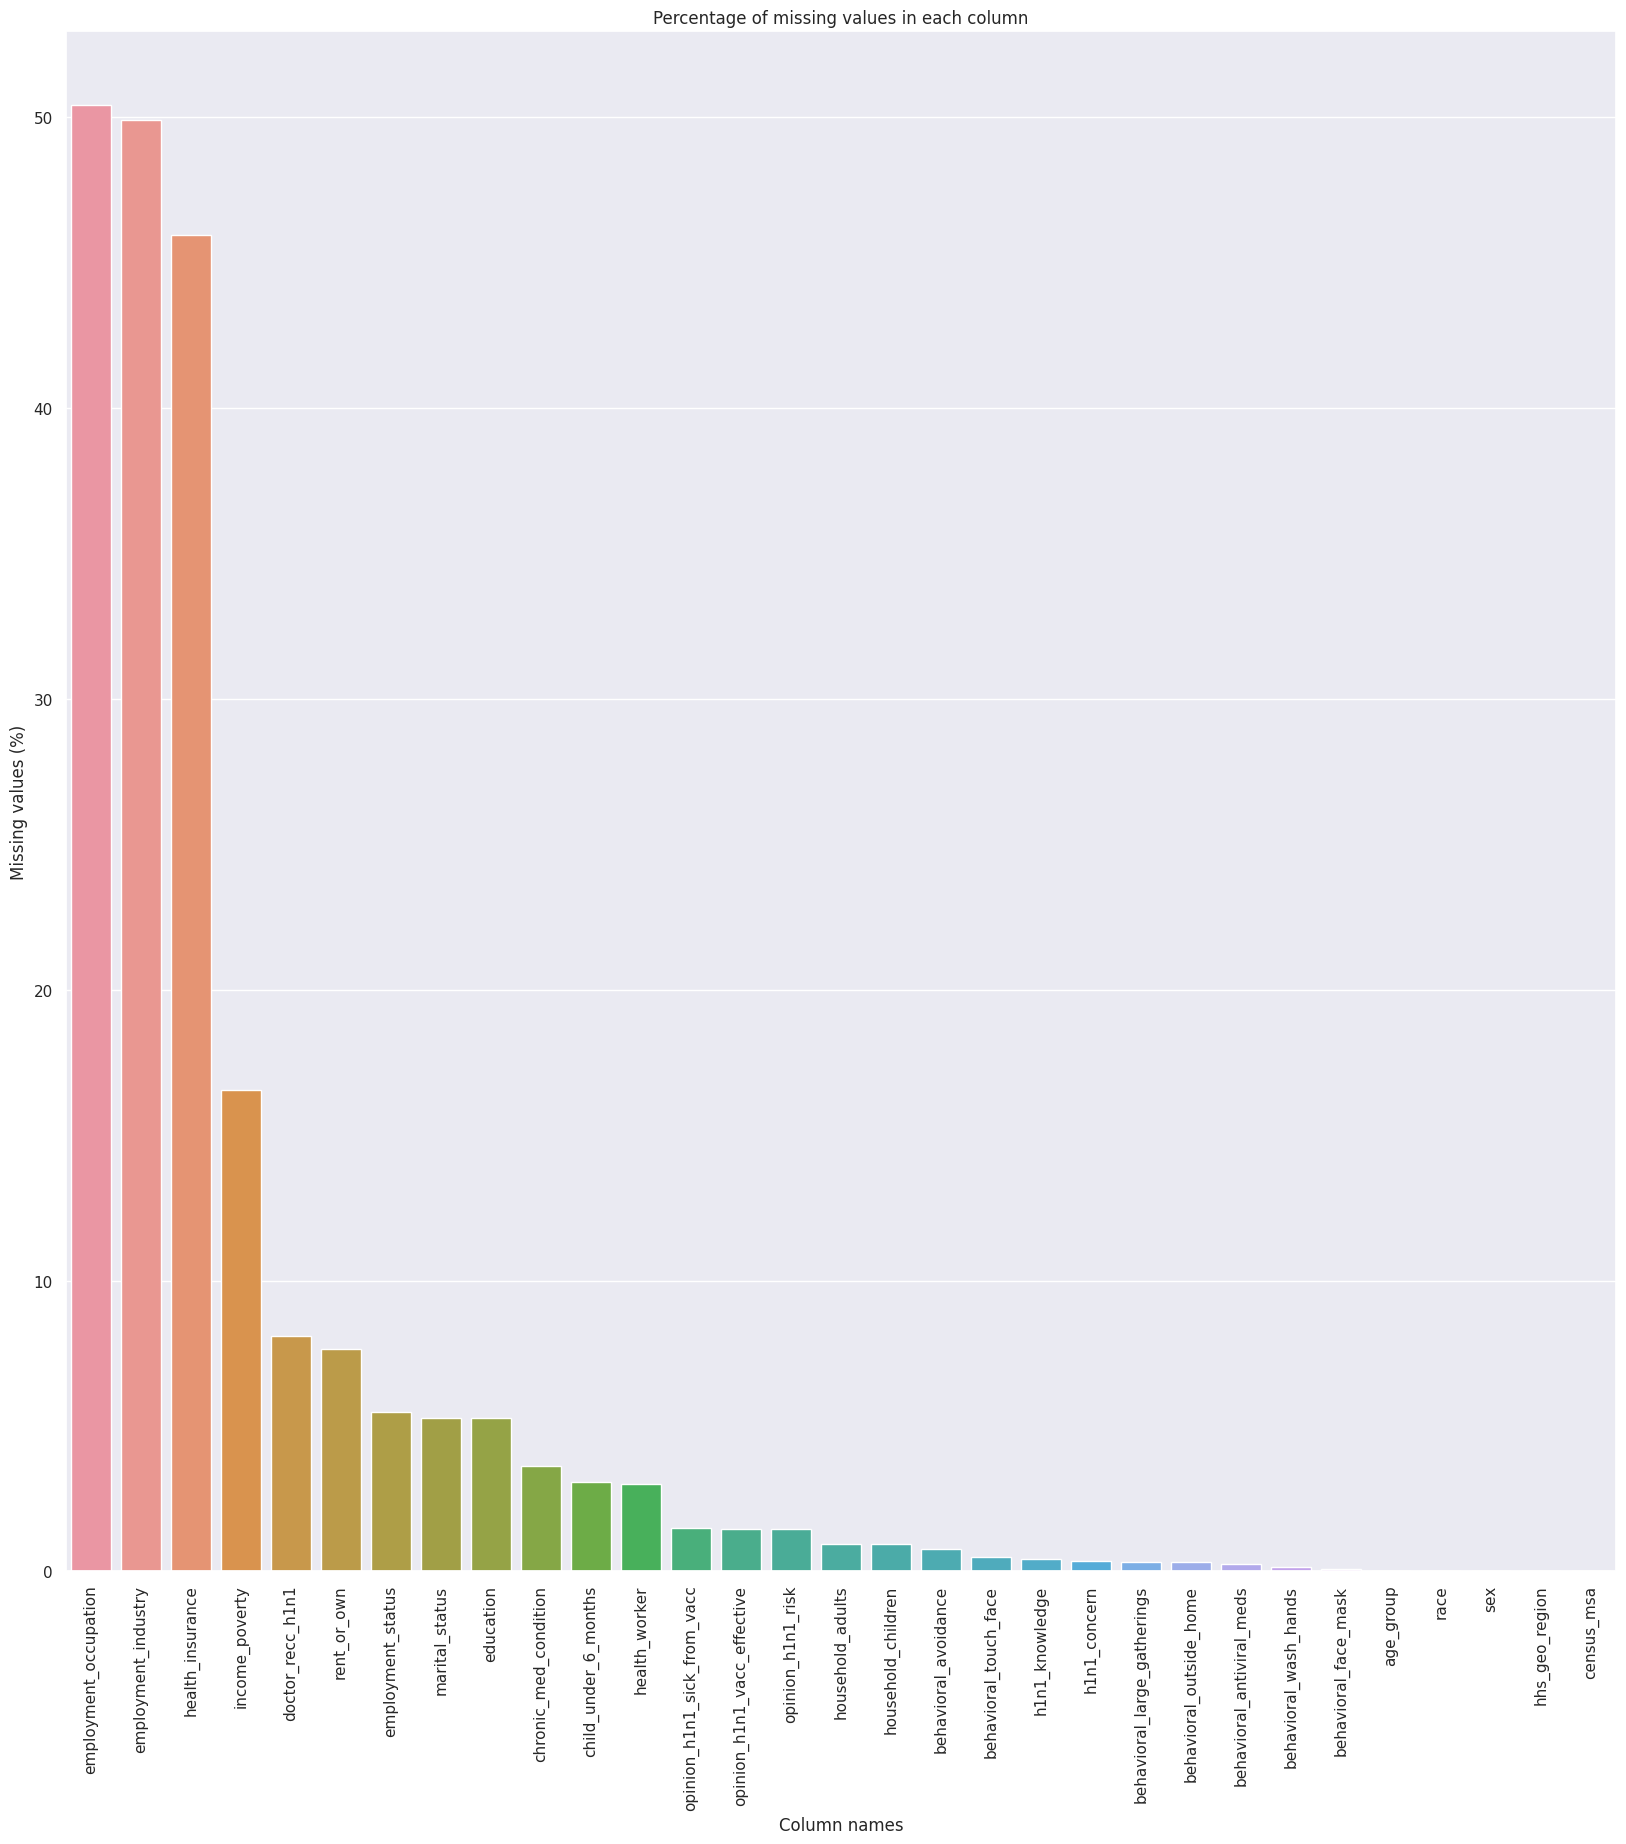

In [ ]:
def visu(dta):
  # visualizing the missing values
  x= miss_in_percent(dta)
  y= miss_in_percent(dta)
  import seaborn as sns
  # Create a bar plot of missing values
  sns.barplot(x=x.index, y=y.values)
  plt.xlabel('Column names')
  plt.ylabel('Missing values (%)')
  plt.title('Percentage of missing values in each column')
  plt.xticks(rotation=90)
  plt.show()
visu(df)

<font color ='green'>From the above plot, we can see that some variables have close to 50% of missing values,replacing this could cause a bias in our model hence , We decided to drop these columns, they include:</font>

<font color ='purple'>

*   Employment Occupation</br>
*   Employment Industry
*   Health Insuarance.</font>



In [ ]:
# dropping columns with more than 45% of missing values
df = df.drop(['employment_occupation', 'employment_industry', 'health_insurance'], axis=1 )


<font color ='green'> We also have the column income poverty ,we can do check this column further by checking its value counts.

In [ ]:
df.income_poverty.value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

<font color ='green'>From the value counts of the income poverty , we can see that our column has 3 values not factoring in the null, since this is categorical we normally fill missing values of categorical variables with the mode , we can try and investigate the mode of this column just to see what value it is

In [ ]:
df.income_poverty.mode()

0    <= $75,000, Above Poverty
Name: income_poverty, dtype: object

<font color ='green'> The mode of this value might create a bias hence we decide to transform this variable int a categorical variable encoding the following:    
</font>
<font color ='purple'>
*   '<= $75,000, Above Poverty' : 1
*   '> $75,000' : 2
*   '> $75,000' : 3
*   fill missing values with a : 4
</font>



In [ ]:
# replacing the income poverty's missing values with a new category
to_convert={ '<= $75,000, Above Poverty': 1,
            '> $75,000': 2,
            'Below Poverty': 3,
            
    
}
df.income_poverty.replace(to_convert,inplace=True)

In [ ]:
df.income_poverty.fillna(value=4,inplace=True)

<font color ='green'> For the remaining null values, we shall fill them with the mode as the variables in this dataset are all categorical.

In [ ]:
# fill all missing values for numerical columns with the mode
df = df.fillna(df.mode().iloc[0])



<font color ='green'> Now lets check if our dataset still has missing values.

In [ ]:
df.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
dtype: int64

<font color ='green'> We can see that our training dataset is now free of missing values.

## 3.1.2) Checking for missing values in the testing dataset.

In [ ]:
missing_values(test_df)

employment_occupation          13426
employment_industry            13275
health_insurance               12228
income_poverty                  4497
doctor_recc_h1n1                2160
rent_or_own                     2036
employment_status               1471
marital_status                  1442
education                       1407
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
household_children               225
household_adults                 225
behavioral_avoidance             213
behavioral_touch_face            128
h1n1_knowledge                   122
h1n1_concern                      85
behavioral_outside_home           82
behavioral_antiviral_meds         79
behavioral_large_gatherings       72
behavioral_wash_hands             40
behavioral_face_mask              19
sex                                0
r

In [ ]:
miss_in_percent(test_df)

employment_occupation          50.269582
employment_industry            49.704208
health_insurance               45.784035
income_poverty                 16.837652
doctor_recc_h1n1                8.087464
rent_or_own                     7.623184
employment_status               5.507713
marital_status                  5.399131
education                       5.268084
chronic_med_condition           3.489591
child_under_6_months            3.044032
health_worker                   2.954171
opinion_h1n1_vacc_effective     1.490190
opinion_h1n1_risk               1.422795
opinion_h1n1_sick_from_vacc     1.404074
household_children              0.842444
household_adults                0.842444
behavioral_avoidance            0.797514
behavioral_touch_face           0.479257
h1n1_knowledge                  0.456792
h1n1_concern                    0.318257
behavioral_outside_home         0.307024
behavioral_antiviral_meds       0.295792
behavioral_large_gatherings     0.269582
behavioral_wash_

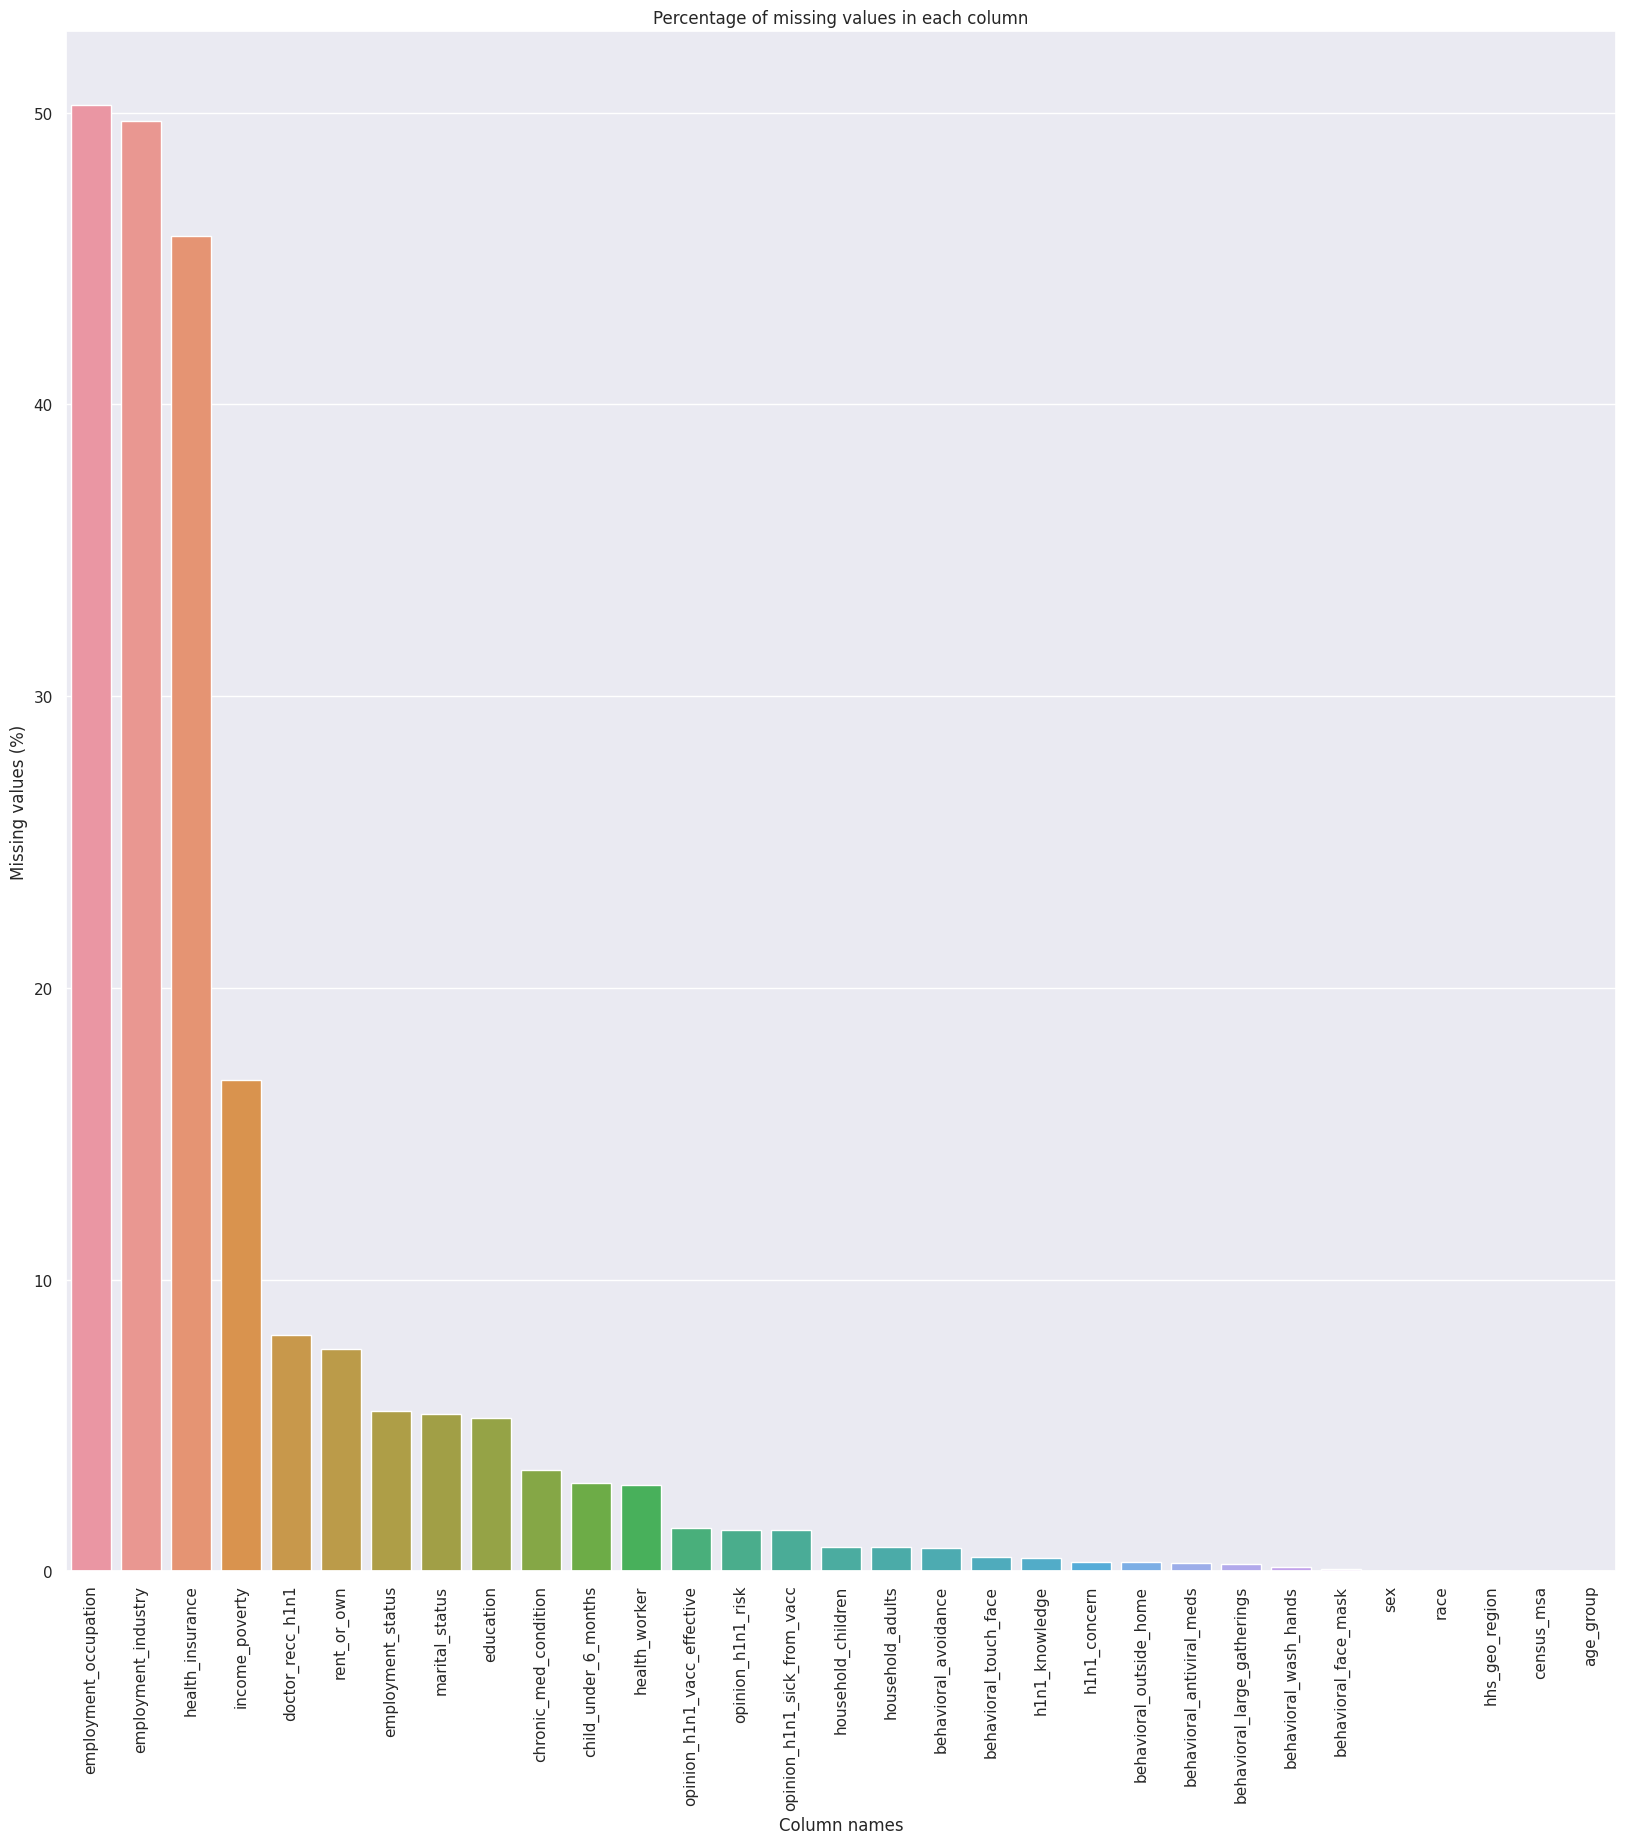

In [ ]:
visu(test_df)

<font color ='green'> Here we shall again drop the columns with missing values close to 50%

In [ ]:
# dropping columns with more than 45% of missing values
test_df = test_df.drop(['employment_occupation', 'employment_industry', 'health_insurance'], axis=1 )

<font color ='green'>We shall replace the missing avlues just like we did in the training dataset.

In [ ]:
test_df.income_poverty.replace(to_convert,inplace=True)

In [ ]:
test_df.income_poverty.fillna(value=4,inplace=True)

<font color ='green'> We shall also fill the missing values here with the mode since most of the variables are categorical just like in the training dataset.

In [ ]:
# fill all missing values for numerical columns with the mode
test_df = test_df.fillna(df.mode().iloc[0])

In [ ]:
# confirm the missing values
test_df.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
dtype: int64

<font color ='green'>We can see that now we no longer have missing values in our testing dataset.

## 3.1.3) Checking for missing values and dealing with missing values in the label dataset.

<font color ='green'> To do this we shall use the function we developed above for checking  if our dataset has missing values

In [ ]:
missing_values(label)

h1n1_vaccine    0
dtype: int64

<font color='green'>This dataset does not have missing values .

## **3.2 )Checking for duplicated values.**

<font color='green'> Here we are checking if there are duplicated values in our datasets.

In [ ]:
# check duplicates
duplicated = df.duplicated(keep= False)
df[duplicated]

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
685                     2.0             1.0                        0.0   
1467                    2.0             2.0                        0.0   
2977                    2.0             1.0                        0.0   
3252                    2.0             1.0                        0.0   
3809                    2.0             1.0                        0.0   
5479                    2.0             1.0                        0.0   
6568                    0.0             1.0                        0.0   
9064                    2.0             1.0                        0.0   
9224                    2.0             1.0                        0.0   
9650                    1.0             1.0                        0.0   
10976                   2.0             1.0                        0.0   
12658                   2.0             2.0                        0.0   
14605                   2.0             1.0                        0.0   
16411                   2.0             1.0                        0.0   
18054                   0.0             1.0                        0.0   
19744                   2.0             1.0                        0.0   
19790                   2.0             1.0                        0.0   
20151                   1.0             1.0                        0.0   
22753                   2.0             1.0                        0.0   
22791                   2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
685                             0.0                   0.0   
1467                            1.0                   0.0   
2977                            1.0                   0.0   
3252                            1.0                   0.0   
3809                            1.0                   0.0   
5479                            1.0                   0.0   
6568                            0.0                   0.0   
9064                            1.0                   0.0   
9224                            1.0                   0.0   
9650                            1.0                   0.0   
10976                           1.0                   0.0   
12658                           1.0                   0.0   
14605                           1.0                   0.0   
16411                           1.0                   0.0   
18054                           0.0                   0.0   
19744                           0.0                   0.0   
19790                           1.0                   0.0   
20151                           1.0                   0.0   
22753                           1.0                   0.0   
22791                           1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
685                              1.0                          0.0   
1467                             1.0                          0.0   
2977                             1.0                          1.0   
3252                             1.0                          0.0   
3809                             1.0                          0.0   
5479                             1.0                          1.0   
6568                             0.0                          0.0   
9064                             1.0                          0.0   
9224                             1.0                          0.0   
9650                             1.0                          0.0   
10976                            1.0                          1.0   
12658                            1.0                          0.0   
14605                            1.0                          0.0   
16411   

<font color='green'> From the above, we can see that columns have similar values , but this is not really a problem as they have different ids.Lets check the test dataset if this is the same case.

In [ ]:
duplicated_test = test_df.duplicated(keep= False)
test_df[duplicated_test]

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
30540                   2.0             1.0                        0.0   
31540                   2.0             1.0                        0.0   
34047                   2.0             1.0                        0.0   
38186                   1.0             2.0                        0.0   
38892                   2.0             1.0                        0.0   
39385                   0.0             1.0                        0.0   
44486                   1.0             2.0                        0.0   
44625                   0.0             1.0                        0.0   
45968                   2.0             1.0                        0.0   
48760                   2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
30540                           1.0                   0.0   
31540                           1.0                   0.0   
34047                           1.0                   0.0   
38186                           1.0                   0.0   
38892                           1.0                   0.0   
39385                           1.0                   0.0   
44486                           1.0                   0.0   
44625                           1.0                   0.0   
45968                           1.0                   0.0   
48760                           1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
30540                            1.0                          0.0   
31540                            1.0                          0.0   
34047                            1.0                          0.0   
38186                            1.0                          0.0   
38892                            1.0                          1.0   
39385                            1.0                          0.0   
44486                            1.0                          0.0   
44625                            1.0                          0.0   
45968                            1.0                          0.0   
48760                            1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
30540                              0.0                    1.0   
31540                              0.0                    1.0   
34047                              0.0                    1.0   
38186                              0.0                    1.0   
38892                              1.0                    1.0   
39385                              0.0                    1.0   
44486                              0.0                    1.0   
44625                              0.0                    1.0   
45968                              0.0                    1.0   
48760                              1.0                    1.0   

               doctor_recc_h1n1  ...   race     sex  income_poverty  \
respondent_id                    ...                                  
30540                       0.0  ...  White  Female             1.0   
31540                       0.0  ...  White  Female             1.0   
34047                       0.0  ...  White  Female             1.0   
38186                       0.0  ...  White    Male             2.0   
38892                       0.0  ...  White  Female             1.0   
39385                       0.0  ...  White    Male             2.0   
44486                       0.0  ...  White    Male             2.0   
44625                       0.0  ...  White    Male             2.0   
45968                       0.0  ...  White  Female             1.0   
48

<font color='green'>Here in the testing dataset, there are some duplicated values also , but just like in the training dataset, they all have different id's.

# **3.3 ) Checking for multicollinearity**

<font color='green'> Multicollinearity in lay mans language is when you can use one variable to predict another, this can create problems for our model hence it is best if we do away with it if it is there. Lets go ahead and check if our dataset has multicollinearity.A simple way is to plot a heatmap or making a correlation matrix.</br>
Lets go a head and make a correlation dataframe as shown below. 

In [ ]:
# Checking for multicolinearity
corr=df.corr(method='pearson')
corr


h1n1_concern  h1n1_knowledge  \
h1n1_concern                     1.000000        0.060828   
h1n1_knowledge                   0.060828        1.000000   
behavioral_antiviral_meds        0.089866       -0.010450   
behavioral_avoidance             0.229648        0.087194   
behavioral_face_mask             0.155757        0.029888   
behavioral_wash_hands            0.291670        0.089690   
behavioral_large_gatherings      0.254133       -0.047293   
behavioral_outside_home          0.245404       -0.066479   
behavioral_touch_face            0.245038        0.084633   
doctor_recc_h1n1                 0.136957        0.094135   
chronic_med_condition            0.092249       -0.011653   
child_under_6_months             0.048400        0.025971   
health_worker                    0.032734        0.171516   
opinion_h1n1_vacc_effective      0.235841        0.119010   
opinion_h1n1_risk                0.372716        0.074394   
opinion_h1n1_sick_from_vacc      0.355637       -0.017038   
income_poverty                   0.026076       -0.118782   
household_adults                -0.016079        0.023866   
household_children               0.049441        0.053378   

                             behavioral_antiviral_meds  behavioral_avoidance  \
h1n1_concern                                  0.089866              0.229648   
h1n1_knowledge                               -0.010450              0.087194   
behavioral_antiviral_meds                     1.000000              0.048533   
behavioral_avoidance                          0.048533              1.000000   
behavioral_face_mask                          0.145772              0.064155   
behavioral_wash_hands                         0.063996              0.334974   
behavioral_large_gatherings                   0.106314              0.225402   
behavioral_outside_home                       0.127204              0.217599   
behavioral_touch_face                         0.069982              0.329796   
doctor_recc_h1n1                              0.050882              0.065589   
chronic_med_condition                         0.004637              0.042054   
child_under_6_months                          0.026183              0.000952   
health_worker                                 0.007145              0.002232   
opinion_h1n1_vacc_effective                   0.030172              0.109066   
opinion_h1n1_risk                             0.102553              0.116259   
opinion_h1n1_sick_from_vacc                   0.076930              0.129983   
income_poverty                                0.044071             -0.043287   
household_adults                              0.044829              0.017995   
household_children                            0.083090              0.038977   

                             behavioral_face_mask  behavioral_wash_hands  \
h1n1_concern                             0.155757               0.291670   
h1n1_knowledge                           0.029888               0.089690   
behavioral_antiviral_meds                0.145772               0.063996   
behavioral_avoidance                     0.064155               0.334974   
behavioral_face_mask                     1.000000               0.083229   
behavioral_wash_hands                    0.083229               1.000000   
behavioral_large_gatherings              0.180377               0.194750   
behavioral_outside_home                  0.162964               0.191804   
behavioral_touch_face                    0.103603               0.362979   
doctor_recc_h1n1                         0.079887               0.086392   
chronic_med_condition                    0.062200               0.030205   
child_under_6_months                     0.036828               0.035749   
health_worker                            0.065645               0.052930   
opinion_h1n1_vacc_effective              0.037679               0.134815   
opinion_h1n1_risk                        0.128316               0.1

<font color='green'> This can be hard to interpret , so lets go ahead and put this in visuals as show below.

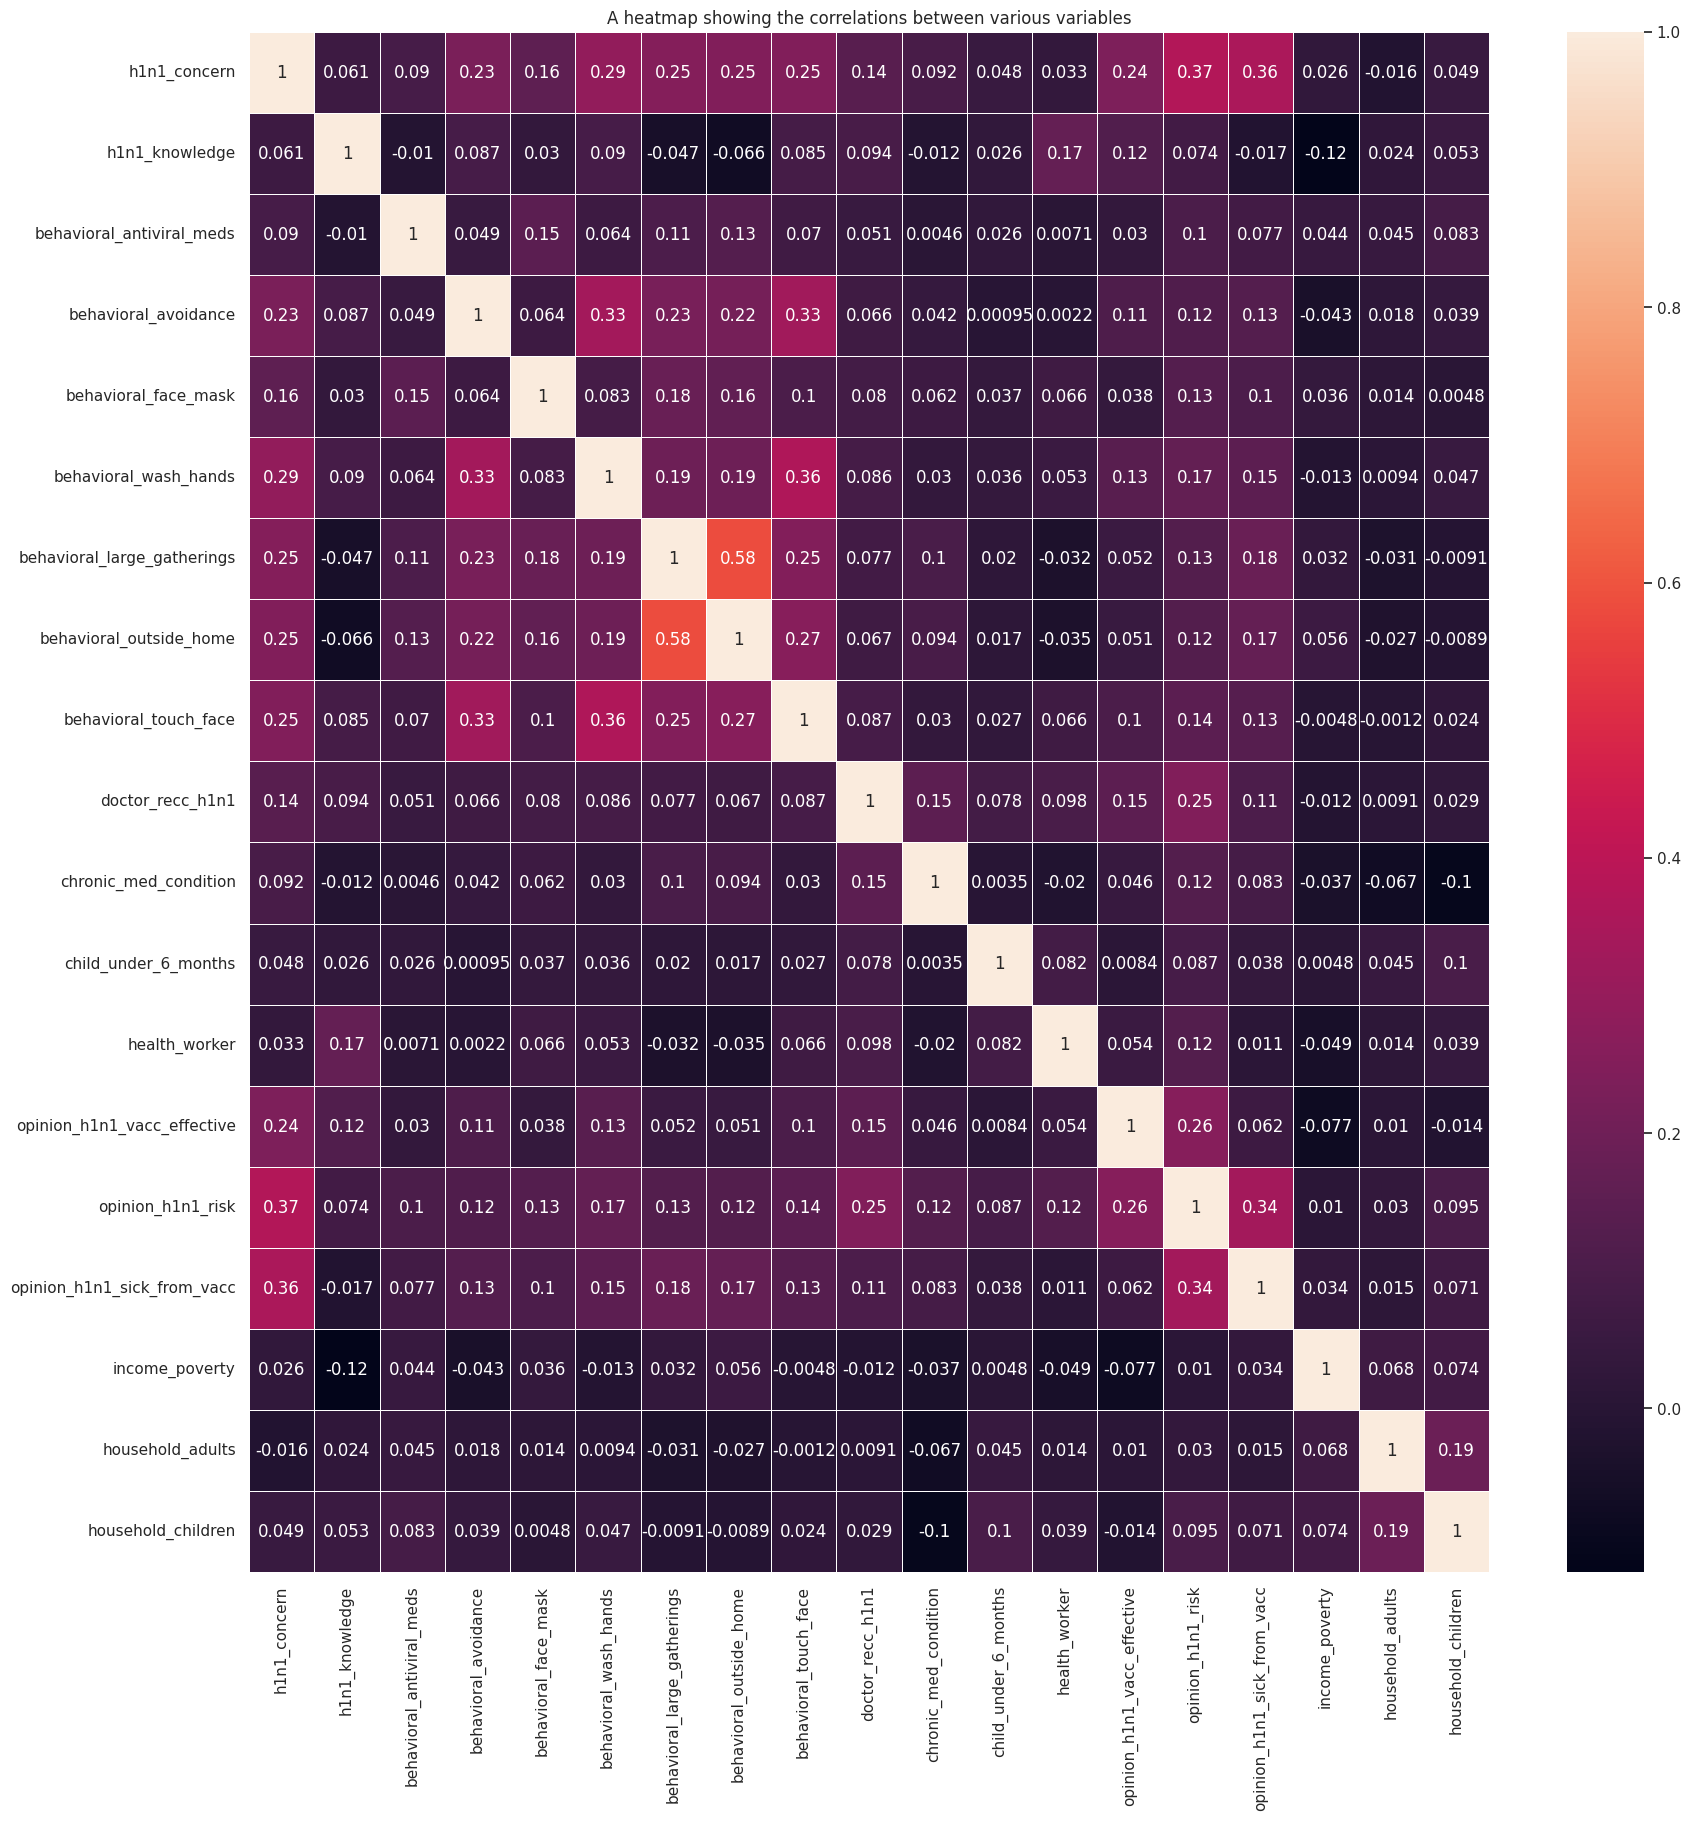

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(corr,linewidth=.5,annot=True)
plt.title('A heatmap showing the correlations between various variables')
plt.show();

<font color='green'> From the above , the highest correlation is 0.58, which is not really a case of multicollinearity, we can make an assumption that there is no multicollinearity in this dataset but to be safe lets go some steps further and confirm this.We start off by making a dataframe with correlations of columns.

In [ ]:
df_3=df.corr().abs().stack().reset_index().sort_values(0,ascending=False)
df_3

level_0                level_1         0
0             h1n1_concern           h1n1_concern  1.000000
200  chronic_med_condition  chronic_med_condition  1.000000
60    behavioral_avoidance   behavioral_avoidance  1.000000
80    behavioral_face_mask   behavioral_face_mask  1.000000
100  behavioral_wash_hands  behavioral_wash_hands  1.000000
..                     ...                    ...       ...
231          health_worker   behavioral_avoidance  0.002232
169  behavioral_touch_face       household_adults  0.001233
331       household_adults  behavioral_touch_face  0.001233
68    behavioral_avoidance   child_under_6_months  0.000952
212   child_under_6_months   behavioral_avoidance  0.000952

[361 rows x 3 columns]

<font color='green'> This can be hard to understand, so lets go ahead and create a dataframe with pairs of the correlating variables and thier correlation

In [ ]:
df_3['pairs']=list(zip(df_3.level_0,df_3.level_1))
df_3.set_index(['pairs'],inplace=True)
df_3.drop(columns=['level_1','level_0'],inplace=True)
df_3.rename(columns={0:'Correlation'},inplace=True)
df_3

Correlation
pairs                                                      
(h1n1_concern, h1n1_concern)                       1.000000
(chronic_med_condition, chronic_med_condition)     1.000000
(behavioral_avoidance, behavioral_avoidance)       1.000000
(behavioral_face_mask, behavioral_face_mask)       1.000000
(behavioral_wash_hands, behavioral_wash_hands)     1.000000
...                                                     ...
(health_worker, behavioral_avoidance)              0.002232
(behavioral_touch_face, household_adults)          0.001233
(household_adults, behavioral_touch_face)          0.001233
(behavioral_avoidance, child_under_6_months)       0.000952
(child_under_6_months, behavioral_avoidance)       0.000952

[361 rows x 1 columns]

<font color ='green'> We can see that there are some duplicates in the dataframe, lets go ahead and drop those duplicates.

In [ ]:
# drop duplicated
df_3.drop_duplicates(inplace=True)

<font color ='green'> In order to confirm fully that there is no multicollinearity, we create a threshhold, when the collinarity is greater than 0.75 but less than 1 , then there is multicollinearity.

In [ ]:
# threshhold
#Creating a threshhold to remove too low or too high correlations.
df_3[(df_3.Correlation>.75)&(df_3.Correlation<1.0)]

Empty DataFrame
Columns: [Correlation]
Index: []

<font color ='green'> The above dataframe proves our point showing that there is no multicollinearity between columns in our training dataset.

## 3.3.2) Checking for multicollinearity in the testing dataset.

<font color ='green'>  For the testing dataset , we will only check the heatmap and see if there is mulricollinearity of columns ,if it indicates multicollinearity, we shall go steps further to find which columns have multicollinearity else we shall leave it at that.

In [ ]:
# Checking for multicolinearity
corr2=test_df.corr(method='pearson')
corr2

h1n1_concern  h1n1_knowledge  \
h1n1_concern                     1.000000        0.066711   
h1n1_knowledge                   0.066711        1.000000   
behavioral_antiviral_meds        0.099682       -0.005366   
behavioral_avoidance             0.215996        0.079638   
behavioral_face_mask             0.141452        0.016164   
behavioral_wash_hands            0.282056        0.081758   
behavioral_large_gatherings      0.258965       -0.051667   
behavioral_outside_home          0.245367       -0.065769   
behavioral_touch_face            0.239238        0.079268   
doctor_recc_h1n1                 0.124075        0.109266   
chronic_med_condition            0.100909       -0.010061   
child_under_6_months             0.039683        0.025551   
health_worker                    0.026557        0.163723   
opinion_h1n1_vacc_effective      0.215807        0.123041   
opinion_h1n1_risk                0.358917        0.090513   
opinion_h1n1_sick_from_vacc      0.350709       -0.003736   
income_poverty                   0.022591       -0.115619   
household_adults                -0.000191        0.035635   
household_children               0.050306        0.063880   

                             behavioral_antiviral_meds  behavioral_avoidance  \
h1n1_concern                                  0.099682              0.215996   
h1n1_knowledge                               -0.005366              0.079638   
behavioral_antiviral_meds                     1.000000              0.058986   
behavioral_avoidance                          0.058986              1.000000   
behavioral_face_mask                          0.154008              0.069803   
behavioral_wash_hands                         0.067702              0.319721   
behavioral_large_gatherings                   0.116327              0.226712   
behavioral_outside_home                       0.133940              0.228285   
behavioral_touch_face                         0.080316              0.329776   
doctor_recc_h1n1                              0.058377              0.068543   
chronic_med_condition                         0.007934              0.036644   
child_under_6_months                          0.018309             -0.000279   
health_worker                                 0.016643             -0.008801   
opinion_h1n1_vacc_effective                   0.039927              0.106506   
opinion_h1n1_risk                             0.106678              0.117983   
opinion_h1n1_sick_from_vacc                   0.091004              0.126023   
income_poverty                                0.045585             -0.031107   
household_adults                              0.044710              0.024279   
household_children                            0.091496              0.046133   

                             behavioral_face_mask  behavioral_wash_hands  \
h1n1_concern                             0.141452               0.282056   
h1n1_knowledge                           0.016164               0.081758   
behavioral_antiviral_meds                0.154008               0.067702   
behavioral_avoidance                     0.069803               0.319721   
behavioral_face_mask                     1.000000               0.085307   
behavioral_wash_hands                    0.085307               1.000000   
behavioral_large_gatherings              0.155737               0.188699   
behavioral_outside_home                  0.160918               0.191706   
behavioral_touch_face                    0.103205               0.364842   
doctor_recc_h1n1                         0.072968               0.082855   
chronic_med_condition                    0.057559               0.030004   
child_under_6_months                     0.035832               0.032881   
health_worker                            0.063590               0.043866   
opinion_h1n1_vacc_effective              0.037165               0.129465   
opinion_h1n1_risk                        0.126567               0.1

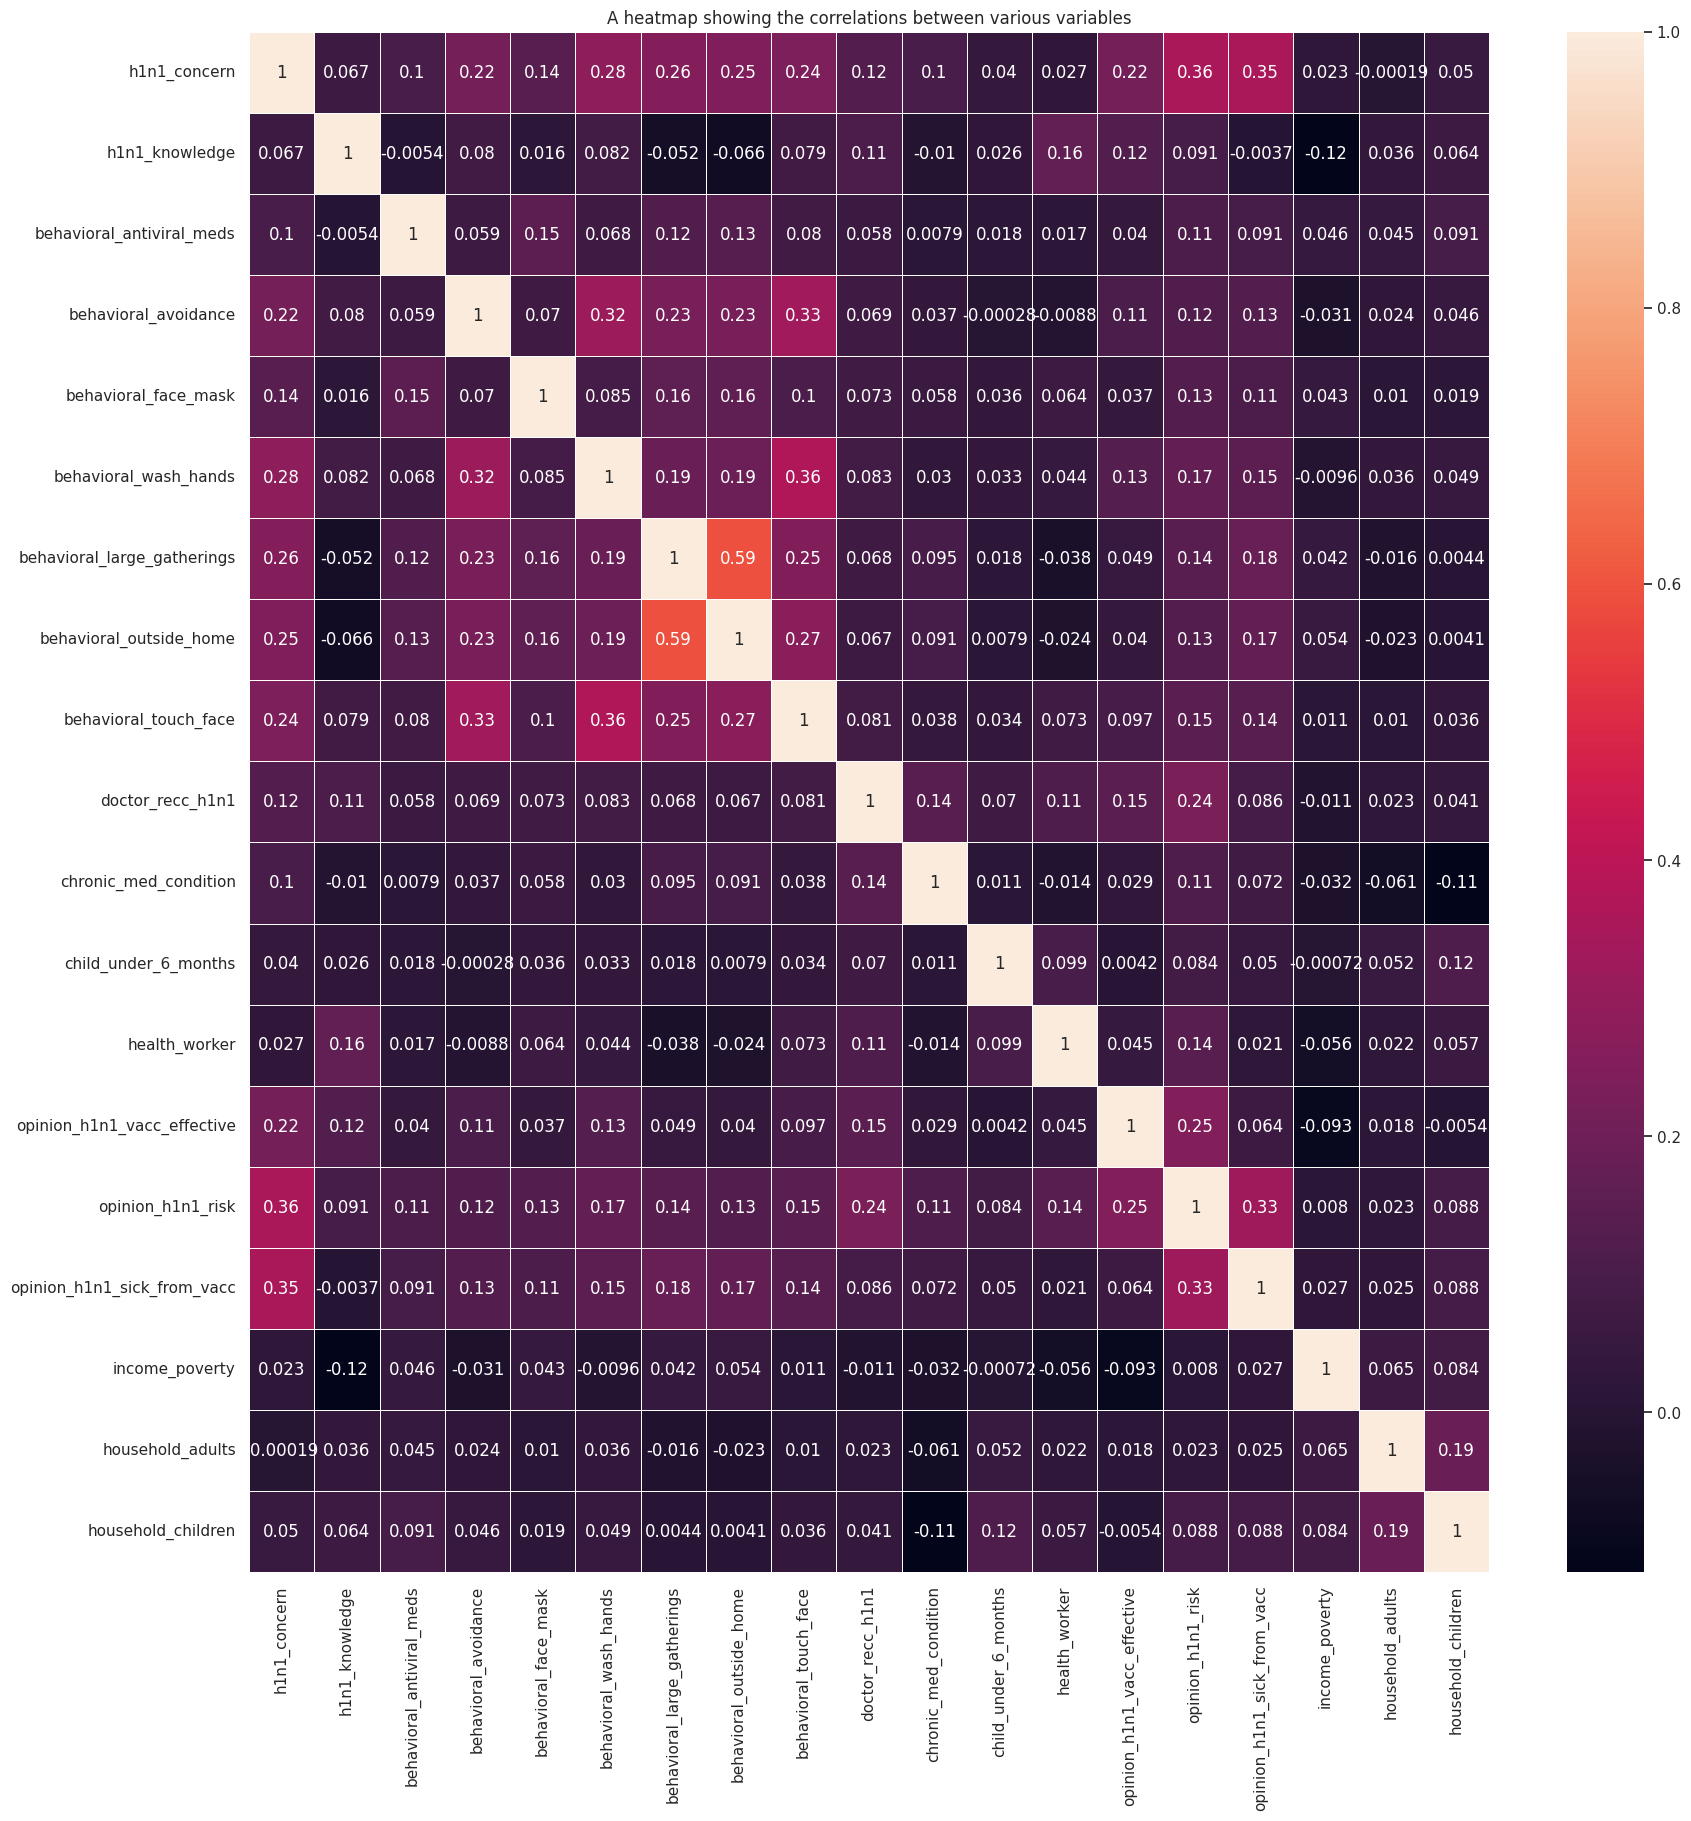

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(corr2,linewidth=.5,annot=True)
plt.title('A heatmap showing the correlations between various variables')
plt.show();

<font color ='green'> From our haetmap, we can see that the highest form of collinearity between unlike columns is **0.59** ,  this shows that there is really no multicollinearity between columns as the correlation is not that high.

# **3.4)Data Encoding (Conversion of categorical data to numeric format.)**

<font color ='green'> For us to be able to fit our data into a model, the data needs to be in a format that is good for modelling and makes our modell perform in the most accurate way possible, to do this we have to transform our categorical data either by : </font>

<font color ='purple'> 
*   Label encoding
*   One hot encoding 
</font>


<font color ='green'> We had already got a list of our categorical columns , but remember that we dropped some columns either due to missing values or the fact that they are not needed hence we also need to remove them from our list of categorical columns for avoidance of errors, this columns include:<font>

<font color ='purple'> 
*   employment status
*   employment occupation 
*   employment industry
</font>



In [ ]:
cat_columns=list(cat_columns)
type(cat_columns)

list

In [ ]:
to_remove=['employment_industry','employment_status','employment_occupation']
for cols in to_remove :
  cat_columns.remove(cols)

<font color='green'> Now that we have removed the columns, we can go ahead and encode our data, first we will label encode our data to convert it to numerical from.

## 3.4.1) Perfroming label encoding on our training and testing data.

<font color='green'> Here we are trying to convert the non-numerical data into numerical format, we shall create a function to do this for us and get an encoded dataframe .

<font color='purple'>

**1.   Labal encoding on training dataset.** </font>






In [ ]:
def label_encoder(to_encode):
  from sklearn.preprocessing import LabelEncoder

  # Create an instance of LabelEncoder
  le = LabelEncoder()

  # Loop over each categorical column and apply LabelEncoder
  for col in cat_columns:
    to_encode[col] = le.fit_transform(to_encode[col])
    return to_encode
label_encoder(df)

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   
...                     ...             ...                        ...   
26702                   2.0             0.0                        0.0   
26703                   1.0             2.0                        0.0   
26704                   2.0             2.0                        0.0   
26705                   1.0             1.0                        0.0   
26706                   0.0             0.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   
...                             ...                   ...   
26702                           1.0                   0.0   
26703                           1.0                   0.0   
26704                           1.0                   1.0   
26705                           0.0                   0.0   
26706                           1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   
...                              ...                          ...   
26702                            0.0                          0.0   
26703                            1.0                          0.0   
26704                            1.0                          1.0   
26705                            0.0                          0.0   
26706                            0.0                          0.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   
...                                ...                    ...   
26702                              1.0                    0.0   
26703                              0.0                    0.0   
26704                              0.0                    1.0   
26705                              0.0                    1.0   
26706                              0.0                    0.0   

               doctor_recc_h1n1  ...      race     sex  income_poverty  \
respondent_id                    ...                                     
0                           0.0  ...     White  Female             3.0   
1                           0.0  ...     White    Male             3.0   
2                           0.0  ...     White    Male             1.0   
3                           0.0  ...     White  Female             3.0   
4                           0.0  ...     White  Female             1.0

<font color='purple'>

**2.)  Label encoding on the testing dataset.**</font>



In [ ]:
label_encoder(test_df)

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
26707                   2.0             2.0                        0.0   
26708                   1.0             1.0                        0.0   
26709                   2.0             2.0                        0.0   
26710                   1.0             1.0                        0.0   
26711                   3.0             1.0                        1.0   
...                     ...             ...                        ...   
53410                   1.0             1.0                        0.0   
53411                   3.0             1.0                        0.0   
53412                   0.0             1.0                        0.0   
53413                   3.0             1.0                        0.0   
53414                   2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
26707                           1.0                   0.0   
26708                           0.0                   0.0   
26709                           0.0                   1.0   
26710                           0.0                   0.0   
26711                           1.0                   0.0   
...                             ...                   ...   
53410                           1.0                   0.0   
53411                           1.0                   0.0   
53412                           0.0                   0.0   
53413                           1.0                   0.0   
53414                           0.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
26707                            1.0                          1.0   
26708                            0.0                          0.0   
26709                            1.0                          1.0   
26710                            0.0                          0.0   
26711                            1.0                          1.0   
...                              ...                          ...   
53410                            1.0                          0.0   
53411                            1.0                          1.0   
53412                            0.0                          0.0   
53413                            1.0                          0.0   
53414                            1.0                          0.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
26707                              0.0                    1.0   
26708                              0.0                    0.0   
26709                              1.0                    1.0   
26710                              0.0                    0.0   
26711                              1.0                    1.0   
...                                ...                    ...   
53410                              0.0                    1.0   
53411                              1.0                    1.0   
53412                              0.0                    0.0   
53413                              1.0                    0.0   
53414                              0.0                    1.0   

               doctor_recc_h1n1  ...      race     sex  income_poverty  \
respondent_id                    ...                                     
26707                       0.0  ...  Hispanic  Female             2.0   
26708                       0.0  ...     White    Male             3.0   
26709                       0.0  ...     White    Male             2.0   
26710                       1.0  ...     White  Female             1.0   
26711                       0.0  ...     Black  Female             1.0

<font color ='green'> We can now perform one hot encoding on our dataset.

## 3.4.2) Performing one-hot encoding on our datasets.

<font color ='green'> Here we seek to make our dataset in a format that is good for our model.

**<font color='purple'>
1.)   One-hot encoding our training dataset.</font>**



In [ ]:
def one_hot_encode(data_frame):
  from sklearn.preprocessing import OneHotEncoder

  ohe = OneHotEncoder()
  # fit and transform the categorical variables
  ohe.fit_transform(data_frame)
  X_train_ohe = ohe.transform(data_frame).toarray()
  ohe_df_2= pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(data_frame.columns))

  ohe_df_2.head()
  return ohe_df_2
ohe_df=one_hot_encode(df)
ohe_df

h1n1_concern_0.0  h1n1_concern_1.0  h1n1_concern_2.0  h1n1_concern_3.0  \
0                   0.0               1.0               0.0               0.0   
1                   0.0               0.0               0.0               1.0   
2                   0.0               1.0               0.0               0.0   
3                   0.0               1.0               0.0               0.0   
4                   0.0               0.0               1.0               0.0   
...                 ...               ...               ...               ...   
26702               0.0               0.0               1.0               0.0   
26703               0.0               1.0               0.0               0.0   
26704               0.0               0.0               1.0               0.0   
26705               0.0               1.0               0.0               0.0   
26706               1.0               0.0               0.0               0.0   

       h1n1_knowledge_0.0  h1n1_knowledge_1.0  h1n1_knowledge_2.0  \
0                     1.0                 0.0                 0.0   
1                     0.0                 0.0                 1.0   
2                     0.0                 1.0                 0.0   
3                     0.0                 1.0                 0.0   
4                     0.0                 1.0                 0.0   
...                   ...                 ...                 ...   
26702                 1.0                 0.0                 0.0   
26703                 0.0                 0.0                 1.0   
26704                 0.0                 0.0                 1.0   
26705                 0.0                 1.0                 0.0   
26706                 1.0                 0.0                 0.0   

       behavioral_antiviral_meds_0.0  behavioral_antiviral_meds_1.0  \
0                                1.0                            0.0   
1                                1.0                            0.0   
2                                1.0                            0.0   
3                                1.0                            0.0   
4                                1.0                            0.0   
...                              ...                            ...   
26702                            1.0                            0.0   
26703                            1.0                            0.0   
26704                            1.0                            0.0   
26705                            1.0                            0.0   
26706                            1.0                            0.0   

       behavioral_avoidance_0.0  ...  census_msa_MSA, Principle City  \
0                           1.0  ...                             0.0   
1                           0.0  ...                             0.0   
2                           0.0  ...                             0.0   
3                           0.0  ...                             1.0   
4                           0.0  ...                             0.0   
...                         ...  ...                             ...   
26702                       0.0  ...                             0.0   
26703                       0.0  ...                             1.0   
26704                       0.0  ...                             0.0   
26705                       1.0  ...                             0.0   
26706                       0.0  ...                             1.0   

       census_msa_Non-MSA  household_adults_0.0  household_adults_1.0  \
0                     1.0                   1.0                   0.0   
1                     0.0                   1.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   1.0                   0.0   
4                     0.0                   0.0                   1.0   
...                   ...                   ...  

**<font color='purple'>
2.) One-hot encoding the testing dataset
</font>**

In [ ]:
test_df_ohe=one_hot_encode(test_df)
test_df_ohe

h1n1_concern_0.0  h1n1_concern_1.0  h1n1_concern_2.0  h1n1_concern_3.0  \
0                   0.0               0.0               1.0               0.0   
1                   0.0               1.0               0.0               0.0   
2                   0.0               0.0               1.0               0.0   
3                   0.0               1.0               0.0               0.0   
4                   0.0               0.0               0.0               1.0   
...                 ...               ...               ...               ...   
26703               0.0               1.0               0.0               0.0   
26704               0.0               0.0               0.0               1.0   
26705               1.0               0.0               0.0               0.0   
26706               0.0               0.0               0.0               1.0   
26707               0.0               0.0               1.0               0.0   

       h1n1_knowledge_0.0  h1n1_knowledge_1.0  h1n1_knowledge_2.0  \
0                     0.0                 0.0                 1.0   
1                     0.0                 1.0                 0.0   
2                     0.0                 0.0                 1.0   
3                     0.0                 1.0                 0.0   
4                     0.0                 1.0                 0.0   
...                   ...                 ...                 ...   
26703                 0.0                 1.0                 0.0   
26704                 0.0                 1.0                 0.0   
26705                 0.0                 1.0                 0.0   
26706                 0.0                 1.0                 0.0   
26707                 0.0                 1.0                 0.0   

       behavioral_antiviral_meds_0.0  behavioral_antiviral_meds_1.0  \
0                                1.0                            0.0   
1                                1.0                            0.0   
2                                1.0                            0.0   
3                                1.0                            0.0   
4                                0.0                            1.0   
...                              ...                            ...   
26703                            1.0                            0.0   
26704                            1.0                            0.0   
26705                            1.0                            0.0   
26706                            1.0                            0.0   
26707                            1.0                            0.0   

       behavioral_avoidance_0.0  ...  census_msa_MSA, Principle City  \
0                           0.0  ...                             0.0   
1                           1.0  ...                             0.0   
2                           1.0  ...                             0.0   
3                           1.0  ...                             0.0   
4                           0.0  ...                             0.0   
...                         ...  ...                             ...   
26703                       0.0  ...                             1.0   
26704                       0.0  ...                             0.0   
26705                       1.0  ...                             0.0   
26706                       0.0  ...                             0.0   
26707                       1.0  ...                             1.0   

       census_msa_Non-MSA  household_adults_0.0  household_adults_1.0  \
0                     0.0                   0.0                   1.0   
1                     1.0                   0.0                   0.0   
2                     1.0                   0.0                   1.0   
3                     0.0                   0.0                   1.0   
4                     1.0                   1.0                   0.0   
...                   ...                   ...  

# **4 ) Modelling**

<font color='green'> Now we are at our main agenda which is modelling.Our main goal of the project is to build different models and see the one that performs the best then recommend that model.</br>
In this lab we have shall use the following models:

<font color='purple'>
1.   Logistic Regression</br>
2.   Decision trees</br>
3.   Random Forest Model.</font>

It should be noted that all of this models are classication models, this is because our data has a label that has two classes.</font>


# 4.1) Logistic Regression.

<font color='green'> This sounds like it is only used for regression but trust me , it can be used for both regression and classification ,mostly when your label is in binary form (ie 0's ans 1's).</br>
Lets start of by first getting our variables. Here we shall define our variables as follows.</br>

<font color='purple'>
1.   y : Our target variable which is the h1n1 vaccine available in the 
     label dataset.<br>
2.   X : This are our features meaning this are all the features in the   training or testing dataset.



In [ ]:
# defining y
y=pd.DataFrame(label['h1n1_vaccine'])
y

h1n1_vaccine
respondent_id              
0                         0
1                         0
2                         0
3                         0
4                         0
...                     ...
26702                     0
26703                     0
26704                     0
26705                     0
26706                     0

[26707 rows x 1 columns]

In [ ]:
# Defining X , recall that the ohe_df is the one-hot encoded training dataset.
X=ohe_df
X

h1n1_concern_0.0  h1n1_concern_1.0  h1n1_concern_2.0  h1n1_concern_3.0  \
0                   0.0               1.0               0.0               0.0   
1                   0.0               0.0               0.0               1.0   
2                   0.0               1.0               0.0               0.0   
3                   0.0               1.0               0.0               0.0   
4                   0.0               0.0               1.0               0.0   
...                 ...               ...               ...               ...   
26702               0.0               0.0               1.0               0.0   
26703               0.0               1.0               0.0               0.0   
26704               0.0               0.0               1.0               0.0   
26705               0.0               1.0               0.0               0.0   
26706               1.0               0.0               0.0               0.0   

       h1n1_knowledge_0.0  h1n1_knowledge_1.0  h1n1_knowledge_2.0  \
0                     1.0                 0.0                 0.0   
1                     0.0                 0.0                 1.0   
2                     0.0                 1.0                 0.0   
3                     0.0                 1.0                 0.0   
4                     0.0                 1.0                 0.0   
...                   ...                 ...                 ...   
26702                 1.0                 0.0                 0.0   
26703                 0.0                 0.0                 1.0   
26704                 0.0                 0.0                 1.0   
26705                 0.0                 1.0                 0.0   
26706                 1.0                 0.0                 0.0   

       behavioral_antiviral_meds_0.0  behavioral_antiviral_meds_1.0  \
0                                1.0                            0.0   
1                                1.0                            0.0   
2                                1.0                            0.0   
3                                1.0                            0.0   
4                                1.0                            0.0   
...                              ...                            ...   
26702                            1.0                            0.0   
26703                            1.0                            0.0   
26704                            1.0                            0.0   
26705                            1.0                            0.0   
26706                            1.0                            0.0   

       behavioral_avoidance_0.0  ...  census_msa_MSA, Principle City  \
0                           1.0  ...                             0.0   
1                           0.0  ...                             0.0   
2                           0.0  ...                             0.0   
3                           0.0  ...                             1.0   
4                           0.0  ...                             0.0   
...                         ...  ...                             ...   
26702                       0.0  ...                             0.0   
26703                       0.0  ...                             1.0   
26704                       0.0  ...                             0.0   
26705                       1.0  ...                             0.0   
26706                       0.0  ...                             1.0   

       census_msa_Non-MSA  household_adults_0.0  household_adults_1.0  \
0                     1.0                   1.0                   0.0   
1                     0.0                   1.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   1.0                   0.0   
4                     0.0                   0.0                   1.0   
...                   ...                   ...  

## 4.1.2) Performing train-test-split.

<font color='green'> Here we are going to train the dataset from the X and y variables then split it into the train and the test.The train is the data we feed to our model and the test is the data that we use to evaluate our model. But before we actually train test and split, our dataset must be in the same legnth , so lets make sure that that is true.</font>

In [ ]:
X.shape

(26707, 91)

In [ ]:
y.shape

(26707, 1)

<font color='green'> train-test-split our data as stated since they are already in the 

In [ ]:
# Joining the target dataset with the training dataset
joined_df = pd.concat([X,y], axis = 1)
joined_df.head()

h1n1_concern_0.0  h1n1_concern_1.0  h1n1_concern_2.0  h1n1_concern_3.0  \
0               0.0               1.0               0.0               0.0   
1               0.0               0.0               0.0               1.0   
2               0.0               1.0               0.0               0.0   
3               0.0               1.0               0.0               0.0   
4               0.0               0.0               1.0               0.0   

   h1n1_knowledge_0.0  h1n1_knowledge_1.0  h1n1_knowledge_2.0  \
0                 1.0                 0.0                 0.0   
1                 0.0                 0.0                 1.0   
2                 0.0                 1.0                 0.0   
3                 0.0                 1.0                 0.0   
4                 0.0                 1.0                 0.0   

   behavioral_antiviral_meds_0.0  behavioral_antiviral_meds_1.0  \
0                            1.0                            0.0   
1                            1.0                            0.0   
2                            1.0                            0.0   
3                            1.0                            0.0   
4                            1.0                            0.0   

   behavioral_avoidance_0.0  ...  census_msa_Non-MSA  household_adults_0.0  \
0                       1.0  ...                 1.0                   1.0   
1                       0.0  ...                 0.0                   1.0   
2                       0.0  ...                 0.0                   0.0   
3                       0.0  ...                 0.0                   1.0   
4                       0.0  ...                 0.0                   0.0   

   household_adults_1.0  household_adults_2.0  household_adults_3.0  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   1.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   1.0                   0.0                   0.0   

   household_children_0.0  household_children_1.0  household_children_2.0  \
0                     1.0                     0.0                     0.0   
1                     1.0                     0.0                     0.0   
2                     1.0                     0.0                     0.0   
3                     1.0                     0.0                     0.0   
4                     1.0                     0.0                     0.0   

   household_children_3.0  h1n1_vaccine  
0                     0.0             0  
1                     0.0             0  
2                     0.0             0  
3                     0.0             0  
4                     0.0             0  

[5 rows x 92 columns]

In [ ]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
#The train set is 75% of the data and 25% is the test/validation data
#passing 42 ensures that our test size data is 25% of the dataset
# checking the shape of the training and testing dataset
print('X_train shape:',X_train.shape)
print('Y_train shape :',y_train.shape)
print("")
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)
# We did not normalise the dataset since the values are fairly minimal


X_train shape: (20030, 91)
Y_train shape : (20030, 1)

X_test shape: (6677, 91)
y_test shape: (6677, 1)



### **<font color='purple'> 4.1.1)Instantiating and fitting the model.**

In [ ]:
# Instantiating the model
# We ensure we don't include the intercept and also setting a very large number for C
# Using the liblinear solver
from sklearn.linear_model import LogisticRegression
logreg  = LogisticRegression (fit_intercept = False, C = 1e12, solver = 'liblinear')


In [ ]:

# Fitting the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [ ]:
# Performing Prediction
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)


### **<font color ='purple'> 4.1.2)Model Evaluation.** </font>

<font color='green'>Now lets use a confusion matrix that show us the true positives , true negatives , false positives and false negatives.We shall also calculate the precision, recall, accuracy and f1_score.

In [ ]:
#importing the sklearn library
from sklearn.metrics import confusion_matrix

#printing the confusion matrix
cm = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cm)

Confusion Matrix: 
 [[5013  247]
 [ 841  576]]


<font color='green'>This can be hard to understand so lets plot a confusion matrix , to make it easier to read.

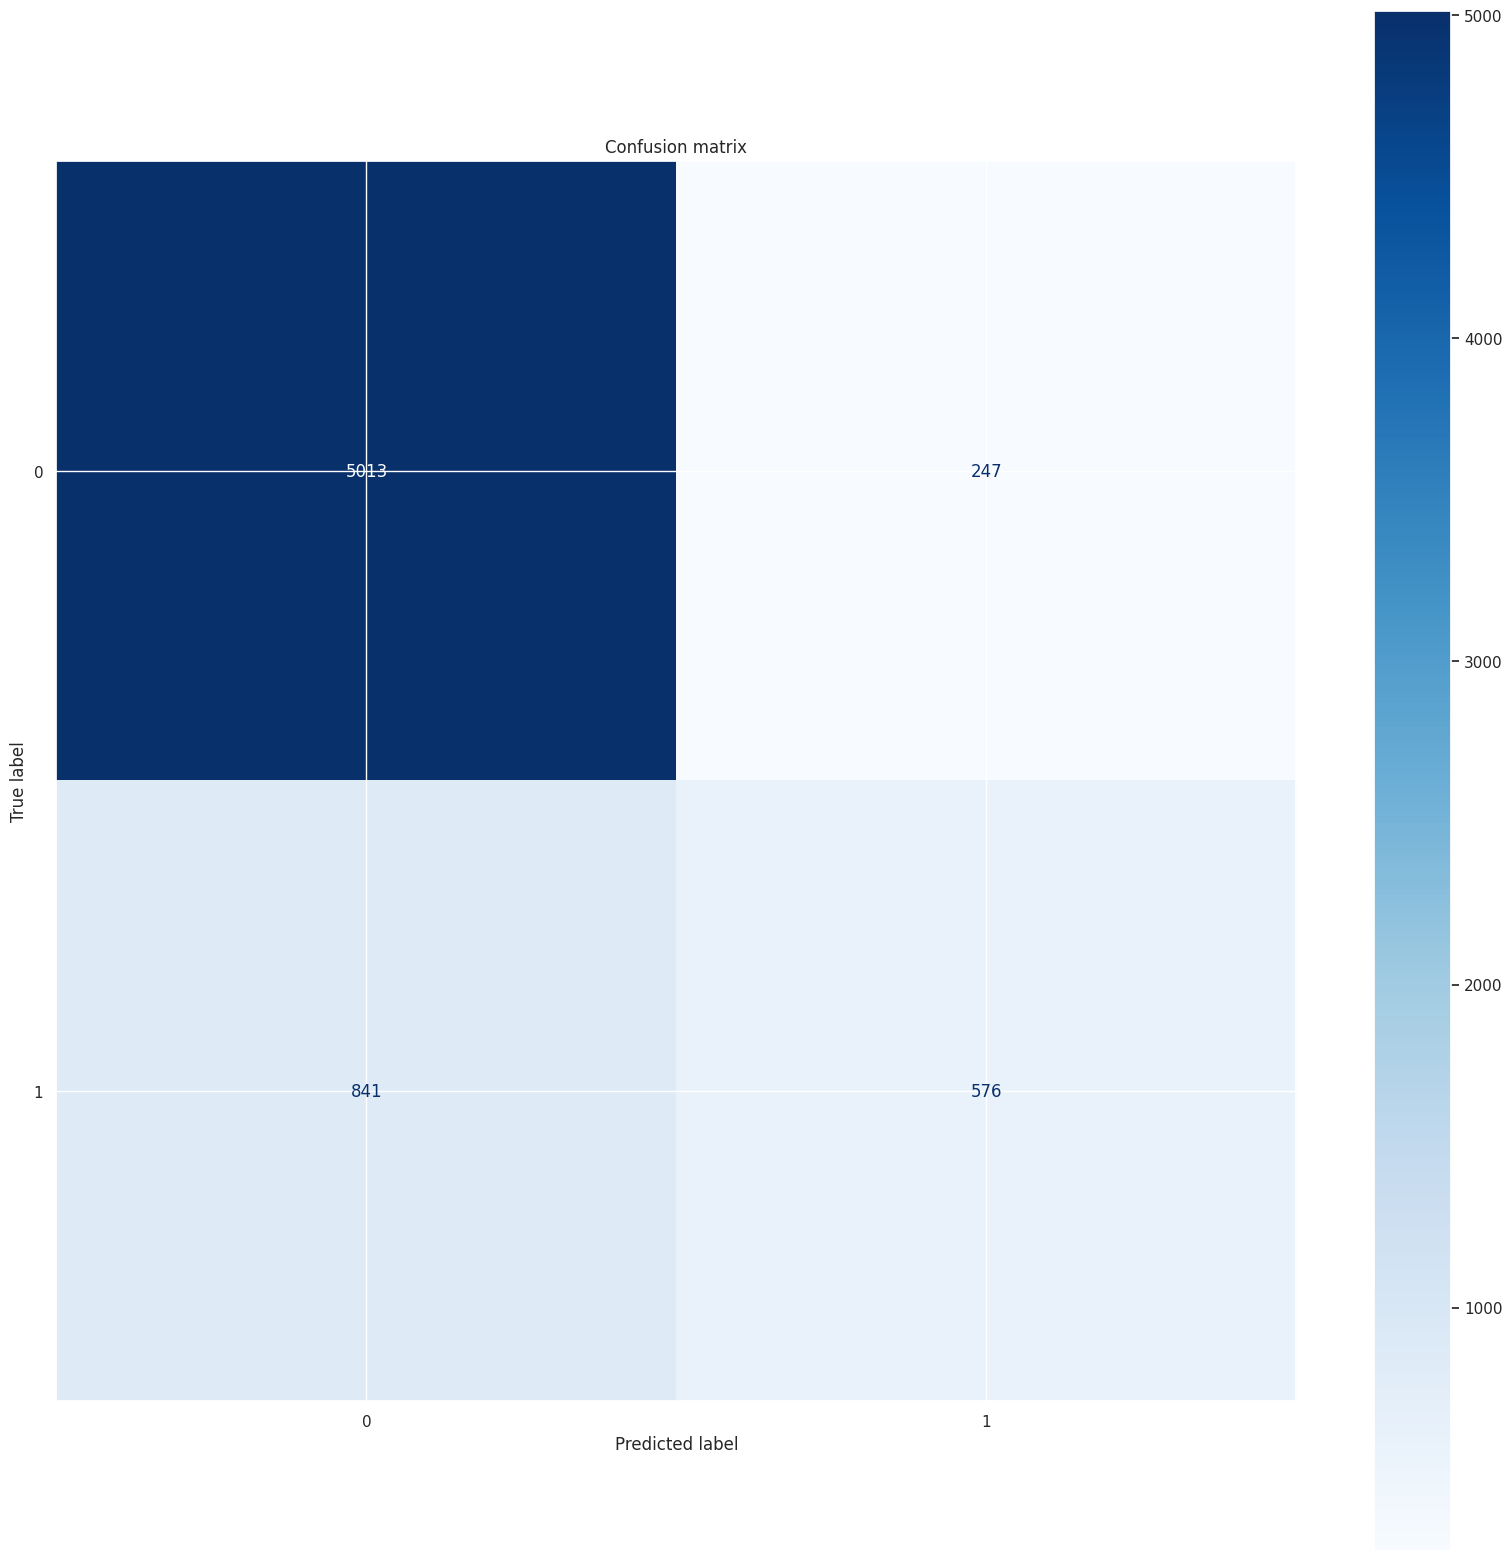

In [ ]:
# Import plot_confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

# Visualize your confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix');


<font color ='green'>From our confusion matrix we can observe the following: **TP - 195, TN - 5120, FP - 140, FN - 1222.**</br>
The value of true negative is quite high and we need to tune our model further

In [ ]:
# importing the sklearn library
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ',accuracy_score(y_test,y_hat_test))

Training Precision:  0.6816595579682048
Testing Precision:  0.6998784933171325



Training Recall:  0.41296687808315713
Testing Recall:  0.40649258997882853



Training Accuracy:  0.8342486270594108
Testing Accuracy:  0.8370525685187958


<font color='green'>The Precision for the training dataset is **68%** whereas for the testing dataset is **70%**.</br> This is quite low
The Recall for the training and testing datasets are equally ok at **41%** and **40%** respectively.

In [ ]:
# checking the imbalanced labels
label['h1n1_vaccine'].value_counts(normalize = True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

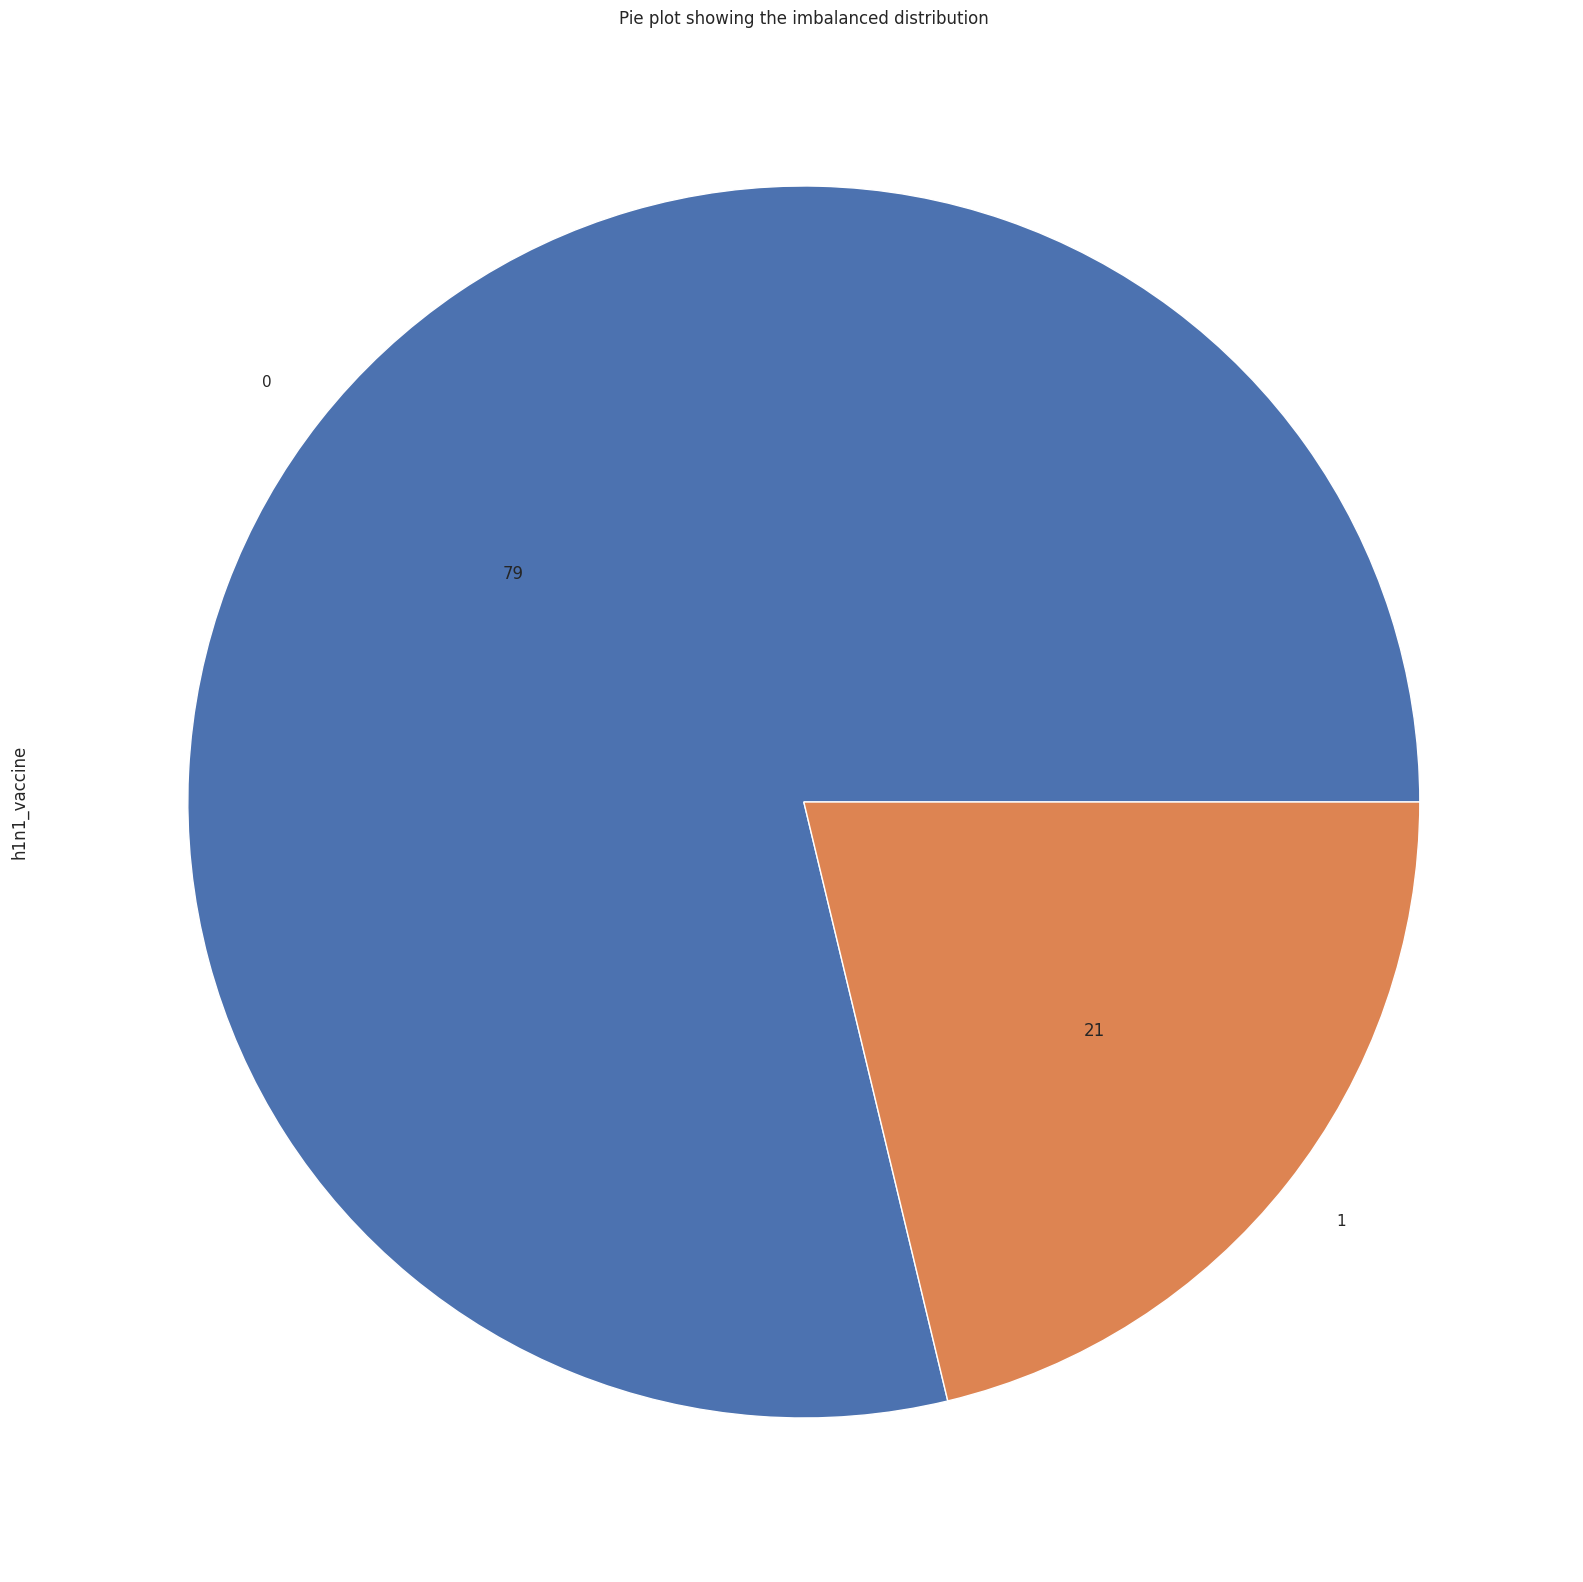

In [ ]:
#Using a pie plot to show the imbalanced distribution
label['h1n1_vaccine'].value_counts().plot.pie(autopct = '%.0f')
plt.title('Pie plot showing the imbalanced distribution');

<font color='green'>There is a large disparity between the samples who received the vaccination against those who did not receive the vaccination.

In [ ]:
# Correcting the imbalanced distribution
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,classification_report
 
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

logreg.fit(X_train_resampled, y_train_resampled)

y_hat_test = logreg.predict(X_test)

print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      5260
           1       0.48      0.72      0.58      1417

    accuracy                           0.78      6677
   macro avg       0.70      0.75      0.71      6677
weighted avg       0.82      0.78      0.79      6677



In [ ]:
# hyper parameter tuning for logistic regression

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# create pipeline with logistic regression and standard scaler
pipe = make_pipeline(LogisticRegression())

# create parameter grid for logistic regression
param_grid = {
    'logisticregression__C': [0.1, 1, 10],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga']
}

# perform grid search to find best hyperparameters
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# print best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)
# use best estimator to predict test set and evaluate performance
y_pred_testlog = grid_search.predict(X_test)
print('Test accuracy:', accuracy_score(y_test, y_hat_test))
print('Test precision:', precision_score(y_test, y_hat_test))
print('Test recall:', recall_score(y_test, y_hat_test))
print('Test f1 score:', f1_score(y_test, y_hat_test))

Best hyperparameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
Test accuracy: 0.775797513853527
Test precision: 0.4810964083175803
Test recall: 0.7184191954834157
Test f1 score: 0.5762807812057741


<font color='green'> We can see that our recall improves for the better from a **41%** in the initial model and now its at **71 %** . We are focusing more on the recall because  this is a medical field analysis and we need to focus on how well our model can predict the trues.

<font color='green'>

# 4.2) Decision trees

<font color='green'> Now we shall try to use a decision tree classification, in layman's language , decision tree focuses on building a tree like structure with our data . We shall first start by importin relevant features.

**<font color ='purple'> 4.2.1) Fitting the data into Decision trees and evaluation.</font>**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

<font color='green'> Here we shall try to resample with smote since our data has class imbalance , then fit our resampled data into our decision tree model.**It should however be noted that SMOTE resampling is only done on the training data set and the testing dataset is used as a test raw sample.**</font>

In [ ]:
# Resample the training data with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train and fit DT classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Evaluate model performance
y_train_pred = clf.predict(X_train_resampled)

y_test_pred = clf.predict(X_test)

print('Train Accuracy:', accuracy_score(y_train_resampled, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print()
print('Train Recall_score:', recall_score(y_train_resampled, y_train_pred))
print('Test Recall_score:', recall_score(y_test, y_test_pred))
print() 
print('Train Precision_score:', precision_score(y_train_resampled, y_train_pred))
print('Test Precision_score:', precision_score(y_test, y_test_pred))


Train Accuracy: 0.9999366005198758
Test Accuracy: 0.7534821027407518

Train Recall_score: 0.9998732010397515
Test Recall_score: 0.47071277346506707

Train Precision_score: 1.0
Test Precision_score: 0.4267434420985285


<font color='green'>From the model evaluation above, it is clear that the model is overfitting due to the big dfference between the metric scores, this shows that there is an overfitting in our model. Lets go ahead and see our confusion matrix.

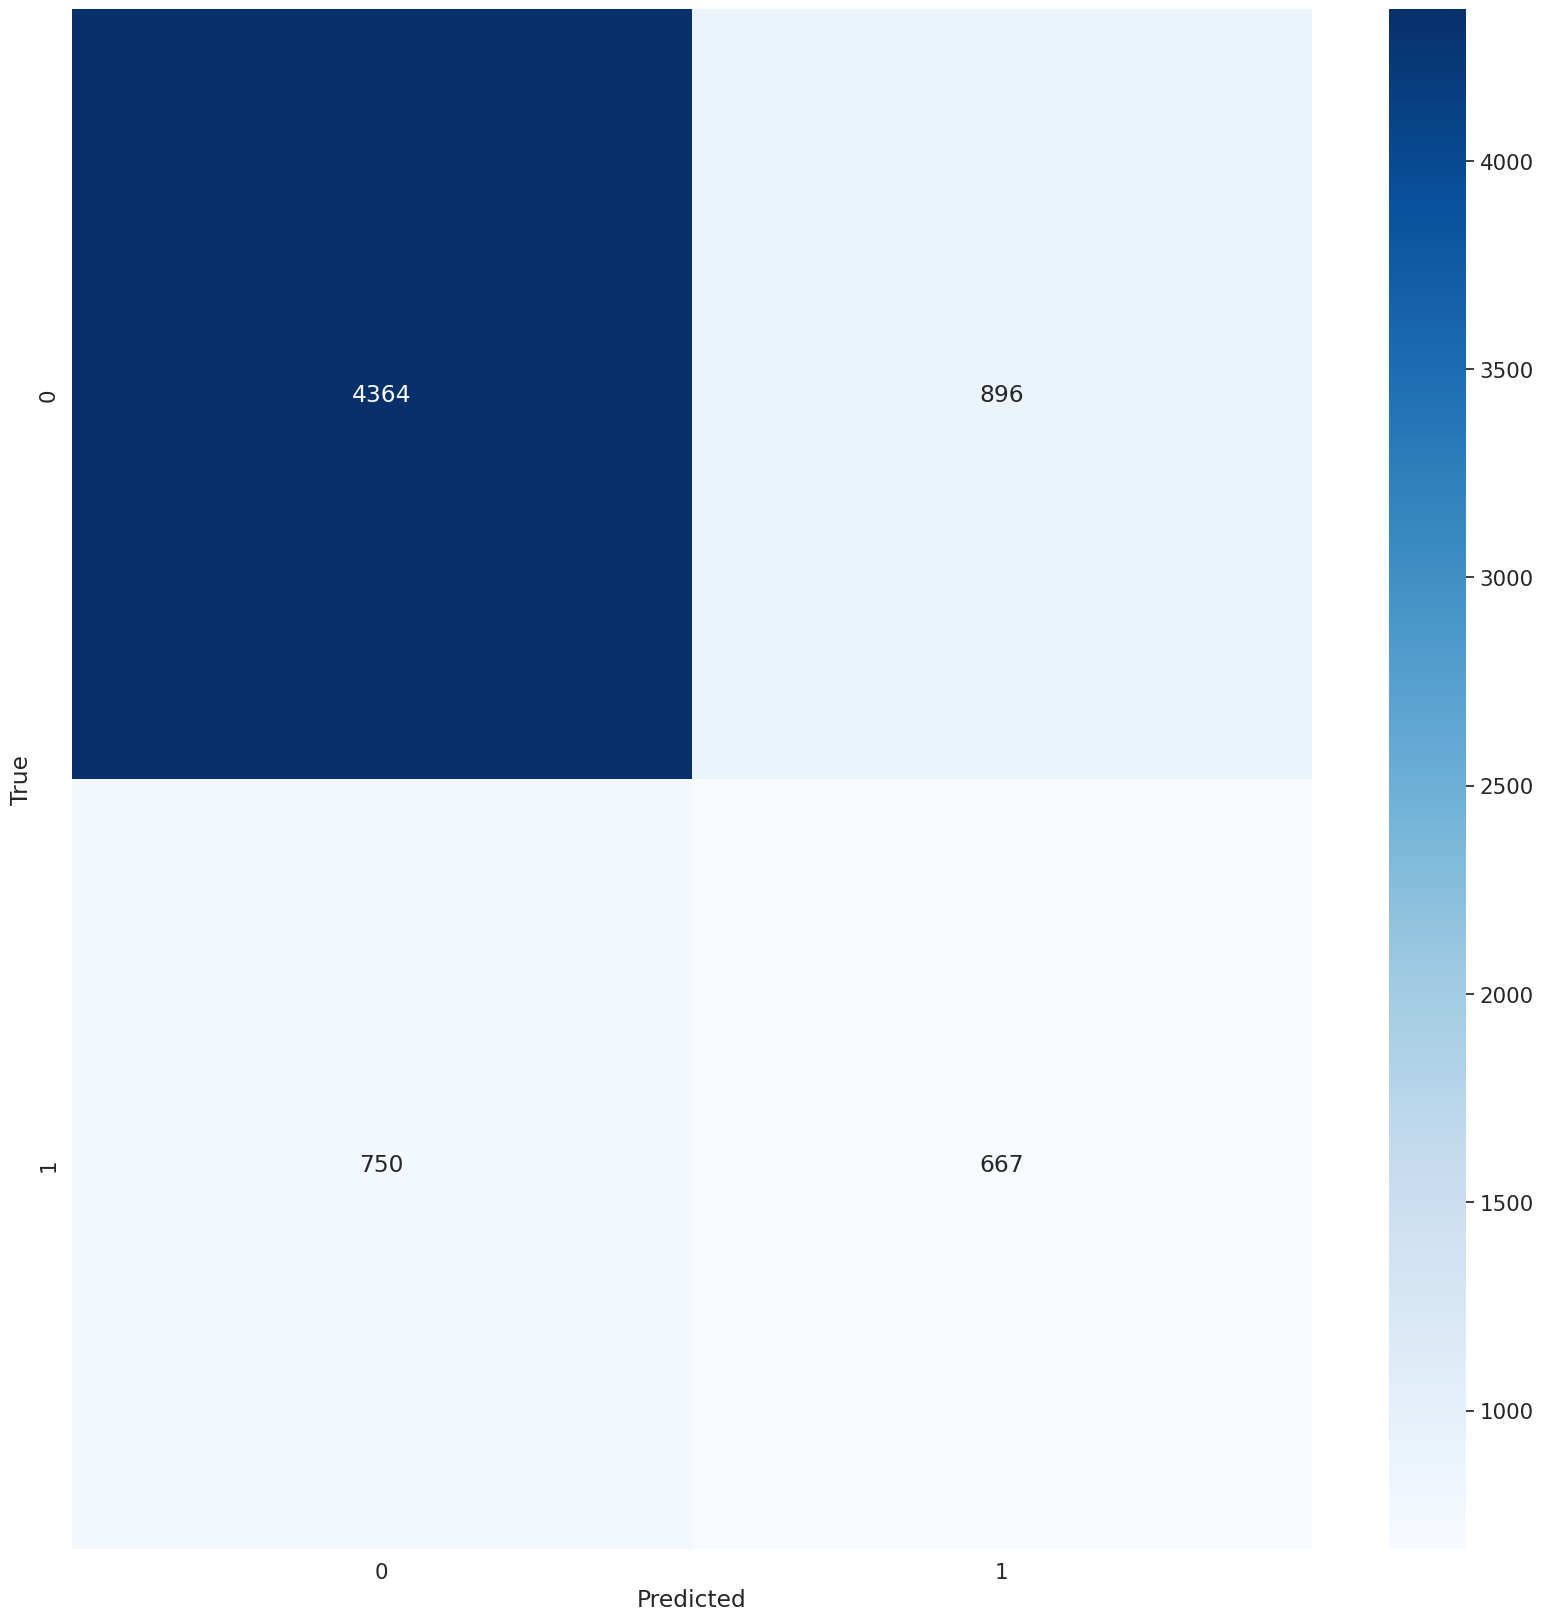

In [ ]:
from sklearn.metrics import confusion_matrix

labels = [0, 1]

cm = confusion_matrix(y_test, y_test_pred, labels=labels)

# Plot the confusion matrix
sns.set(font_scale=1.4) # Adjust to fit labels properly
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**<font color='purple'> 4.2.2) Hyperparameter tuning.</font>**

<font color ='green'> Here we are basically trying to find the best parameters for our model that can reduce the overfitting.We start by creating a parameter grid for the values that we want ti check if they are good for our model then instatiating a **Grid SearchCV** Then passing our parameter there then we print our best parameters.

In [ ]:
#Hyperparameter Tuning and Pruning in Decision Trees
# create a parameter grid
dt_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [6, 2, 3, 4, 5, ],
    "min_samples_split": [10,2, 5],
    "min_samples_leaf": [1, 2, 3 ],
    }

# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(clf, dt_param_grid, cv=3, return_train_score = True )

# Fit to the data
dt_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=2,
                                              min_samples_split=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [10, 2, 5]},
             return_train_score=True)

In [ ]:
# Mean training score
import numpy as np
dt_gs_training_score = np.mean(dt_grid_search.cv_results_["mean_train_score"])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
print()
dt_grid_search.best_params_

Mean Training Score: 78.72%
Mean Test Score: 81.47%
Best Parameter Combination Found During Grid Search:



{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

<font color ='green'> From our gridsearchCv, our best model parameters include: 
<font color ='purple'>
1. criterion': 'gini',
2.  'max_depth': 6,
3.  'min_samples_leaf': 1,
4.  'min_samples_split': 10}</font>
Lets go ahead and pass this parameters into a new decision tree and see how our model performs.

In [ ]:
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(criterion = 'gini',
                            max_depth = 6,
                            min_samples_leaf = 1,
                            min_samples_split = 10)

In [ ]:
clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=6, min_samples_split=10)

In [ ]:
y_train_pred1 = clf.predict(X_train_resampled)
y_test_pred1 = clf.predict(X_test)

print('Train Accuracy:', accuracy_score(y_train_resampled, y_train_pred1))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred1))
print()
print('Train Recall_score:', recall_score(y_train_resampled, y_train_pred1))
print('Test Recall_score:', recall_score(y_test, y_test_pred1))
print()

Train Accuracy: 0.8241932416154187
Test Accuracy: 0.8147371574060207

Train Recall_score: 0.7804476003296773
Test Recall_score: 0.5977417078334509



In [ ]:
print('Train Precision_score:', precision_score(y_train_resampled, y_train_pred1))
print('Test Precision_score:', precision_score(y_test,y_test_pred1))

Train Precision_score: 0.8552768707010352
Test Precision_score: 0.559445178335535


**<font color='purple'> 4.2.3) Feature selection</font>**

<font color='green'>Our model works well, lets now lets gi a notch higher and perform future selection, here we find the relevant futures , pass them in our model and see how our model performs.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Select top k features with highest information gain
selector = SelectKBest(mutual_info_classif, k=8)
X_train_new = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_new = selector.transform(X_test)

# Train and fit DT classifier with selected features
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_new, y_train_resampled)
# Evaluate model performance
y_train_pred2 = clf.predict(X_train_new)
y_test_pred2 = clf.predict(X_test_new)

print('Train Accuracy:', accuracy_score(y_train_resampled, y_train_pred2))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred2))
print()
print('Train Recall_score:', recall_score(y_train_resampled, y_train_pred2))
print('Test Recall_score:', recall_score(y_test, y_test_pred2))
print() 
print('Train Precision_score:', precision_score(y_train_resampled, y_train_pred2))
print('Test precision_score :', precision_score(y_test, y_test_pred2))


Train Accuracy: 0.8380777277626323
Test Accuracy: 0.8124906395087614

Train Recall_score: 0.811957141951436
Test Recall_score: 0.6005645730416372

Train Precision_score: 0.8567128236002408
Test precision_score : 0.5536759921925829


<font color='green'> We can see that our model improves , for example initially our recall was at **47%** for the test data but now its at **60%**

## 4.3) Random Forest.

<font color='green'> This is our final model, this model is from ensemble and does a really great job on classification.

**<font color='purple'> 4.3.1) Model fitting and evaluation </font>**

<font color='green'>We shall start by importing the libraries needed, building our model and seeing how it performs.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, max_depth = 5)
forest.fit(X_train, y_train)
# model performance evaluation on the train set
#from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, auc
 
y_train_pred_forest = forest.predict(X_train)

# X_test_ohe = ohe.transform(X_test)
y_test_pred_forest = forest.predict(X_test)

print('Train Accuracy:', accuracy_score(y_train, y_train_pred_forest))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred_forest))
print()
print('Train Recall_score:', recall_score(y_train, y_train_pred_forest))
print('My model performed pretty well on both the train and test data.The recall score is quite low which indicates a lot of false positives')

Train Accuracy: 0.8219171243135297
Test Accuracy: 0.8241725325745095

Train Recall_score: 0.22903453136011276
My model performed pretty well on both the train and test data.The recall score is quite low which indicates a lot of false positives


<font color='green'> Lets now plot our confusion matrix.

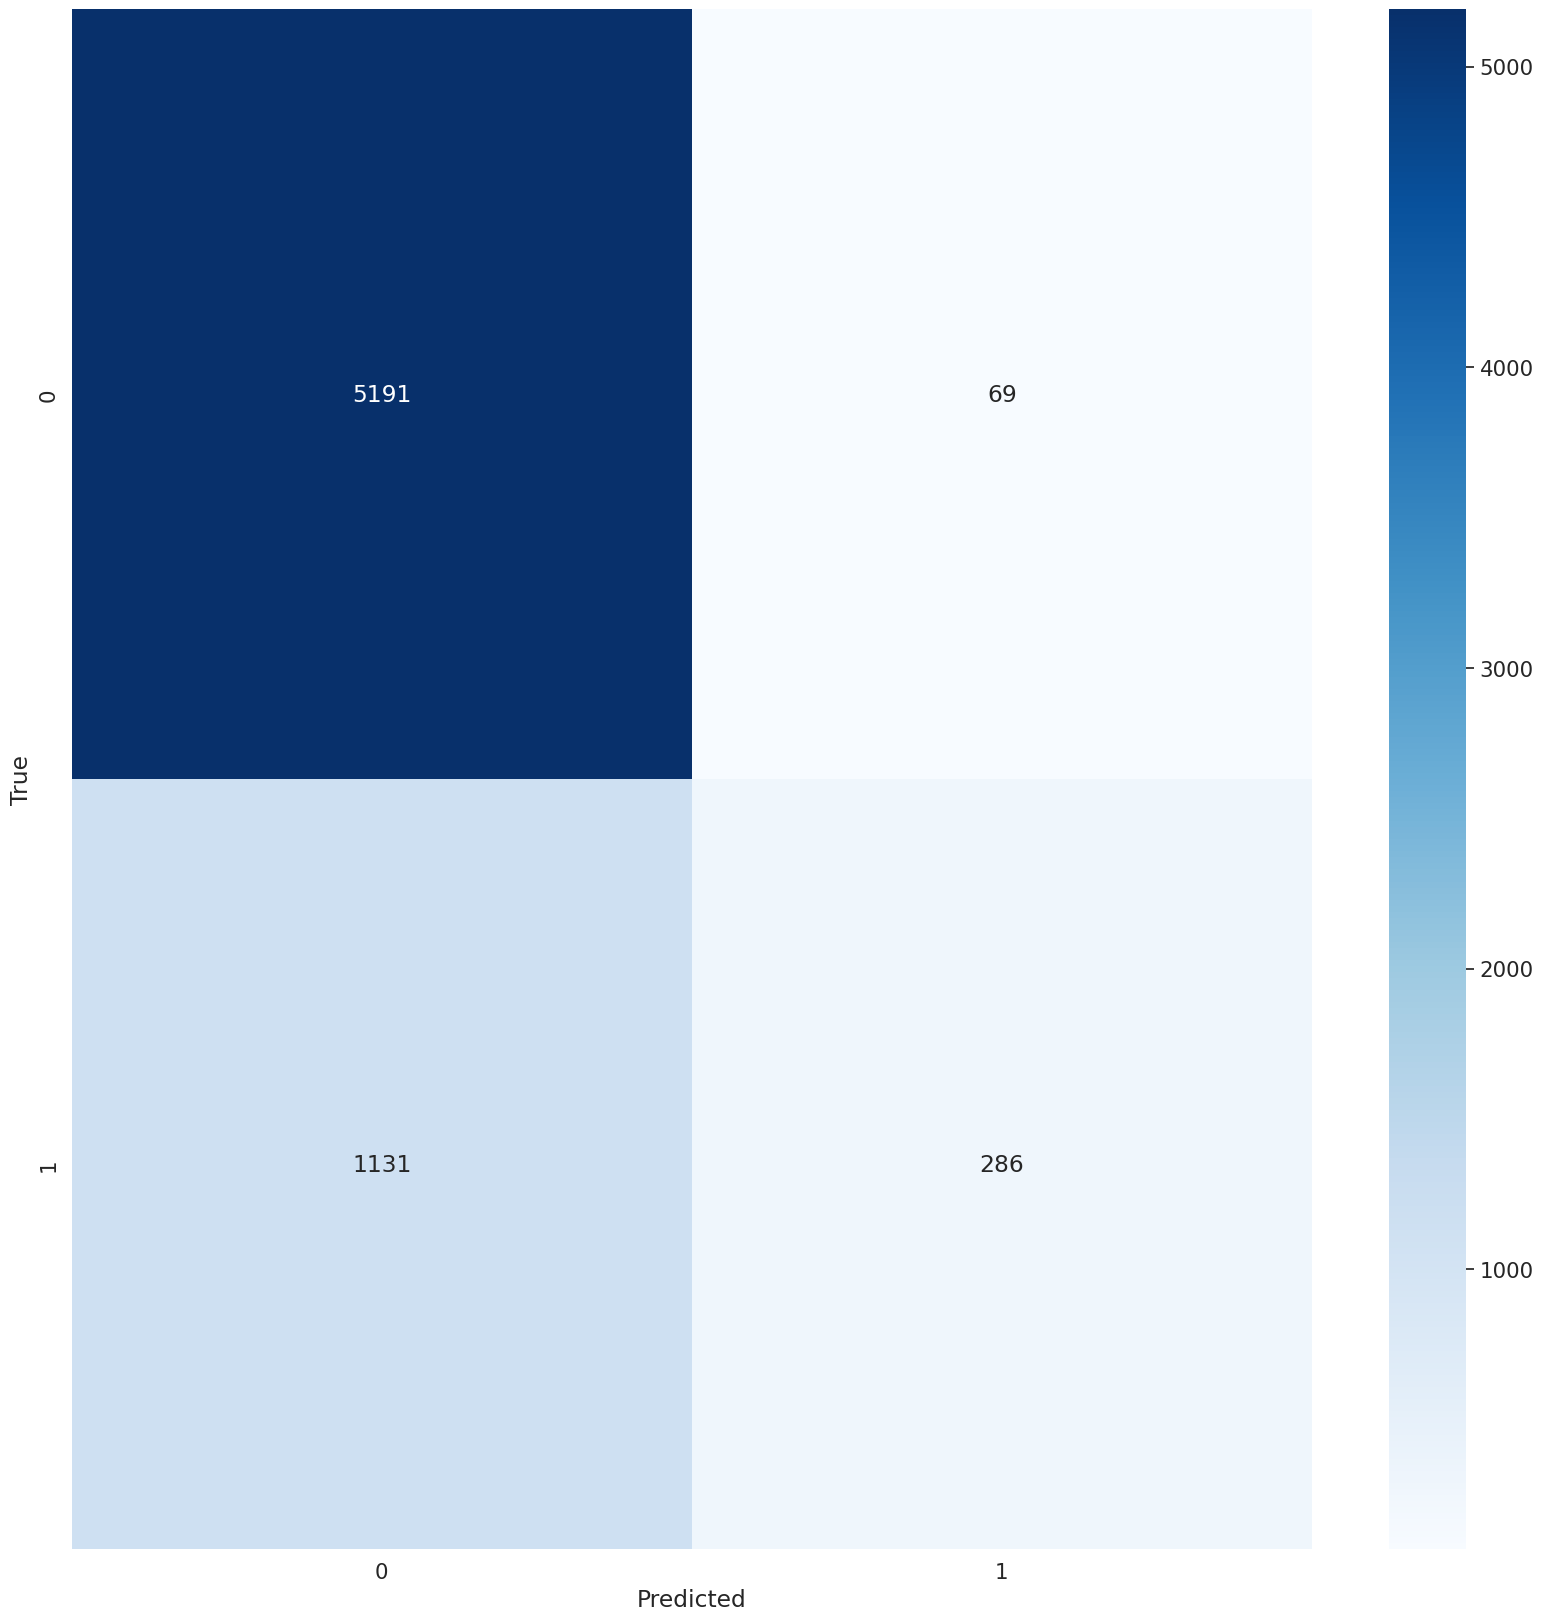

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, max_depth = 5)
forest.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

labels = [0, 1]
y_test_pred_forest=forest.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred_forest, labels=labels)

# Plot the confusion matrix
sns.set(font_scale=1.4) # Adjust to fit labels properly
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


<font color='green'>The overall accuracy of the model is 82% which is a good indication that the model is performing well. However, we can also see that the model has a higher recall, which means that it is incorrectly predicting some negative instances as positive. We may need to adjust our model's threshold or perform further analysis to reduce this false positive rate.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Set the number of folds for cross-validation
k = 5
# Initialize the k-fold cross-validation object
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation on the decision tree model using the k-fold object
cv_scores = cross_val_score(forest, X, y, cv=kfold, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard

Cross-validation scores: [0.81898165 0.81018345 0.82156899 0.81407976 0.83093054]


<font color='Purple'>**4.3.2)Hyperparameter Tuning**

<font color ='green'> Here we are basically trying to find the best parameters for our model that can reduce the overfitting.We start by creating a parameter grid for the values that we want ti check if they are good for our model then instatiating a **Grid SearchCV** Then passing our parameter there then we print our best parameters.

In [ ]:
forest = RandomForestClassifier(n_estimators = 100, max_depth = 5)
forest.fit(X_train, y_train)
from sklearn.model_selection import GridSearchCV

In [ ]:
#create a grid
rf_param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']

}

# Instantiate GridSearchCV
rf_grid_search = GridSearchCV(forest, rf_param_grid, cv=3, return_train_score = True )

# Fit to the data
rf_grid_search.fit(X_train, y_train)
# Mean training score
rf_gs_training_score = np.mean(rf_grid_search.cv_results_["mean_train_score"])

# Mean test score
rf_gs_testing_score = rf_grid_search.score(X_test, y_test)
   

rf_grid_search.best_params_
rf_cv= RandomForestClassifier(max_features = 'auto', n_estimators = 500, max_depth = 8, criterion = 'entropy')

rf_cv.fit(X_train, y_train)

 # model performance evaluation on the train set
#from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, auc
 
y_train_pred_forest = rf_cv.predict(X_train)

# X_test_ohe = ohe.transform(X_test)
y_test_pred_forest = rf_cv.predict(X_test)


In [ ]:
print(f"Mean Training Score: {rf_gs_training_score :.2%}")
print(f"Mean Test Score: {rf_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
print()
print('Train Accuracy:', accuracy_score(y_train, y_train_pred_forest))
print("Hyper-parameter tuning improves the accuracy of both test and training data overcoming initial underfitting")

Mean Training Score: 82.51%
Mean Test Score: 83.45%
Best Parameter Combination Found During Grid Search:

Train Accuracy: 0.8440838741887169
Hyper-parameter tuning improves the accuracy of both test and training data overcoming initial underfitting


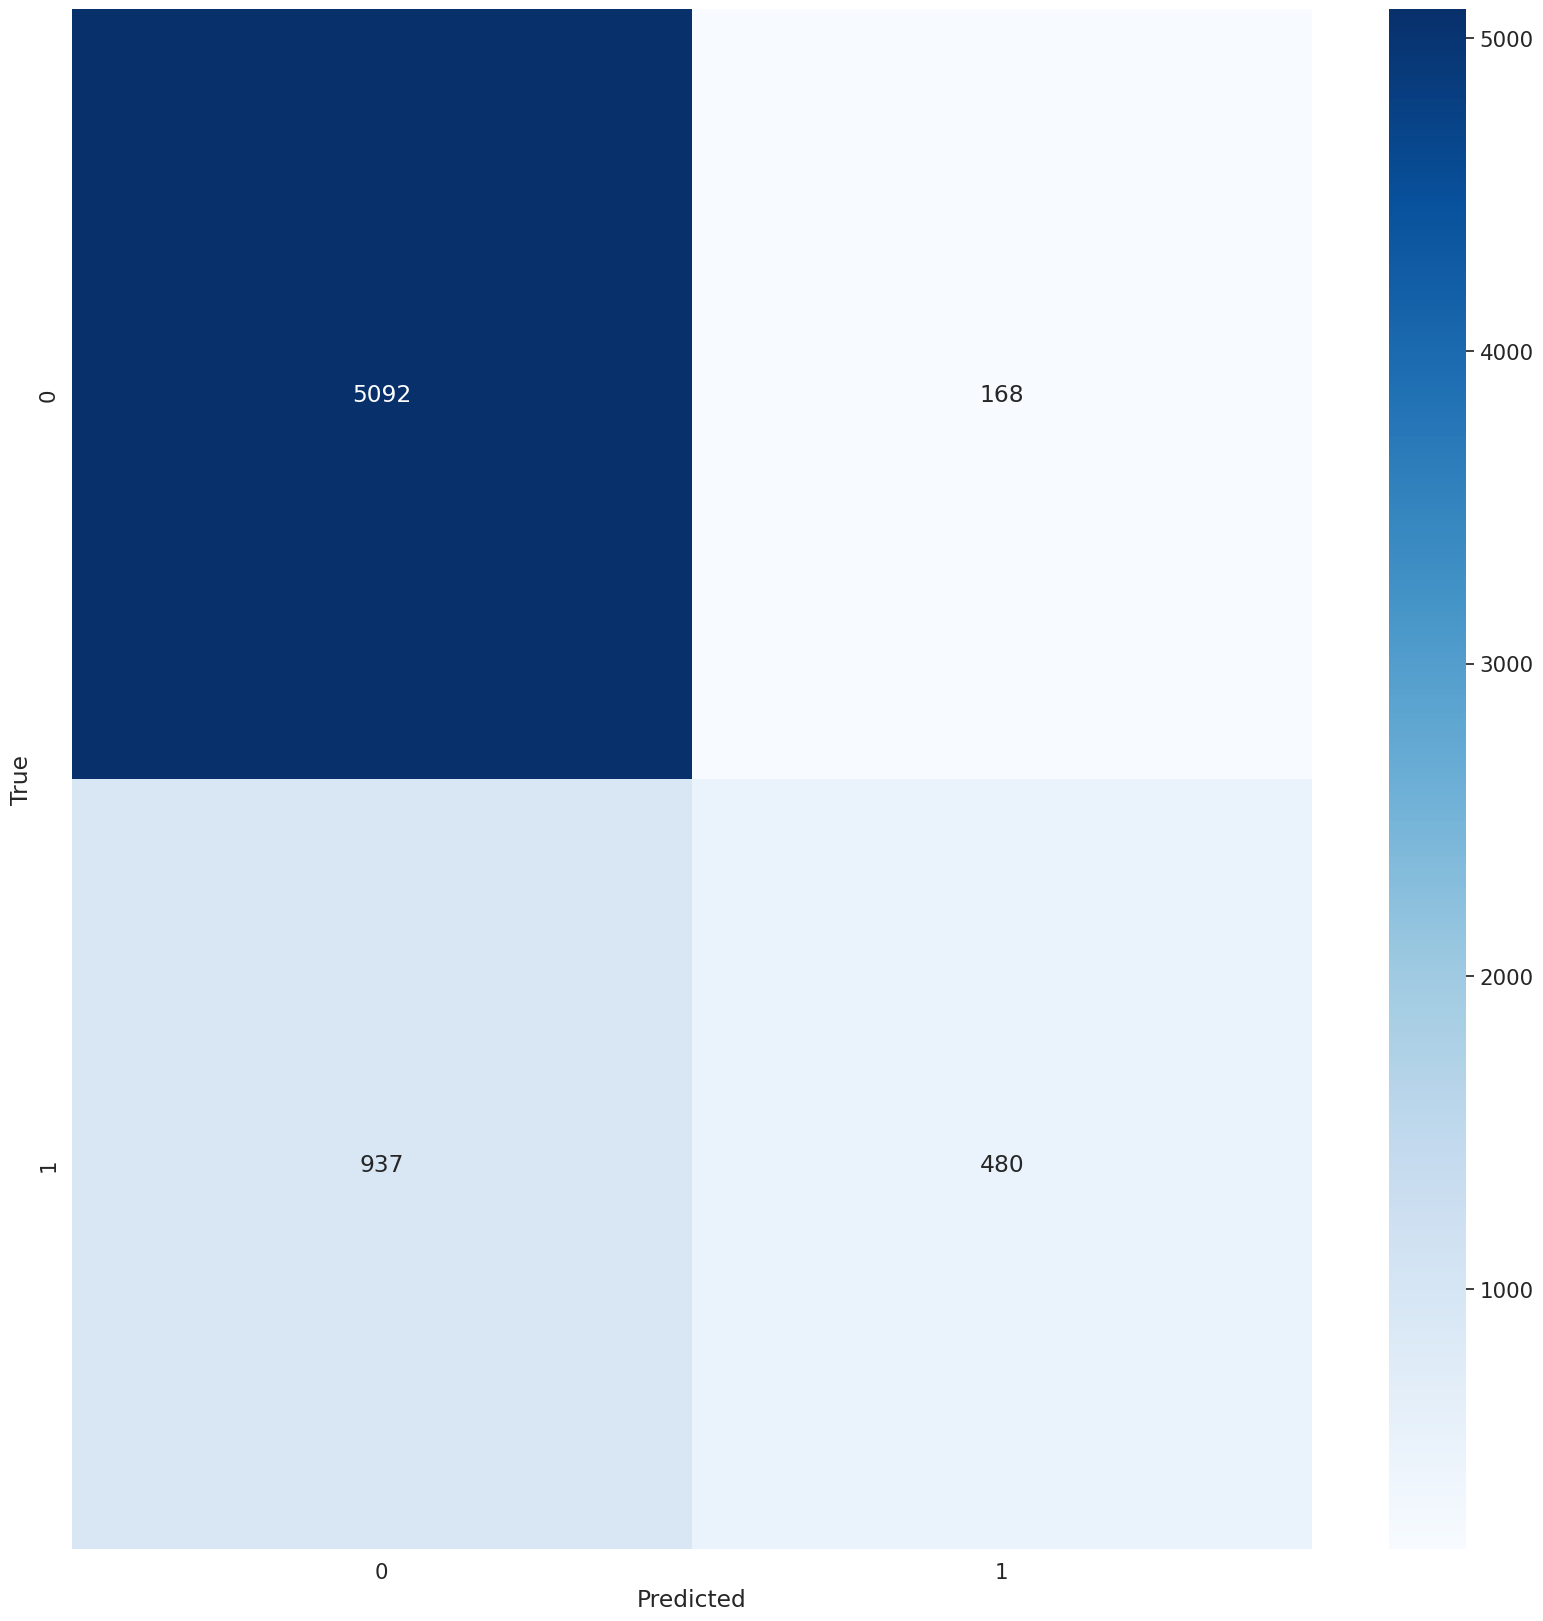

In [ ]:
#Confusion Matrix for parameter tuned RandomForestClassifier model.

from sklearn.metrics import confusion_matrix

labels = [0, 1]

cm = confusion_matrix(y_test, y_test_pred_forest, labels=labels)

# Plot the confusion matrix
sns.set(font_scale=1.4) # Adjust to fit labels properly
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **5) CONCLUSION.**
<font color='green'>From our analysis , we can conclude 
<font color ='purple'>
*  More people did not take the H1n1 Vaccine as from our analysis , we hadmore 0's than 1's</br>
*   
Based on these findings, we can conclude that the Decision Tree is the most appropriate to proceed with for model deployment. This project was however restricted to only three modeling techniques and incorporating further techniques such as; Neural Networks, Bayesian Networks e.t.c.  would further compare the performance metrics, to be able to achieve the model with the best performance metrics.
</font>



# **6) Recommendations.**

<font color='green'>From our analysis we can recommend:

<font color='purple'>
1.  That we use the Decision trees model as it is the best performing model, it has an 83%  accuracy.</br>
2.  That more research be done on how we can improve the Random Forest without overfitting.</br>
3.  That further analysis be done on why most people did not take the vaccine.

